In [1]:
# Importing the tools that will be used for this project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pulling the data from the csv file, parsing date columns, and making sure the dataset displays properly.

master_df = pd.read_csv('cards.csv', parse_dates=['tcg_date'])
master_df['tcg_date'] = pd.to_datetime(master_df['tcg_date'], format="%y.%d.%m", errors='raise')

master_df.head(5)

id                           name        type  \
0  34541863       "A" Cell Breeding Device  Spell Card   
1  64163367             "A" Cell Incubator  Spell Card   
2  91231901  "A" Cell Recombination Device  Spell Card   
3  73262676         "A" Cell Scatter Burst  Spell Card   
4  98319530     "Infernoble Arms - Almace"  Spell Card   

                                                desc  atk  def  level  \
0  During each of your Standby Phases, put 1 A-Co...  NaN  NaN    NaN   
1  Each time an A-Counter(s) is removed from play...  NaN  NaN    NaN   
2  Target 1 face-up monster on the field; send 1 ...  NaN  NaN    NaN   
3  Select 1 face-up "Alien" monster you control. ...  NaN  NaN    NaN   
4  While this card is equipped to a monster: You ...  NaN  NaN    NaN   

         race attribute  scale  ...   views  viewsweek upvotes downvotes  \
0  Continuous       NaN    NaN  ...  300590          0     118       110   
1  Continuous       NaN    NaN  ...  212234          0      25        20   
2  Quick-Play       NaN    NaN  ...  221212          0      19        15   
3  Quick-Play       NaN    NaN  ...  168545         26      12         4   
4       Equip       NaN    NaN  ...   52664         26       0         0   

                                             formats treated_as   tcg_date  \
0  Duel Links|Common Charity|Edison|TCG|OCG|Maste...        NaN 2007-05-16   
1  Duel Links|Common Charity|Edison|TCG|OCG|Maste...        NaN 2007-11-14   
2      Duel Links|Common Charity|TCG|OCG|Master Duel        NaN 2016-11-03   
3  Duel Links|Common Charity|Edison|TCG|OCG|Maste...        NaN 2007-02-28   
4                                TCG|OCG|Master Duel        NaN 2023-07-27   

     ocg_date konami_id  has_effect  
0  2007-02-15    7128.0           1  
1  2007-07-21    7315.0           1  
2  2016-07-09   12653.0           1  
3  2006-11-16    6994.0           1  
4  2023-04-22   18843.0           1  

[5 rows x 29 columns]

In [3]:
# Using the Describe method to show some mathematical stats of the dataset.

master_df.describe()

id          atk          def        level       scale  \
count  1.328100e+04  8631.000000  8216.000000  8216.000000  348.000000   
mean   5.217835e+07  1484.636774  1254.528968     4.596884    4.387931   
min    2.511000e+03     0.000000     0.000000     0.000000    0.000000   
25%    2.473139e+07   800.000000   500.000000     3.000000    2.000000   
50%    4.982023e+07  1500.000000  1200.000000     4.000000    4.000000   
75%    7.519582e+07  2200.000000  1900.000000     6.000000    7.000000   
max    5.010000e+08  5000.000000  5000.000000    13.000000   13.000000   
std    3.894628e+07   950.996930   873.795185     2.415231    3.015154   

          linkval         views     viewsweek       upvotes     downvotes  \
count  415.000000  1.328100e+04  13281.000000  13281.000000  13281.000000   
mean     2.421687  1.187238e+05      2.894511      6.715759      1.347263   
min      1.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%      2.000000  2.347300e+04      0.000000      1.000000      0.000000   
50%      2.000000  5.012200e+04      0.000000      3.000000      0.000000   
75%      3.000000  1.163900e+05      0.000000      6.000000      2.000000   
max      6.000000  1.424656e+07    338.000000   2608.000000    533.000000   
std      0.977037  2.974221e+05     10.454755     36.563359      6.566197   

                            tcg_date     konami_id    has_effect  
count                          12865  12801.000000  13281.000000  
mean   2014-04-17 19:37:58.087835136  11210.269588      0.942022  
min              2001-01-01 00:00:00    -71.000000      0.000000  
25%              2009-05-02 00:00:00   7680.000000      1.000000  
50%              2015-01-15 00:00:00  11121.000000      1.000000  
75%              2019-10-19 00:00:00  14424.000000      1.000000  
max              2024-07-18 00:00:00  20276.000000      1.000000  
std                              NaN   4307.036816      0.233710

In [4]:
# Using the Info method to see if I have any null values. Based on the nature of what this dataset is based on, I do expect to see null numbers in some rows.
# For now everything seems to be fine with the dataset.

master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               13281 non-null  int64         
 1   name             13281 non-null  object        
 2   type             13281 non-null  object        
 3   desc             13281 non-null  object        
 4   atk              8631 non-null   float64       
 5   def              8216 non-null   float64       
 6   level            8216 non-null   float64       
 7   race             13280 non-null  object        
 8   attribute        8631 non-null   object        
 9   scale            348 non-null    float64       
 10  archetype        7788 non-null   object        
 11  linkval          415 non-null    float64       
 12  linkmarkers      415 non-null    object        
 13  image_url        13281 non-null  object        
 14  image_url_small  13281 non-null  objec

In [5]:
# Yu-Gi-Oh! has 3 main card types: Monsters, Spells, and Traps. I'm creating a graph to show how many of each main card type there are. But before I do that--
# I want to create a new dataframe to condense only the relevent data I need and not affect my master_df.

main_types_df = master_df[['type']]
main_types_df.head(5)

type
0  Spell Card
1  Spell Card
2  Spell Card
3  Spell Card
4  Spell Card

In [6]:
# Shows the different card types in the game. I need to further sort this data to show it the way I want to because for example a XYZ monster is a monster but
# so is also a Fusion monster.

main_types_all = main_types_df["type"].value_counts()
main_types_all

type
Effect Monster                     4725
Spell Card                         2592
Trap Card                          1934
Normal Monster                      662
XYZ Monster                         521
Fusion Monster                      479
Tuner Monster                       462
Link Monster                        415
Synchro Monster                     413
Pendulum Effect Monster             273
Flip Effect Monster                 184
Skill Card                          124
Ritual Effect Monster               116
Token                               107
Gemini Monster                       45
Synchro Tuner Monster                41
Union Effect Monster                 39
Pendulum Normal Monster              36
Spirit Monster                       33
Toon Monster                         17
Ritual Monster                       15
Pendulum Effect Fusion Monster       11
XYZ Pendulum Effect Monster          10
Normal Tuner Monster                 10
Pendulum Tuner Effect Monster      

In [7]:
# Next we need to clean this data. Cleaning up the card types column to include actual cards. Tokens aren't real cards (tokens can be substitutued for anything), 
# and Skill Cards (Speed Duel).

token_remove = 'Token'
skillcard_remove = 'Skill Card'

main_types_df = main_types_df[main_types_df['type'] != token_remove]
main_types_df = main_types_df[main_types_df['type'] != skillcard_remove]

main_types_count = main_types_df["type"].value_counts()
main_types_count

type
Effect Monster                     4725
Spell Card                         2592
Trap Card                          1934
Normal Monster                      662
XYZ Monster                         521
Fusion Monster                      479
Tuner Monster                       462
Link Monster                        415
Synchro Monster                     413
Pendulum Effect Monster             273
Flip Effect Monster                 184
Ritual Effect Monster               116
Gemini Monster                       45
Synchro Tuner Monster                41
Union Effect Monster                 39
Pendulum Normal Monster              36
Spirit Monster                       33
Toon Monster                         17
Ritual Monster                       15
Pendulum Effect Fusion Monster       11
Normal Tuner Monster                 10
XYZ Pendulum Effect Monster          10
Pendulum Tuner Effect Monster         8
Synchro Pendulum Effect Monster       7
Pendulum Effect Ritual Monster     

In [8]:
# Updating the master_df to also exclude Token and Skill Cards.

master_df = master_df[master_df['type'] != token_remove]
master_df = master_df[master_df['type'] != skillcard_remove]

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13050 entries, 0 to 13280
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               13050 non-null  int64         
 1   name             13050 non-null  object        
 2   type             13050 non-null  object        
 3   desc             13050 non-null  object        
 4   atk              8524 non-null   float64       
 5   def              8109 non-null   float64       
 6   level            8109 non-null   float64       
 7   race             13050 non-null  object        
 8   attribute        8524 non-null   object        
 9   scale            348 non-null    float64       
 10  archetype        7726 non-null   object        
 11  linkval          415 non-null    float64       
 12  linkmarkers      415 non-null    object        
 13  image_url        13050 non-null  object        
 14  image_url_small  13050 non-null  object    

In [9]:
# Converting the different monster types to just 1 type: Monster.

main_types_df['type'] = main_types_df['type'].replace('Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Normal Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('XYZ Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Fusion Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Tuner Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Link Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Synchro Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Flip Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Ritual Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Gemini Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Synchro Tuner Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Union Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Normal Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Spirit Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Toon Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Ritual Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Effect Fusion Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Normal Tuner Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('XYZ Pendulum Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Tuner Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Synchro Pendulum Effect Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Effect Ritual Monster', 'Monster')
main_types_df['type'] = main_types_df['type'].replace('Pendulum Flip Effect Monster', 'Monster')

main_types_count = main_types_df['type'].value_counts()
main_types_count

type
Monster       8524
Spell Card    2592
Trap Card     1934
Name: count, dtype: int64

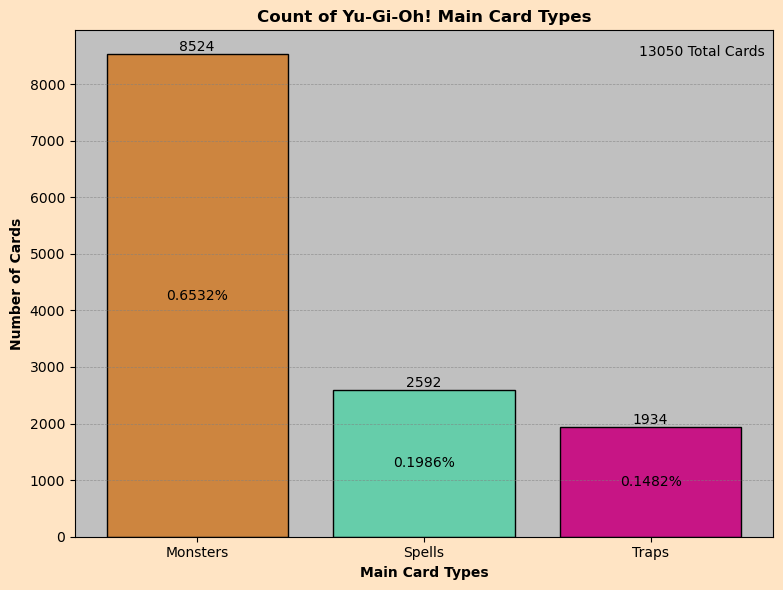

In [10]:
# The most common card type are Monster Cards, followed by Spell Cards, and lastly Trap Cards. Plugging this data into a bar graph.

fig, ax = plt.subplots(figsize = (8, 6))

monsters_to_count = 'Monster'
monsters_count = main_types_df['type'].value_counts()[monsters_to_count]

spells_to_count = 'Spell Card'
spells_count = main_types_df['type'].value_counts()[spells_to_count]

traps_to_count = 'Trap Card'
traps_count = main_types_df['type'].value_counts()[traps_to_count]

main_types_categories = ['Monsters', 'Spells', 'Traps']
main_types_values = [monsters_count, spells_count, traps_count]
main_types_colors = ['peru', 'mediumaquamarine', 'mediumvioletred']

main_types_total = main_types_df['type'].count()
main_types_percentages = [monsters_count / main_types_total, spells_count / main_types_total, traps_count / main_types_total]

main_types_bar = plt.bar(main_types_categories, main_types_values, color = main_types_colors, edgecolor = 'black')

for num in main_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, main_types_percentages in enumerate(main_types_percentages):
    plt.text(main_types_categories[i], main_types_values[i] / 2, f'{main_types_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{main_types_total} Total Cards", xy=(1.95, 8500), xytext=(1.95, 8500))

main_types_colors[0] = 'peru'
main_types_colors[1] = 'mediumaquamarine'
main_types_colors[2] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Main Card Types', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! Main Card Types', weight = 'bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [11]:
# Almost 2/3rds of all the cards in the game are Monsters! Just a little under 20% of all cards are Spell Cards, and just under 15% of all cards are Trap Cards.

In [12]:
# Breaking down the different monster card types
monsters_df = master_df[['type']]

spell_remove = 'Spell Card'
trap_remove = 'Trap Card'

monsters_df = monsters_df[monsters_df['type'] != spell_remove]
monsters_df = monsters_df[monsters_df['type'] != trap_remove]

monsters_df['type'] = monsters_df['type'].replace('Tuner Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Flip Effect Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Gemini Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Synchro Tuner Monster', 'Synchro Monster')
monsters_df['type'] = monsters_df['type'].replace('Union Effect Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Effect Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Normal Monster', 'Normal Monster')
monsters_df['type'] = monsters_df['type'].replace('Spirit Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Toon Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Ritual Effect Monster', 'Ritual Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Effect Fusion Monster', 'Fusion Monster')
monsters_df['type'] = monsters_df['type'].replace('Normal Tuner Monster', 'Normal Monster')
monsters_df['type'] = monsters_df['type'].replace('XYZ Pendulum Effect Monster', 'XYZ Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Tuner Effect Monster', 'Effect Monster')
monsters_df['type'] = monsters_df['type'].replace('Synchro Pendulum Effect Monster', 'Synchro Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Effect Ritual Monster', 'Ritual Monster')
monsters_df['type'] = monsters_df['type'].replace('Pendulum Flip Effect Monster', 'Effect Monster')

monsters_df.value_counts()

type           
Effect Monster     5787
Normal Monster      708
XYZ Monster         531
Fusion Monster      490
Synchro Monster     461
Link Monster        415
Ritual Monster      132
Name: count, dtype: int64

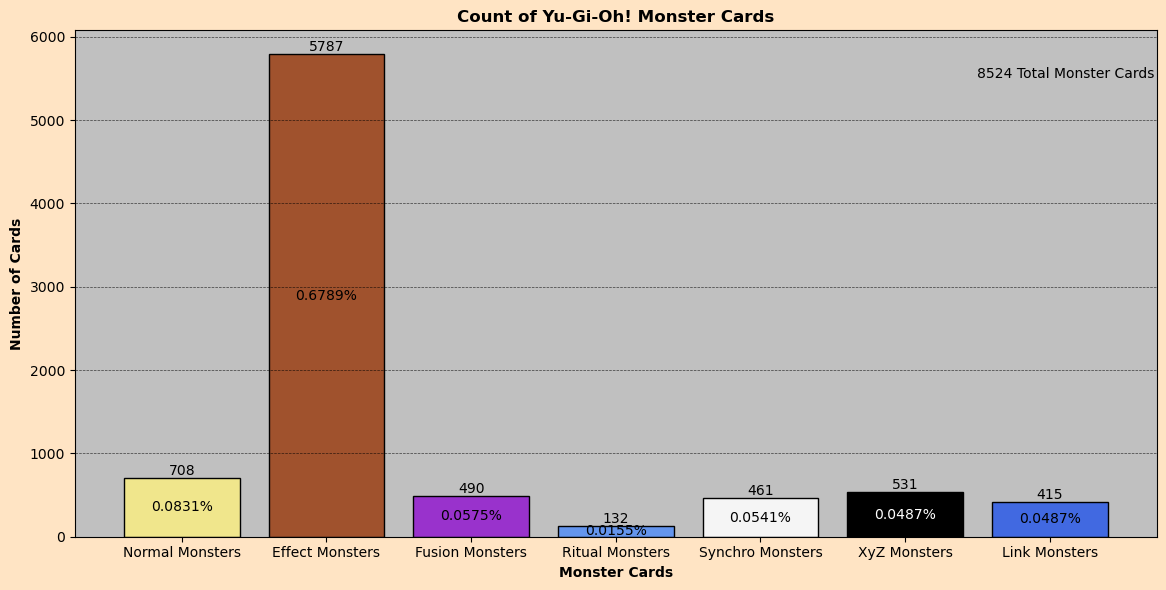

In [13]:
# Now that the monster card types are sorted we can display them on a graph.

fig, ax = plt.subplots(figsize = (12, 6))

effect_to_count = 'Effect Monster'
effect_count = monsters_df['type'].value_counts()[effect_to_count]

normal_to_count = 'Normal Monster'
normal_count = monsters_df['type'].value_counts()[normal_to_count]

xyz_to_count = 'XYZ Monster'
xyz_count = monsters_df['type'].value_counts()[xyz_to_count]

fusion_to_count = 'Fusion Monster'
fusion_count = monsters_df['type'].value_counts()[fusion_to_count]

synchro_to_count = 'Synchro Monster'
synchro_count = monsters_df['type'].value_counts()[synchro_to_count]

link_to_count = 'Link Monster'
link_count = monsters_df['type'].value_counts()[link_to_count]

ritual_to_count = 'Ritual Monster'
ritual_count = monsters_df['type'].value_counts()[ritual_to_count]

monsters_categories = ['Normal Monsters', 'Effect Monsters', 'Fusion Monsters', 'Ritual Monsters', 'Synchro Monsters', 'XyZ Monsters', 'Link Monsters']
monsters_values = [normal_count, effect_count, fusion_count, ritual_count, synchro_count, xyz_count, link_count]
monsters_colors = ['khaki', 'sienna', 'darkorchid', 'cornflowerblue', 'whitesmoke', 'black', 'royalblue']

monsters_total = monsters_df['type'].count()
monsters_percentages = [normal_count / monsters_total, effect_count / monsters_total, fusion_count / monsters_total, ritual_count / monsters_total, synchro_count / monsters_total, xyz_count / monsters_total, link_count / monsters_total]

monsters_bar = plt.bar(monsters_categories, monsters_values, color = monsters_colors, edgecolor = 'black')

for num in monsters_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, monsters_percentages in enumerate(monsters_percentages):
    plt.text(monsters_categories[i], monsters_values[i] / 2, f'{monsters_percentages:.4f}%', ha='center', va='center', color='black')

plt.text(monsters_categories[5], monsters_values[5] / 2, f'{monsters_percentages:.4f}%', ha='center', va='center', color='white')
ax.annotate(f"{monsters_total} Total Monster Cards", xy=(5.5, 5500), xytext=(5.5, 5500))

monsters_colors[0] = 'khaki'
monsters_colors[1] = 'sienna'
monsters_colors[2] = 'darkorchid'
monsters_colors[3] = 'cornflowerblue'
monsters_colors[4] = 'whitesmoke'
monsters_colors[5] = 'black'
monsters_colors[6] = 'royalblue'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Cards', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! Monster Cards', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [14]:
# The amount of Effect Monsters in the game towers over the amount of all other Monster cards in the game. Normal Monsters make up about 8.31% of all monsters,
# Effect monsters make up about 67.89% of all monsters, Fusion Monsters make up about 5.75% of all monsters, Ritual Monsters make up about 1.55% of all monsters,
# Synchro monsters make up about 5.41% of all monsters, XyZ Monsters make up about 4.87% of all monsters, and Link monsters make up about 4.87% of all monsters.

# What is interesting to note is that Link Monsters are the newest Extra Deck mechanic to be introduced into the game (2017) and yet its total number of cards 
# aren't that far behind Synchro Monsters (2008) and Fusion Monsters (2002). Normal Monsters, Effect Monsters, Fusion Monsters, and Ritual Monsters were all
# introduced in 2002. Despite Ritual Monsters being one of the oldest mechanics in the game it has the fewest amount of cards.

In [15]:
# In online discussions I will sometimes hear people complain that certain types receive more love from Konami while others are neglected. Before creating the 
# next graph I want to predict that Dragons, Spellcasters, Warriors being the top 3 most supported types (by number of cards each type has).

In [16]:
# Organizing the data in order to view the different Monster Types.

monster_types_df = master_df[['race']]

normal_spell_trap_remove = 'Normal'
continuous_spell_trap_remove = 'Continuous'
quickplay_remove = 'Quick-Play'
field_spell_remove = 'Field'
equip_spell_trap_remove = 'Equip'
counter_trap_remove = 'Counter'
ritual_spell_remove = 'Ritual'

monster_types_df = monster_types_df[monster_types_df['race'] != normal_spell_trap_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != continuous_spell_trap_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != quickplay_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != field_spell_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != equip_spell_trap_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != counter_trap_remove]
monster_types_df = monster_types_df[monster_types_df['race'] != ritual_spell_remove]

monster_types_df.value_counts()

race         
Warrior          1080
Machine           980
Fiend             827
Spellcaster       725
Dragon            719
Fairy             540
Beast             392
Winged Beast      328
Aqua              273
Cyberse           267
Insect            263
Rock              252
Zombie            249
Beast-Warrior     246
Plant             243
Psychic           183
Reptile           178
Pyro              151
Fish              140
Thunder           140
Dinosaur          136
Wyrm               92
Sea Serpent        90
Illusion           24
Divine-Beast        5
Creator-God         1
Name: count, dtype: int64

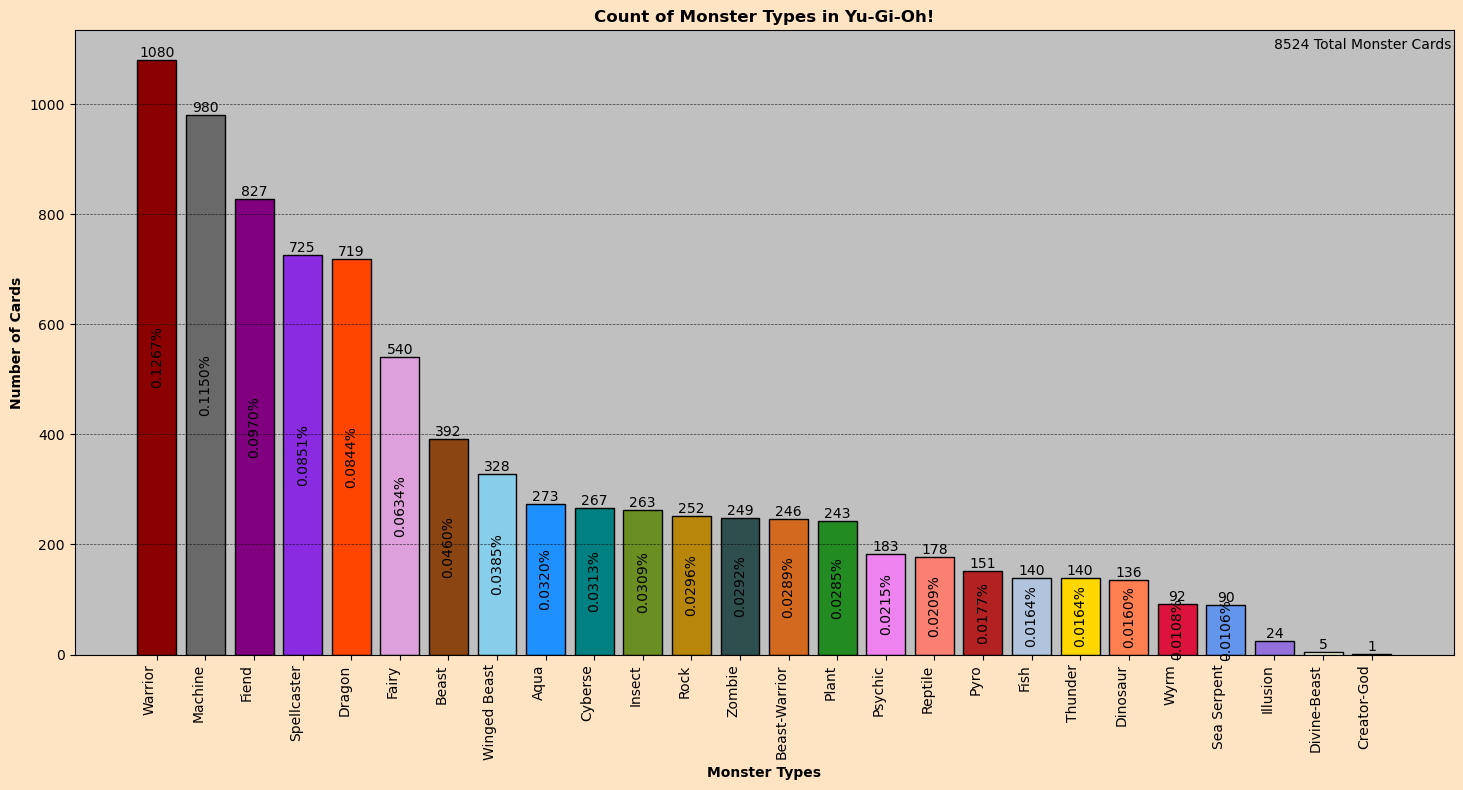

In [17]:
fig, ax = plt.subplots(figsize = (15, 8))

warrior_to_count = 'Warrior'
warrior_count = monster_types_df['race'].value_counts()[warrior_to_count]

machine_to_count = 'Machine'
machine_count = monster_types_df['race'].value_counts()[machine_to_count]

fiend_to_count = 'Fiend'
fiend_count = monster_types_df['race'].value_counts()[fiend_to_count]

spellcaster_to_count = 'Spellcaster'
spellcaster_count = monster_types_df['race'].value_counts()[spellcaster_to_count]

dragon_to_count = 'Dragon'
dragon_count = monster_types_df['race'].value_counts()[dragon_to_count]

fairy_to_count = 'Fairy'
fairy_count = monster_types_df['race'].value_counts()[fairy_to_count]

beast_to_count = 'Beast'
beast_count = monster_types_df['race'].value_counts()[beast_to_count]

wingedbeast_to_count = 'Winged Beast'
wingedbeast_count = monster_types_df['race'].value_counts()[wingedbeast_to_count]

aqua_to_count = 'Aqua'
aqua_count = monster_types_df['race'].value_counts()[aqua_to_count]

cyberse_to_count = 'Cyberse'
cyberse_count = monster_types_df['race'].value_counts()[cyberse_to_count]

insect_to_count = 'Insect'
insect_count = monster_types_df['race'].value_counts()[insect_to_count]

rock_to_count = 'Rock'
rock_count = monster_types_df['race'].value_counts()[rock_to_count]

zombie_to_count = 'Zombie'
zombie_count = monster_types_df['race'].value_counts()[zombie_to_count]

beastwarrior_to_count = 'Beast-Warrior'
beastwarrior_count = monster_types_df['race'].value_counts()[beastwarrior_to_count]

plant_to_count = 'Plant'
plant_count = monster_types_df['race'].value_counts()[plant_to_count]

psychic_to_count = 'Psychic'
psychic_count = monster_types_df['race'].value_counts()[psychic_to_count]

reptile_to_count = 'Reptile'
reptile_count = monster_types_df['race'].value_counts()[reptile_to_count]

pyro_to_count = 'Pyro'
pyro_count = monster_types_df['race'].value_counts()[pyro_to_count]

fish_to_count = 'Fish'
fish_count = monster_types_df['race'].value_counts()[fish_to_count]

thunder_to_count = 'Thunder'
thunder_count = monster_types_df['race'].value_counts()[thunder_to_count]

dinosaur_to_count = 'Dinosaur'
dinosaur_count = monster_types_df['race'].value_counts()[dinosaur_to_count]

wyrm_to_count = 'Wyrm'
wyrm_count = monster_types_df['race'].value_counts()[wyrm_to_count]

seaserpent_to_count = 'Sea Serpent'
seaserpent_count = monster_types_df['race'].value_counts()[seaserpent_to_count]

illusion_to_count = 'Illusion'
illusion_count = monster_types_df['race'].value_counts()[illusion_to_count]

divinebeast_to_count = 'Divine-Beast'
divinebeast_count = monster_types_df['race'].value_counts()[divinebeast_to_count]

creatorgod_to_count = 'Creator-God'
creatorgod_count = monster_types_df['race'].value_counts()[creatorgod_to_count]

monster_types_categories = ['Warrior', 'Machine', 'Fiend', 'Spellcaster', 'Dragon', 'Fairy', 'Beast', 'Winged Beast', 'Aqua', 'Cyberse', 'Insect', 'Rock', 'Zombie', 
                       'Beast-Warrior', 'Plant', 'Psychic', 'Reptile', 'Pyro', 'Fish', 'Thunder', 'Dinosaur', 'Wyrm', 'Sea Serpent', 'Illusion', 'Divine-Beast',
                       'Creator-God']

monster_types_values = [warrior_count, machine_count, fiend_count, spellcaster_count, dragon_count, fairy_count, beast_count, wingedbeast_count, aqua_count, 
                        cyberse_count, insect_count, rock_count, zombie_count, beastwarrior_count, plant_count, psychic_count, reptile_count, pyro_count, 
                        fish_count, thunder_count, dinosaur_count, wyrm_count, seaserpent_count, illusion_count, divinebeast_count, creatorgod_count]

monster_types_colors = ['darkred', 'dimgrey', 'purple', 'blueviolet', 'orangered', 'plum', 'saddlebrown', 'skyblue', 'dodgerblue', 'teal', 'olivedrab', 
                        'darkgoldenrod', 'darkslategrey', 'chocolate', 'forestgreen', 'violet', 'salmon', 'firebrick', 'lightsteelblue', 'gold', 'coral', 
                        'crimson', 'cornflowerblue', 'mediumpurple', 'lightyellow', 'floralwhite']

monster_types_percentages = [warrior_count / monsters_total, machine_count / monsters_total, fiend_count / monsters_total, spellcaster_count / monsters_total, 
                             dragon_count / monsters_total, fairy_count / monsters_total, beast_count / monsters_total, wingedbeast_count / monsters_total,
                             aqua_count / monsters_total, cyberse_count / monsters_total, insect_count / monsters_total, rock_count / monsters_total, 
                             zombie_count / monsters_total, beastwarrior_count / monsters_total, plant_count / monsters_total, psychic_count / monsters_total,
                             reptile_count / monsters_total, pyro_count / monsters_total, fish_count / monsters_total, thunder_count / monsters_total, 
                             dinosaur_count / monsters_total, wyrm_count / monsters_total, seaserpent_count / monsters_total, illusion_count / monsters_total,
                             divinebeast_count / monsters_total, creatorgod_count / monsters_total]

monster_types_bar = plt.bar(monster_types_categories, monster_types_values, color = monster_types_colors, edgecolor = 'black')

for num in monster_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

end_forloop = 23

for i, monster_types_percentages in enumerate(monster_types_percentages):
    if i == end_forloop:
        break
    plt.text(monster_types_categories[i], monster_types_values[i] / 2, f'{monster_types_percentages:.4f}%', ha='center', va='center', color='black', rotation = 90)

ax.annotate(f"{monsters_total} Total Monster Cards", xy=(23, 1100), xytext=(23, 1100))

monster_types_colors[0] = 'darkred'
monster_types_colors[1] = 'dimgrey'
monster_types_colors[2] = 'purple'
monster_types_colors[3] = 'blueviolet'
monster_types_colors[4] = 'orangered'
monster_types_colors[5] = 'plum'
monster_types_colors[6] = 'saddlebrown'
monster_types_colors[7] = 'skyblue'
monster_types_colors[8] = 'dodgerblue'
monster_types_colors[9] = 'teal'
monster_types_colors[10] = 'olivedrab'
monster_types_colors[11] = 'darkgoldenrod'
monster_types_colors[12] = 'darkslategrey'
monster_types_colors[13] = 'chocolate'
monster_types_colors[14] = 'forestgreen'
monster_types_colors[15] = 'violet'
monster_types_colors[16] = 'salmon'
monster_types_colors[17] = 'firebrick'
monster_types_colors[18] = 'lightsteelblue'
monster_types_colors[19] = 'gold'
monster_types_colors[20] = 'coral'
monster_types_colors[21] = 'crimson'
monster_types_colors[22] = 'cornflowerblue'
monster_types_colors[23] = 'mediumpurple'
monster_types_colors[24] = 'lightyellow'
monster_types_colors[25] = 'floralwhite'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Types', weight = 'bold')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Monster Types in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [18]:
# Looks like Dragons and Spellcasters weren't in the top 3 but top 5 instead. I predicted Warriors would be up there but I was not expecting Machines and Fiends
# to have as many cards as they do.

In [19]:
# Moving on I will be looking into Monster Attributes. Most players agree that Light and Dark Attributes are the best in the game so I will predict that Light
# and Dark will have the most monster cards.

monster_attributes_df = master_df[['attribute']]
monster_attributes_df.value_counts()

attribute
DARK         2374
EARTH        1944
LIGHT        1752
WATER         889
WIND          793
FIRE          766
DIVINE          6
Name: count, dtype: int64

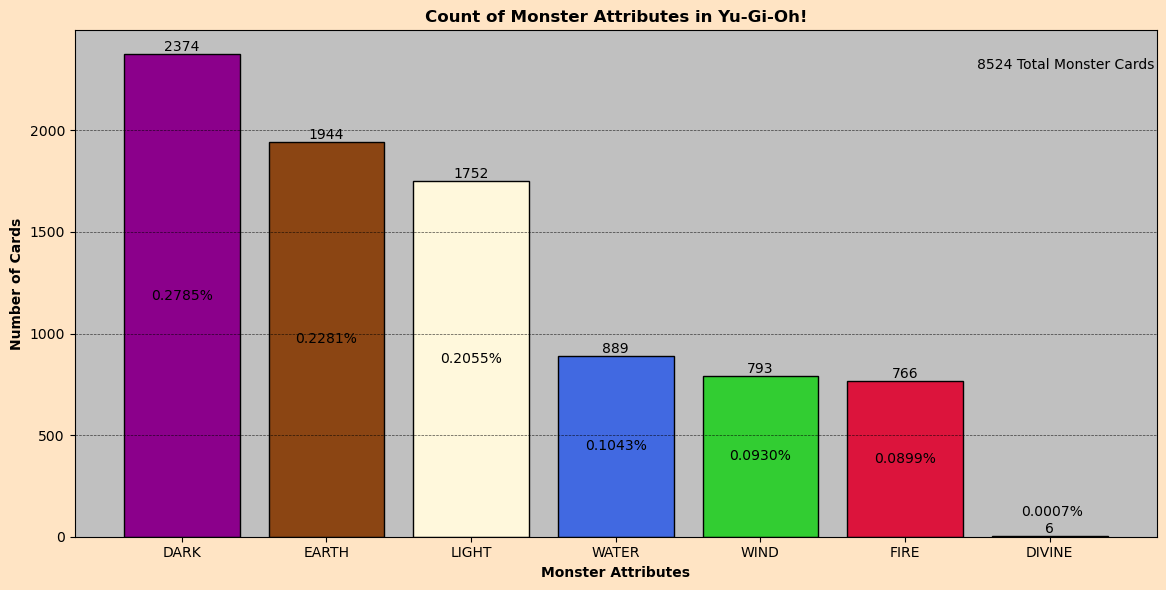

In [20]:
# It appears that Dark attribute has the most cards and Earth with the next highest and then Light. Putting this data onto a graph.

fig, ax = plt.subplots(figsize = (12, 6))

dark_to_count = 'DARK'
dark_count = monster_attributes_df['attribute'].value_counts()[dark_to_count]

earth_to_count = 'EARTH'
earth_count = monster_attributes_df['attribute'].value_counts()[earth_to_count]

light_to_count = 'LIGHT'
light_count = monster_attributes_df['attribute'].value_counts()[light_to_count]

water_to_count = 'WATER'
water_count = monster_attributes_df['attribute'].value_counts()[water_to_count]

wind_to_count = 'WIND'
wind_count = monster_attributes_df['attribute'].value_counts()[wind_to_count]

fire_to_count = 'FIRE'
fire_count = monster_attributes_df['attribute'].value_counts()[fire_to_count]

divine_to_count = 'DIVINE'
divine_count = monster_attributes_df['attribute'].value_counts()[divine_to_count]

monster_attribute_categories = ['DARK', 'EARTH', 'LIGHT', 'WATER', 'WIND', 'FIRE', 'DIVINE']

monster_attribute_values = [dark_count, earth_count, light_count, water_count, wind_count, fire_count, divine_count]

monster_attribute_colors = ['darkmagenta', 'saddlebrown', 'cornsilk', 'royalblue', 'limegreen', 'crimson', 'gold']

monster_attribute_percentages = [dark_count / monsters_total, earth_count / monsters_total, light_count / monsters_total, water_count / monsters_total, 
                             wind_count / monsters_total, fire_count / monsters_total, divine_count / monsters_total]

monster_attributes_bar = plt.bar(monster_attribute_categories, monster_attribute_values, color = monster_attribute_colors, edgecolor = 'black')

for num in monster_attributes_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

end_forloop_one = 6

for i, monster_attribute_percentages in enumerate(monster_attribute_percentages):
        if i == end_forloop_one:
            break
        plt.text(monster_attribute_categories[i], monster_attribute_values[i] / 2, f'{monster_attribute_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{monsters_total} Total Monster Cards", xy=(5.5, 2300), xytext=(5.5, 2300))
ax.annotate(f"{divine_count / monsters_total:.4f}%" , xy=(5.8, 100), xytext=(5.8, 100))

monster_attribute_colors[0] = 'darkmagenta'
monster_attribute_colors[1] = 'saddlebrown'
monster_attribute_colors[2] = 'cornsilk'
monster_attribute_colors[3] = 'royalblue'
monster_attribute_colors[4] = 'limegreen'
monster_attribute_colors[5] = 'crimson'
monster_attribute_colors[6] = 'gold'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Attributes', weight = 'bold')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Monster Attributes in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()


In [21]:
# Now a few questions have popped into my head: What is the Average ATK? What is the average DEF? Average ATK for types, attributes?
# Creating a dataframe to pull the relevent info from the master_df.

monster_stats_df = master_df[['atk', 'def', 'level', 'race', 'attribute', 'linkval']]


column_to_check = 'atk'
exception_column = 'def'

rows_to_drop = monster_stats_df[monster_stats_df[column_to_check].isnull() & monster_stats_df[exception_column].isnull()].index

monster_stats_df = monster_stats_df.drop(rows_to_drop)

monster_stats_df

atk     def  level      race attribute  linkval
9       500.0  1500.0    3.0     Beast     EARTH      NaN
10     1250.0  2100.0    5.0      Aqua     WATER      NaN
11      800.0  1200.0    3.0    Insect      WIND      NaN
13     1800.0   800.0    4.0      Fish     WATER      NaN
15      300.0   200.0    2.0    Insect      DARK      NaN
...       ...     ...    ...       ...       ...      ...
13276  1800.0   100.0    4.0   Warrior     EARTH      NaN
13277   500.0   300.0    2.0   Warrior     WATER      NaN
13278  1800.0  1500.0    4.0     Fiend      DARK      NaN
13279     0.0     0.0   10.0   Warrior     EARTH      NaN
13280   500.0   400.0    2.0  Dinosaur     EARTH      NaN

[8524 rows x 6 columns]

In [22]:
# Calculating the average ATK and DEF stats

atk_column = 'atk'
atk_average = monster_stats_df['atk'].mean()
print(atk_average)

def_column = 'def'
def_average = monster_stats_df['def'].mean()
print(def_average)

1496.6916940403567
1265.0770748550992


In [23]:
atk_type_groupby = monster_stats_df.groupby('race')['atk'].mean()
print("Grouped by ATK/Type:\n", atk_type_groupby)

Grouped by ATK/Type:
 race
Aqua             1228.571429
Beast            1231.377551
Beast-Warrior    1644.715447
Creator-God         0.000000
Cyberse          1486.891386
Dinosaur         1791.176471
Divine-Beast     1600.000000
Dragon           2101.529903
Fairy            1393.055556
Fiend            1434.570738
Fish             1319.642857
Illusion         1945.833333
Insect           1237.262357
Machine          1478.061224
Plant            1166.872428
Psychic          1510.928962
Pyro             1464.238411
Reptile          1269.382022
Rock             1376.190476
Sea Serpent      1711.666667
Spellcaster      1337.862069
Thunder          1448.214286
Warrior          1623.435185
Winged Beast     1371.036585
Wyrm             1991.847826
Zombie           1464.257028
Name: atk, dtype: float64


In [24]:
def_type_groupby = monster_stats_df.groupby('race')['def'].mean()
print("Grouped by DEF/Type:\n", def_type_groupby)

Grouped by DEF/Type:
 race
Aqua             1214.498141
Beast            1092.801047
Beast-Warrior    1162.236287
Creator-God         0.000000
Cyberse          1162.275449
Dinosaur         1059.318182
Divine-Beast     1600.000000
Dragon           1686.151603
Fairy            1281.445312
Fiend            1143.969659
Fish             1017.985612
Illusion         1493.478261
Insect           1106.573705
Machine          1398.290598
Plant            1097.555556
Psychic          1314.689266
Pyro              996.644295
Reptile          1052.906977
Rock             1456.854839
Sea Serpent      1354.597701
Spellcaster      1235.446686
Thunder          1176.296296
Warrior          1307.347328
Winged Beast     1149.373041
Wyrm             1751.204819
Zombie            955.186722
Name: def, dtype: float64


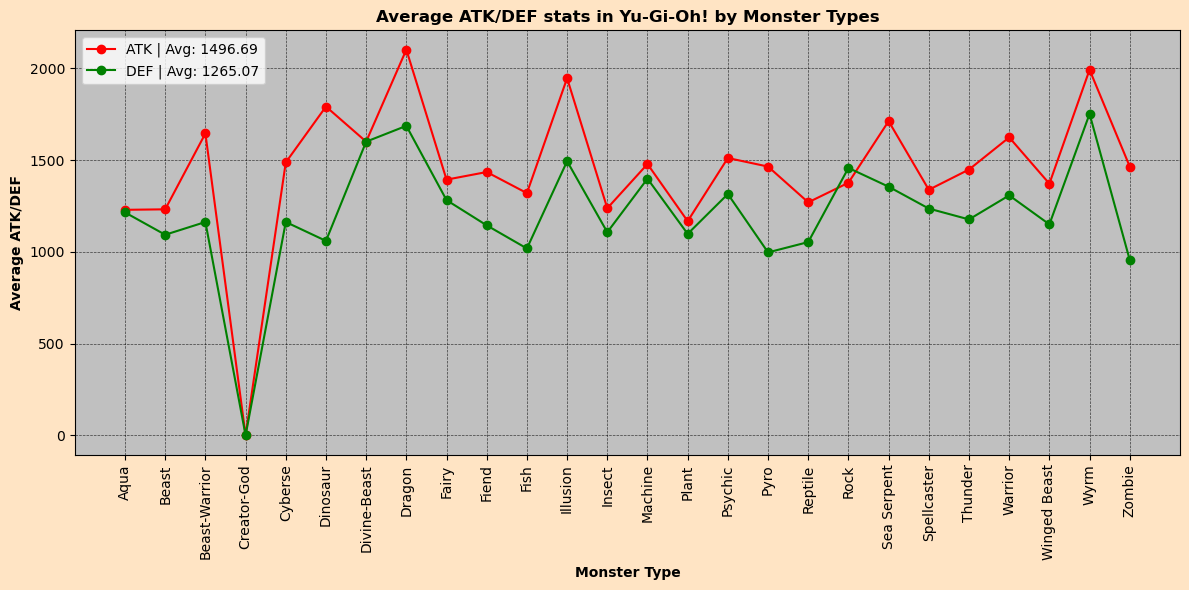

In [25]:
# Putting the stats above into a line graph.

fig, ax = plt.subplots(figsize = (12, 6))

monster_atk_def_categories = ['Aqua', 'Beast', 'Beast-Warrior', 'Creator-God', 'Cyberse', 'Dinosaur', 'Divine-Beast', 'Dragon', 'Fairy', 'Fiend', 'Fish',
                              'Illusion', 'Insect', 'Machine', 'Plant', 'Psychic', 'Pyro', 'Reptile', 'Rock', 'Sea Serpent', 'Spellcaster', 'Thunder', 'Warrior', 
                              'Winged Beast', 'Wyrm', 'Zombie']

plt.plot(monster_atk_def_categories, atk_type_groupby, label='ATK | Avg: 1496.69', marker='o', linestyle='-', color = 'red')
plt.plot(monster_atk_def_categories, def_type_groupby, label='DEF | Avg: 1265.07', marker='o', linestyle='-', color = 'green')

'''
Adds numbers above each point. Commented out because it didn't look good.

for i, j in zip(monster_atk_def_categories, atk_type_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

for i, j in zip(monster_atk_def_categories, def_type_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

'''

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel('Monster Type', weight = "bold")
plt.xticks(rotation=90, ha='center')
plt.ylabel('Average ATK/DEF', weight = "bold")
plt.title('Average ATK/DEF stats in Yu-Gi-Oh! by Monster Types', weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.5, axis = 'both', alpha=0.7)
plt.tight_layout()
plt.legend()

In [26]:
# Dragon monsters have the highest average ATK stat followed by Wyrms (Funny because a Wyrm is a dragon-like creature with no limbs/wings, similar to a serpent).
# The third highest average ATK stat are Illusion monsters. I think this may be because they are the newest type introduced to the game, so Konami probably
# wanted them to have good stats so that they would do well. 

# Dragons and Wyrms once again are at the top with the highest average for DEF. Divine-Beast comes in 3rd with Illusion coming in 4th.

# Dragons and Wyrms have the highest ATK and highest DEF on average. Creator-God has the lowest average ATK and DEF, but it only has 1 card in that type which
# has ? ATK and ? DEF (? is treated as 0).

In [27]:
# Calculating Avg ATK/DEF for each attribute.

atk_attribute_groupby = monster_stats_df.groupby('attribute')['atk'].mean()
print("Grouped by ATK/Attribute:\n", atk_attribute_groupby)

def_attribute_groupby = monster_stats_df.groupby('attribute')['def'].mean()
print("Grouped by DEF/Attribute:\n", def_attribute_groupby)

Grouped by ATK/Attribute:
 attribute
DARK      1548.331929
DIVINE    1333.333333
EARTH     1377.906379
FIRE      1580.613577
LIGHT     1587.705479
WATER     1400.224972
WIND      1460.529634
Name: atk, dtype: float64
Grouped by DEF/Attribute:
 attribute
DARK      1257.076442
DIVINE    1333.333333
EARTH     1239.158177
FIRE      1168.758621
LIGHT     1365.640097
WATER     1248.126464
WIND      1243.668407
Name: def, dtype: float64


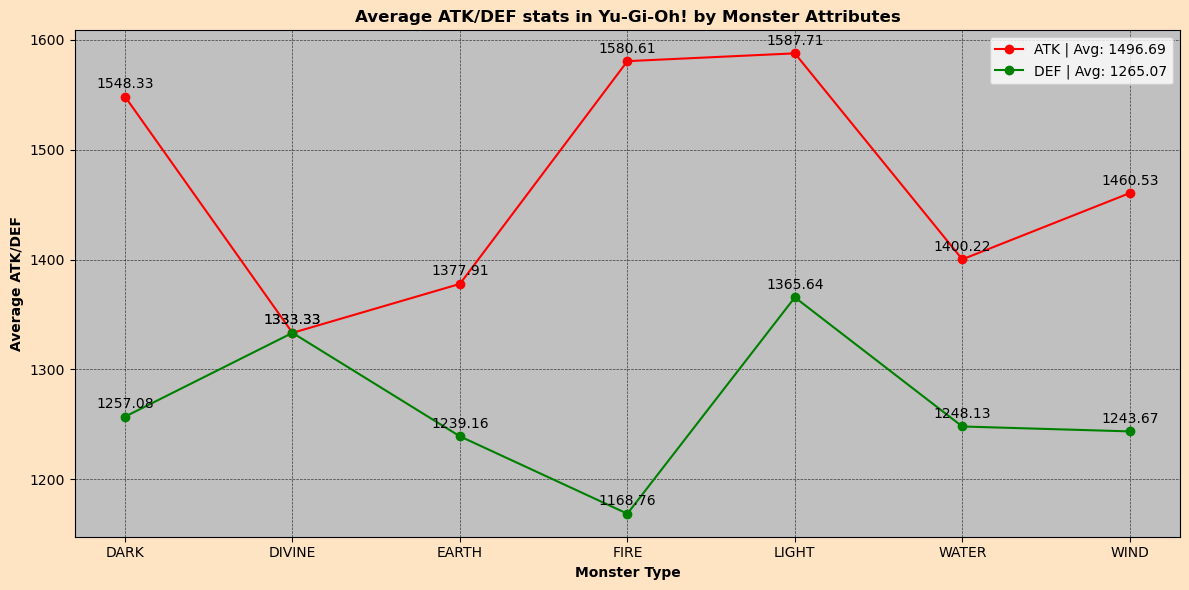

In [28]:
# Plugging the above numbers into another line graph.

fig, ax = plt.subplots(figsize = (12, 6))

monster_atk_def_attribute_categories = ['DARK', 'DIVINE', 'EARTH', 'FIRE', 'LIGHT', 'WATER', 'WIND']

plt.plot(monster_atk_def_attribute_categories, atk_attribute_groupby, label='ATK | Avg: 1496.69', marker='o', linestyle='-', color = 'red')
plt.plot(monster_atk_def_attribute_categories, def_attribute_groupby, label='DEF | Avg: 1265.07', marker='o', linestyle='-', color = 'green')

for i, j in zip(monster_atk_def_attribute_categories, atk_attribute_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

for i, j in zip(monster_atk_def_attribute_categories, def_attribute_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel('Monster Type', weight = "bold")
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average ATK/DEF', weight = "bold")
plt.title('Average ATK/DEF stats in Yu-Gi-Oh! by Monster Attributes', weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.5, axis = 'both', alpha=0.7)
plt.tight_layout()
plt.legend()

In [29]:
# Now I want to check average ATK/DEF for every level. 

atk_level_groupby = monster_stats_df.groupby('level')['atk'].mean()
print("Grouped by ATK/Level:\n", atk_level_groupby)

def_level_groupby = monster_stats_df.groupby('level')['def'].mean()
print("Grouped by DEF/Level:\n", def_level_groupby)

Grouped by ATK/Level:
 level
0.0      500.000000
1.0      246.177370
2.0      574.154930
3.0      959.307179
4.0     1405.992677
5.0     1749.485179
6.0     2005.386950
7.0     2262.851406
8.0     2503.436658
9.0     2530.312500
10.0    2556.066176
11.0    3066.666667
12.0    3078.289474
13.0    2000.000000
Name: atk, dtype: float64
Grouped by DEF/Level:
 level
0.0      333.333333
1.0      359.403670
2.0      666.549296
3.0      951.502504
4.0     1163.315704
5.0     1430.577223
6.0     1531.760243
7.0     1871.987952
8.0     1969.137466
9.0     2182.812500
10.0    2112.867647
11.0    2756.060606
12.0    2772.368421
13.0    1750.000000
Name: def, dtype: float64


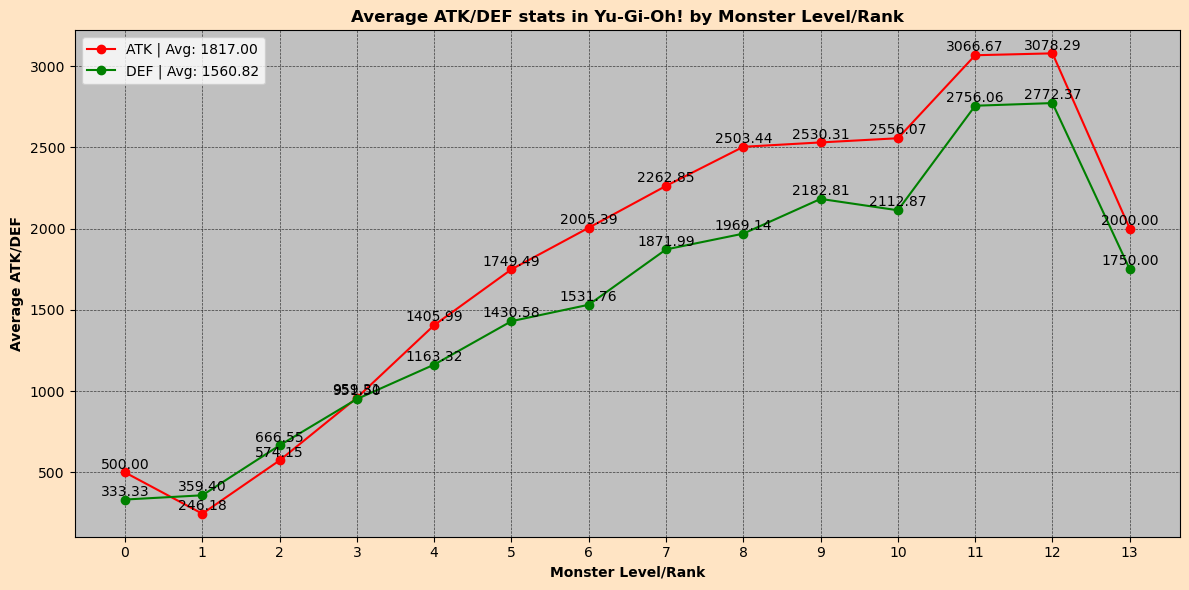

In [30]:
# Plugging the above numbers into another line graph.

fig, ax = plt.subplots(figsize = (12, 6))

monster_level_categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

plt.plot(monster_level_categories, atk_level_groupby, label='ATK | Avg: 1817.00', marker='o', linestyle='-', color = 'red')
plt.plot(monster_level_categories, def_level_groupby, label='DEF | Avg: 1560.82', marker='o', linestyle='-', color = 'green')

for i, j in zip(monster_level_categories, atk_level_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

for i, j in zip(monster_level_categories, def_level_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel('Monster Level/Rank', weight = "bold")
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average ATK/DEF', weight = "bold")
plt.title('Average ATK/DEF stats in Yu-Gi-Oh! by Monster Level/Rank', weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.5, axis = 'both', alpha=0.7)
plt.tight_layout()
plt.legend()

In [31]:
# It looks like generally ATK and DEF increase on average as the level of the monster increases. *Note* Level 0 only has 6 cards and Level 13 only has 2 cards.
# Level 11 and 12 have very similar averages for both ATK and DEF. For levels 1 and 2 DEF on average is higher and at level 3 they appear to be tied. For all
# of the other levels ATK is higher on average than DEF. 

In [32]:
# Since Link Monsters do not have a level/Rank or DEF value I think it could be interesting to look at them next.

atk_link_groupby = monster_stats_df.groupby('linkval')['atk'].mean()
print("Grouped by ATK/Link Rating:\n", atk_link_groupby)

Grouped by ATK/Link Rating:
 linkval
1.0     816.071429
2.0    1418.965517
3.0    2273.157895
4.0    2638.775510
5.0    3180.000000
6.0    1750.000000
Name: atk, dtype: float64


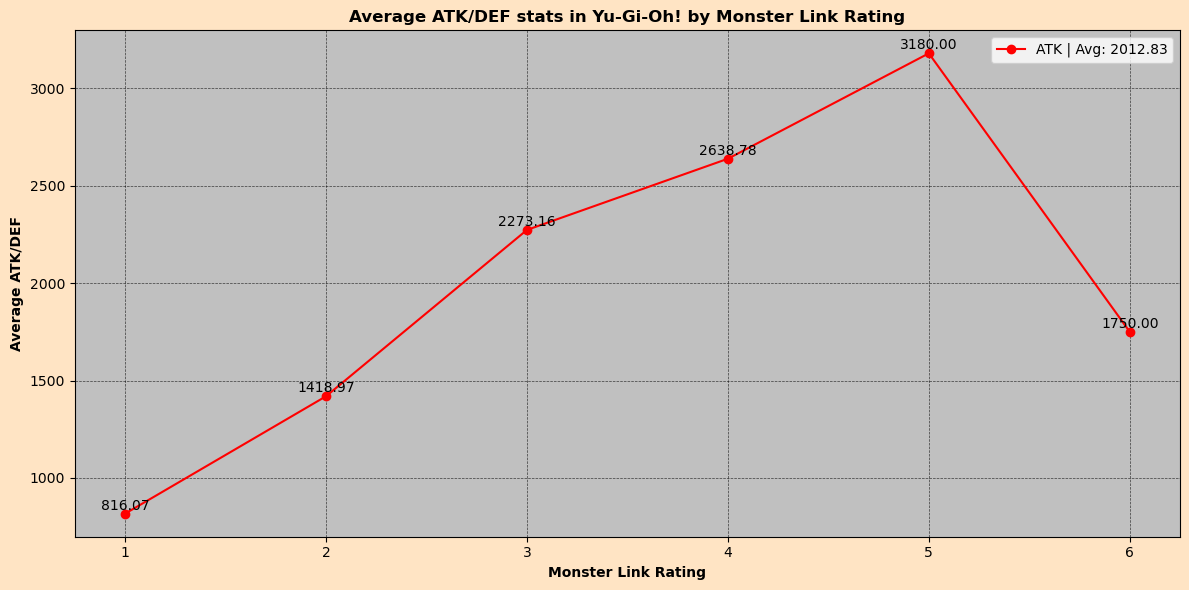

In [33]:
# Plugging the above numbers into another line graph.

fig, ax = plt.subplots(figsize = (12, 6))

monster_link_categories = ['1', '2', '3', '4', '5', '6']

plt.plot(monster_link_categories, atk_link_groupby, label='ATK | Avg: 2012.83', marker='o', linestyle='-', color = 'red')

for i, j in zip(monster_link_categories, atk_link_groupby):
    plt.text(i, j + 5, str(f"{j:.2f}"), ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel('Monster Link Rating', weight = "bold")
plt.xticks(rotation=0, ha='center')
plt.ylabel('Average ATK/DEF', weight = "bold")
plt.title('Average ATK/DEF stats in Yu-Gi-Oh! by Monster Link Rating', weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.5, axis = 'both', alpha=0.7)
plt.tight_layout()
plt.legend()

In [34]:
# Average ATK increases as Link Rating increasing until we get to Link 6 Monsters. There are only 2 Link 6 Monsters in the game.

In [35]:
# Taking a look at the different kinds of Spell Cards in the game.

spells_df = master_df[['type', 'race']]

spell_filter = 'Spell Card'

spells_df = spells_df[spells_df['type'] == spell_filter]
spells_df

type        race
0      Spell Card  Continuous
1      Spell Card  Continuous
2      Spell Card  Quick-Play
3      Spell Card  Quick-Play
4      Spell Card       Equip
...           ...         ...
13245  Spell Card      Normal
13246  Spell Card  Quick-Play
13247  Spell Card      Normal
13250  Spell Card       Field
13256  Spell Card  Continuous

[2592 rows x 2 columns]

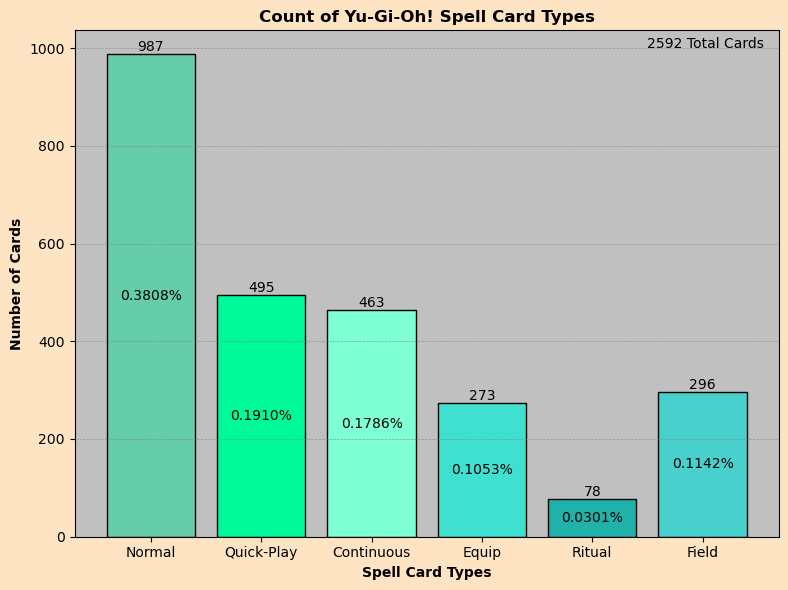

In [36]:
# Creating bar graph to show the different kinds of Spell Cards.

fig, ax = plt.subplots(figsize = (8, 6))

normalspells_to_count = 'Normal'
normalspells_count = spells_df['race'].value_counts()[normalspells_to_count]

quickplayspells_to_count = 'Quick-Play'
quickplayspells_count = spells_df['race'].value_counts()[quickplayspells_to_count]

continuousspells_to_count = 'Continuous'
continuousspells_count = spells_df['race'].value_counts()[continuousspells_to_count]

equipspells_to_count = 'Equip'
equipspells_count = spells_df['race'].value_counts()[equipspells_to_count]

ritualspells_to_count = 'Ritual'
ritualspells_count = spells_df['race'].value_counts()[ritualspells_to_count]

fieldspells_to_count = 'Field'
fieldspells_count = spells_df['race'].value_counts()[fieldspells_to_count]

spell_categories = ['Normal', 'Quick-Play', 'Continuous', 'Equip', 'Ritual', 'Field']
spell_values = [normalspells_count, quickplayspells_count, continuousspells_count, equipspells_count, ritualspells_count, fieldspells_count]
spell_colors = ['mediumaquamarine', 'mediumspringgreen', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise']

spells_total = spells_df['race'].count()
spells_percentages = [normalspells_count / spells_total, quickplayspells_count / spells_total, continuousspells_count / spells_total, 
                          equipspells_count / spells_total, ritualspells_count / spells_total, fieldspells_count / spells_total]

spells_bar = plt.bar(spell_categories, spell_values, color = spell_colors, edgecolor = 'black')

for num in spells_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, spells_percentages in enumerate(spells_percentages):
    plt.text(spell_categories[i], spell_values[i] / 2, f'{spells_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{spells_total} Total Cards", xy=(4.5, 1000), xytext=(4.5, 1000))

spell_colors[0] = 'mediumaquamarine'
spell_colors[1] = 'mediumspringgreen'
spell_colors[2] = 'aquamarine'
spell_colors[3] = 'turquoise'
spell_colors[4] = 'lightseagreen'
spell_colors[5] = 'mediumturquoise'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Spell Card Types', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! Spell Card Types', weight = 'bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [37]:
# Normal Spell cards are the most common type of Spell Card in the game. Ritual Spell Cards are the fewest and Ritual Monsters were also the fewest out of the
# different Monster Card types.

In [38]:
# Taking a look at the different kinds of Trap Cards in the game.

traps_df = master_df[['type', 'race']]

trap_filter = 'Trap Card'

traps_df = traps_df[traps_df['type'] == trap_filter]
traps_df

type        race
19     Trap Card      Normal
20     Trap Card      Normal
23     Trap Card      Normal
25     Trap Card      Normal
26     Trap Card      Normal
...          ...         ...
13230  Trap Card      Normal
13240  Trap Card  Continuous
13241  Trap Card  Continuous
13261  Trap Card      Normal
13263  Trap Card  Continuous

[1934 rows x 2 columns]

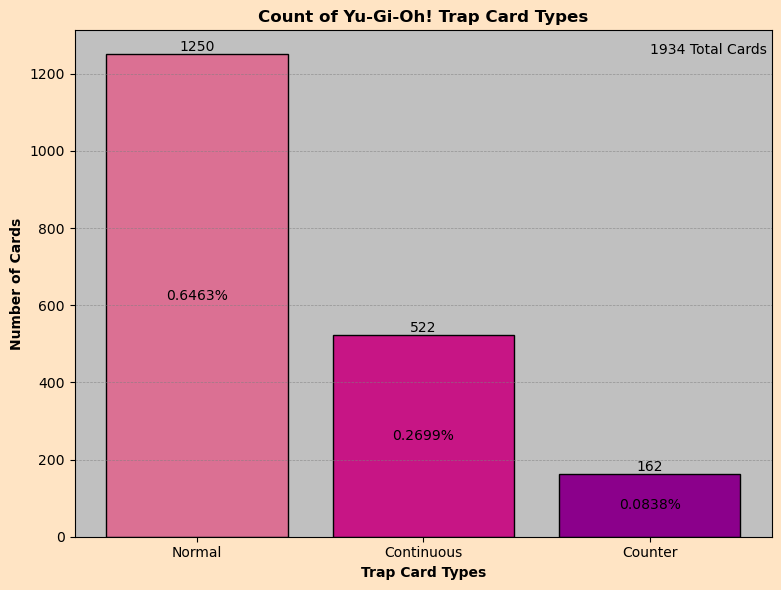

In [39]:
# Creating bar graph to show the different kinds of Trap Cards.

fig, ax = plt.subplots(figsize = (8, 6))

normaltraps_to_count = 'Normal'
normaltraps_count = traps_df['race'].value_counts()[normaltraps_to_count]

continuoustraps_to_count = 'Continuous'
continuoustraps_count = traps_df['race'].value_counts()[continuoustraps_to_count]

countertraps_to_count = 'Counter'
countertraps_count = traps_df['race'].value_counts()[countertraps_to_count]

trap_categories = ['Normal', 'Continuous', 'Counter']
trap_values = [normaltraps_count, continuoustraps_count, countertraps_count]
trap_colors = ['palevioletred', 'mediumvioletred', 'darkmagenta']

traps_total = traps_df['race'].count()
traps_percentages = [normaltraps_count / traps_total, continuoustraps_count / traps_total, countertraps_count / traps_total]

traps_bar = plt.bar(trap_categories, trap_values, color = trap_colors, edgecolor = 'black')

for num in traps_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, traps_percentages in enumerate(traps_percentages):
    plt.text(trap_categories[i], trap_values[i] / 2, f'{traps_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{traps_total} Total Cards", xy=(2, 1250), xytext=(2, 1250))

spell_colors[0] = 'palevioletred'
spell_colors[1] = 'mediumvioletred'
spell_colors[2] = 'darkmagenta'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Trap Card Types', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! Trap Card Types', weight = 'bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [40]:
# Breakout of the different Trap Cards in the game.

In [41]:
# Now lets look at the limited and banned cards.

banned_tcg_df = master_df[['name', 'type', 'atk', 'def', 'level', 'race', 'attribute', 'ban_tcg']]

tcg_limited_check = 'Limited'
limited_tcg_ed_df = banned_tcg_df[banned_tcg_df['ban_tcg'] == tcg_limited_check]

pd.set_option('display.max_rows', None)
limited_tcg_ed_df



name                     type     atk  \
388                 Ancient Fairy Dragon          Synchro Monster  2100.0   
493                 Anti-Spell Fragrance                Trap Card     NaN   
602                   Archnemeses Protos           Effect Monster  2500.0   
760                  Astrograph Sorcerer  Pendulum Effect Monster  2500.0   
1017       Beatrice, Lady of the Eternal              XYZ Monster  2500.0   
1117          Black Dragon Collapserpent           Effect Monster  1800.0   
1238   Blaster, Dragon Ruler of Infernos           Effect Monster  2800.0   
1567                   Bystial Magnamhut           Effect Monster  2500.0   
1600                 Called by the Grave               Spell Card     NaN   
1620                    Card Destruction               Spell Card     NaN   
1628                      Card of Demise               Spell Card     NaN   
1718                        Chain Strike               Spell Card     NaN   
1729                     Change of Heart               Spell Card     NaN   
1763                         Chaos Space               Spell Card     NaN   
1794                        Chicken Game               Spell Card     NaN   
2287                           Cyber Jar      Flip Effect Monster   900.0   
2491                     Daigusto Emeral              XYZ Monster  1800.0   
2526                 Danger!? Jackalope?           Effect Monster   500.0   
2527                Danger!? Tsuchinoko?           Effect Monster  1300.0   
2598                        Dark Grepher           Effect Monster  1700.0   
2806    Denglong, First of the Yang Zing    Synchro Tuner Monster     0.0   
3082          Divine Wind of Mist Valley               Spell Card     NaN   
3278                    Dragonic Diagram               Spell Card     NaN   
3885            Exodia the Forbidden One           Effect Monster  1000.0   
4089                     Final Countdown               Spell Card     NaN   
4306                      Foolish Burial               Spell Card     NaN   
4615                  Gateway of the Six               Spell Card     NaN   
4668           Gem-Knight Master Diamond           Fusion Monster  2900.0   
5054                    Gold Sarcophagus               Spell Card     NaN   
5124                         Gozen Match                Trap Card     NaN   
5403             Harpie's Feather Duster               Spell Card     NaN   
5695      Ib the World Chalice Justiciar    Synchro Tuner Monster  1800.0   
5824                  Infernity Launcher               Spell Card     NaN   
5913                      Instant Fusion               Spell Card     NaN   
5929                       Into the Void               Spell Card     NaN   
6217          Keldo the Sacred Protector           Effect Monster  1200.0   
6469       Left Arm of the Forbidden One           Normal Monster   200.0   
6470       Left Leg of the Forbidden One           Normal Monster   200.0   
6729                     Lunalight Tiger  Pendulum Effect Monster  1200.0   
6858                   Magical Explosion                Trap Card     NaN   
6868           Magical Mid-Breaker Field               Spell Card     NaN   
6989         Majespecter Unicorn - Kirin  Pendulum Effect Monster  2000.0   
7550                  Miscellaneousaurus           Effect Monster  1800.0   
7607                        Monster Gate               Spell Card     NaN   
7610                      Monster Reborn               Spell Card     NaN   
7638                        Morphing Jar      Flip Effect Monster   700.0   
7695             Mudora the Sword Oracle           Effect Monster  1500.0   
7835                 Naturia Sacred Tree                Trap Card     NaN   
8340                    One Day of Peace               Spell Card     NaN   
8343                         One for One               Spell Card     NaN   
8459                 PSY-Framegear Gamma            Tuner Monster  1000.0   
8461                 PSY-Framelo

In [42]:
limited_tcg_df = banned_tcg_df[banned_tcg_df['ban_tcg'] == tcg_limited_check]

pd.set_option('display.max_rows', None)
limited_tcg_df

name                     type     atk  \
388                 Ancient Fairy Dragon          Synchro Monster  2100.0   
493                 Anti-Spell Fragrance                Trap Card     NaN   
602                   Archnemeses Protos           Effect Monster  2500.0   
760                  Astrograph Sorcerer  Pendulum Effect Monster  2500.0   
1017       Beatrice, Lady of the Eternal              XYZ Monster  2500.0   
1117          Black Dragon Collapserpent           Effect Monster  1800.0   
1238   Blaster, Dragon Ruler of Infernos           Effect Monster  2800.0   
1567                   Bystial Magnamhut           Effect Monster  2500.0   
1600                 Called by the Grave               Spell Card     NaN   
1620                    Card Destruction               Spell Card     NaN   
1628                      Card of Demise               Spell Card     NaN   
1718                        Chain Strike               Spell Card     NaN   
1729                     Change of Heart               Spell Card     NaN   
1763                         Chaos Space               Spell Card     NaN   
1794                        Chicken Game               Spell Card     NaN   
2287                           Cyber Jar      Flip Effect Monster   900.0   
2491                     Daigusto Emeral              XYZ Monster  1800.0   
2526                 Danger!? Jackalope?           Effect Monster   500.0   
2527                Danger!? Tsuchinoko?           Effect Monster  1300.0   
2598                        Dark Grepher           Effect Monster  1700.0   
2806    Denglong, First of the Yang Zing    Synchro Tuner Monster     0.0   
3082          Divine Wind of Mist Valley               Spell Card     NaN   
3278                    Dragonic Diagram               Spell Card     NaN   
3885            Exodia the Forbidden One           Effect Monster  1000.0   
4089                     Final Countdown               Spell Card     NaN   
4306                      Foolish Burial               Spell Card     NaN   
4615                  Gateway of the Six               Spell Card     NaN   
4668           Gem-Knight Master Diamond           Fusion Monster  2900.0   
5054                    Gold Sarcophagus               Spell Card     NaN   
5124                         Gozen Match                Trap Card     NaN   
5403             Harpie's Feather Duster               Spell Card     NaN   
5695      Ib the World Chalice Justiciar    Synchro Tuner Monster  1800.0   
5824                  Infernity Launcher               Spell Card     NaN   
5913                      Instant Fusion               Spell Card     NaN   
5929                       Into the Void               Spell Card     NaN   
6217          Keldo the Sacred Protector           Effect Monster  1200.0   
6469       Left Arm of the Forbidden One           Normal Monster   200.0   
6470       Left Leg of the Forbidden One           Normal Monster   200.0   
6729                     Lunalight Tiger  Pendulum Effect Monster  1200.0   
6858                   Magical Explosion                Trap Card     NaN   
6868           Magical Mid-Breaker Field               Spell Card     NaN   
6989         Majespecter Unicorn - Kirin  Pendulum Effect Monster  2000.0   
7550                  Miscellaneousaurus           Effect Monster  1800.0   
7607                        Monster Gate               Spell Card     NaN   
7610                      Monster Reborn               Spell Card     NaN   
7638                        Morphing Jar      Flip Effect Monster   700.0   
7695             Mudora the Sword Oracle           Effect Monster  1500.0   
7835                 Naturia Sacred Tree                Trap Card     NaN   
8340                    One Day of Peace               Spell Card     NaN   
8343                         One for One               Spell Card     NaN   
8459                 PSY-Framegear Gamma            Tuner Monster  1000.0   
8461                 PSY-Framelo

In [43]:
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Synchro Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Effect Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Pendulum Effect Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('XYZ Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Flip Effect Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Synchro Tuner Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Fusion Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Normal Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Tuner Monster', 'Monster Card')
limited_tcg_df['type'] = limited_tcg_df['type'].replace('Link Monster', 'Monster Card')

limited_tcg_df

C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\804576554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_tcg_df['type'] = limited_tcg_df['type'].replace('Synchro Monster', 'Monster Card')
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\804576554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_tcg_df['type'] = limited_tcg_df['type'].replace('Effect Monster', 'Monster Card')
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\804576554.py:3: SettingWithCopyWarning: 
A value is tryin

name          type     atk     def  level  \
388                 Ancient Fairy Dragon  Monster Card  2100.0  3000.0    7.0   
493                 Anti-Spell Fragrance     Trap Card     NaN     NaN    NaN   
602                   Archnemeses Protos  Monster Card  2500.0  3000.0   11.0   
760                  Astrograph Sorcerer  Monster Card  2500.0  2000.0    7.0   
1017       Beatrice, Lady of the Eternal  Monster Card  2500.0  2800.0    6.0   
1117          Black Dragon Collapserpent  Monster Card  1800.0  1700.0    4.0   
1238   Blaster, Dragon Ruler of Infernos  Monster Card  2800.0  1800.0    7.0   
1567                   Bystial Magnamhut  Monster Card  2500.0  2000.0    6.0   
1600                 Called by the Grave    Spell Card     NaN     NaN    NaN   
1620                    Card Destruction    Spell Card     NaN     NaN    NaN   
1628                      Card of Demise    Spell Card     NaN     NaN    NaN   
1718                        Chain Strike    Spell Card     NaN     NaN    NaN   
1729                     Change of Heart    Spell Card     NaN     NaN    NaN   
1763                         Chaos Space    Spell Card     NaN     NaN    NaN   
1794                        Chicken Game    Spell Card     NaN     NaN    NaN   
2287                           Cyber Jar  Monster Card   900.0   900.0    3.0   
2491                     Daigusto Emeral  Monster Card  1800.0   800.0    4.0   
2526                 Danger!? Jackalope?  Monster Card   500.0  2000.0    3.0   
2527                Danger!? Tsuchinoko?  Monster Card  1300.0     0.0    3.0   
2598                        Dark Grepher  Monster Card  1700.0  1600.0    4.0   
2806    Denglong, First of the Yang Zing  Monster Card     0.0  2800.0    5.0   
3082          Divine Wind of Mist Valley    Spell Card     NaN     NaN    NaN   
3278                    Dragonic Diagram    Spell Card     NaN     NaN    NaN   
3885            Exodia the Forbidden One  Monster Card  1000.0  1000.0    3.0   
4089                     Final Countdown    Spell Card     NaN     NaN    NaN   
4306                      Foolish Burial    Spell Card     NaN     NaN    NaN   
4615                  Gateway of the Six    Spell Card     NaN     NaN    NaN   
4668           Gem-Knight Master Diamond  Monster Card  2900.0  2500.0    9.0   
5054                    Gold Sarcophagus    Spell Card     NaN     NaN    NaN   
5124                         Gozen Match     Trap Card     NaN     NaN    NaN   
5403             Harpie's Feather Duster    Spell Card     NaN     NaN    NaN   
5695      Ib the World Chalice Justiciar  Monster Card  1800.0  2100.0    5.0   
5824                  Infernity Launcher    Spell Card     NaN     NaN    NaN   
5913                      Instant Fusion    Spell Card     NaN     NaN    NaN   
5929                       Into the Void    Spell Card     NaN     NaN    NaN   
6217          Keldo the Sacred Protector  Monster Card  1200.0  1600.0    4.0   
6469       Left Arm of the Forbidden One  Monster Card   200.0   300.0    1.0   
6470       Left Leg of the Forbidden One  Monster Card   200.0   300.0    1.0   
6729                     Lunalight Tiger  Monster Card  1200.0   800.0    3.0   
6858                   Magical Explosion     Trap Card     NaN     NaN    NaN   
6868           Magical Mid-Breaker Field    Spell Card     NaN     NaN    NaN   
6989         Majespecter Unicorn - Kirin  Monster Card  2000.0  2000.0    6.0   
7550                  Miscellaneousaurus  Monster Card  1800.0  1000.0    4.0   
7607                        Monster Gate    Spell Card     NaN     NaN    NaN   
7610                      Monster Reborn    Spell Card     NaN     NaN    NaN   
7638                        Morphing Jar  Monster Card   700.0   600.0    2.0   
7695             Mudora the Sword Oracle  Monster Card  1500.0  1800.0    4.0   
7835                 Naturia Sacred Tree     Trap Card     NaN     NaN    NaN   
8340                    One Day of Peace    Spell Card     NaN     

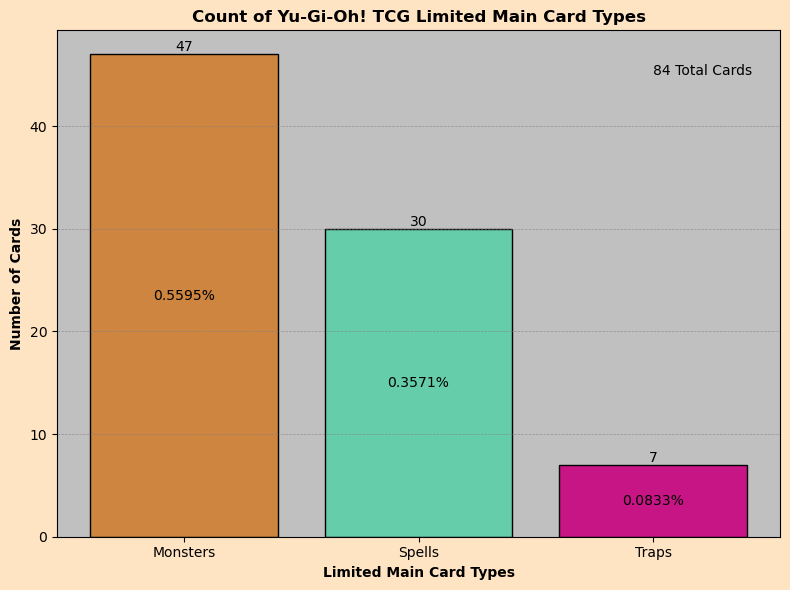

In [44]:
# Plugging Limited Cards into a graph

fig, ax = plt.subplots(figsize = (8, 6))

limited_monsters_to_count = 'Monster Card'
limited_monsters_count = limited_tcg_df['type'].value_counts()[limited_monsters_to_count]

limited_spells_to_count = 'Spell Card'
limited_spells_count = limited_tcg_df['type'].value_counts()[limited_spells_to_count]

limited_traps_to_count = 'Trap Card'
limited_traps_count = limited_tcg_df['type'].value_counts()[limited_traps_to_count]

limited_main_types_categories = ['Monsters', 'Spells', 'Traps']
limited_main_types_values = [limited_monsters_count, limited_spells_count, limited_traps_count]
limited_main_types_colors = ['peru', 'mediumaquamarine', 'mediumvioletred']

limited_tcg_total = limited_tcg_df['type'].count()
limited_main_types_percentages = [limited_monsters_count / limited_tcg_total, limited_spells_count / limited_tcg_total, limited_traps_count / limited_tcg_total]

limited_main_types_bar = plt.bar(limited_main_types_categories, limited_main_types_values, color = limited_main_types_colors, edgecolor = 'black')

for num in limited_main_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, limited_main_types_percentages in enumerate(limited_main_types_percentages):
    plt.text(limited_main_types_categories[i], limited_main_types_values[i] / 2, f'{limited_main_types_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{limited_tcg_total} Total Cards", xy=(2, 45), xytext=(2, 45))

main_types_colors[0] = 'peru'
main_types_colors[1] = 'mediumaquamarine'
main_types_colors[2] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Limited Main Card Types', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! TCG Limited Main Card Types', weight = 'bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [45]:
# This graph looks pretty similar to the original Monster vs Spells vs Traps graph but there is a higher percentage of spells and a lower percentage of
# monsters and traps.

In [46]:
limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Synchro Tuner Monster', 'Synchro Monster')
limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Pendulum Effect Monster', 'Effect Monster')
limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Flip Effect Monster', 'Effect Monster')
limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Tuner Monster', 'Effect Monster')

limited_tcg_ed_df

C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\1887642901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Synchro Tuner Monster', 'Synchro Monster')
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\1887642901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_tcg_ed_df['type'] = limited_tcg_ed_df['type'].replace('Pendulum Effect Monster', 'Effect Monster')
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\1887642901.py:3: Settin

name             type     atk     def  \
388                 Ancient Fairy Dragon  Synchro Monster  2100.0  3000.0   
493                 Anti-Spell Fragrance        Trap Card     NaN     NaN   
602                   Archnemeses Protos   Effect Monster  2500.0  3000.0   
760                  Astrograph Sorcerer   Effect Monster  2500.0  2000.0   
1017       Beatrice, Lady of the Eternal      XYZ Monster  2500.0  2800.0   
1117          Black Dragon Collapserpent   Effect Monster  1800.0  1700.0   
1238   Blaster, Dragon Ruler of Infernos   Effect Monster  2800.0  1800.0   
1567                   Bystial Magnamhut   Effect Monster  2500.0  2000.0   
1600                 Called by the Grave       Spell Card     NaN     NaN   
1620                    Card Destruction       Spell Card     NaN     NaN   
1628                      Card of Demise       Spell Card     NaN     NaN   
1718                        Chain Strike       Spell Card     NaN     NaN   
1729                     Change of Heart       Spell Card     NaN     NaN   
1763                         Chaos Space       Spell Card     NaN     NaN   
1794                        Chicken Game       Spell Card     NaN     NaN   
2287                           Cyber Jar   Effect Monster   900.0   900.0   
2491                     Daigusto Emeral      XYZ Monster  1800.0   800.0   
2526                 Danger!? Jackalope?   Effect Monster   500.0  2000.0   
2527                Danger!? Tsuchinoko?   Effect Monster  1300.0     0.0   
2598                        Dark Grepher   Effect Monster  1700.0  1600.0   
2806    Denglong, First of the Yang Zing  Synchro Monster     0.0  2800.0   
3082          Divine Wind of Mist Valley       Spell Card     NaN     NaN   
3278                    Dragonic Diagram       Spell Card     NaN     NaN   
3885            Exodia the Forbidden One   Effect Monster  1000.0  1000.0   
4089                     Final Countdown       Spell Card     NaN     NaN   
4306                      Foolish Burial       Spell Card     NaN     NaN   
4615                  Gateway of the Six       Spell Card     NaN     NaN   
4668           Gem-Knight Master Diamond   Fusion Monster  2900.0  2500.0   
5054                    Gold Sarcophagus       Spell Card     NaN     NaN   
5124                         Gozen Match        Trap Card     NaN     NaN   
5403             Harpie's Feather Duster       Spell Card     NaN     NaN   
5695      Ib the World Chalice Justiciar  Synchro Monster  1800.0  2100.0   
5824                  Infernity Launcher       Spell Card     NaN     NaN   
5913                      Instant Fusion       Spell Card     NaN     NaN   
5929                       Into the Void       Spell Card     NaN     NaN   
6217          Keldo the Sacred Protector   Effect Monster  1200.0  1600.0   
6469       Left Arm of the Forbidden One   Normal Monster   200.0   300.0   
6470       Left Leg of the Forbidden One   Normal Monster   200.0   300.0   
6729                     Lunalight Tiger   Effect Monster  1200.0   800.0   
6858                   Magical Explosion        Trap Card     NaN     NaN   
6868           Magical Mid-Breaker Field       Spell Card     NaN     NaN   
6989         Majespecter Unicorn - Kirin   Effect Monster  2000.0  2000.0   
7550                  Miscellaneousaurus   Effect Monster  1800.0  1000.0   
7607                        Monster Gate       Spell Card     NaN     NaN   
7610                      Monster Reborn       Spell Card     NaN     NaN   
7638                        Morphing Jar   Effect Monster   700.0   600.0   
7695             Mudora the Sword Oracle   Effect Monster  1500.0  1800.0   
7835                 Naturia Sacred Tree        Trap Card     NaN     NaN   
8340                    One Day of Peace       Spell Card     NaN     NaN   
8343                         One for One       Spell Card     NaN     NaN   
8459                 PSY-Framegear Gamma   Effect Monster  1000.0     0.0   
8461                 PSY-Framelo

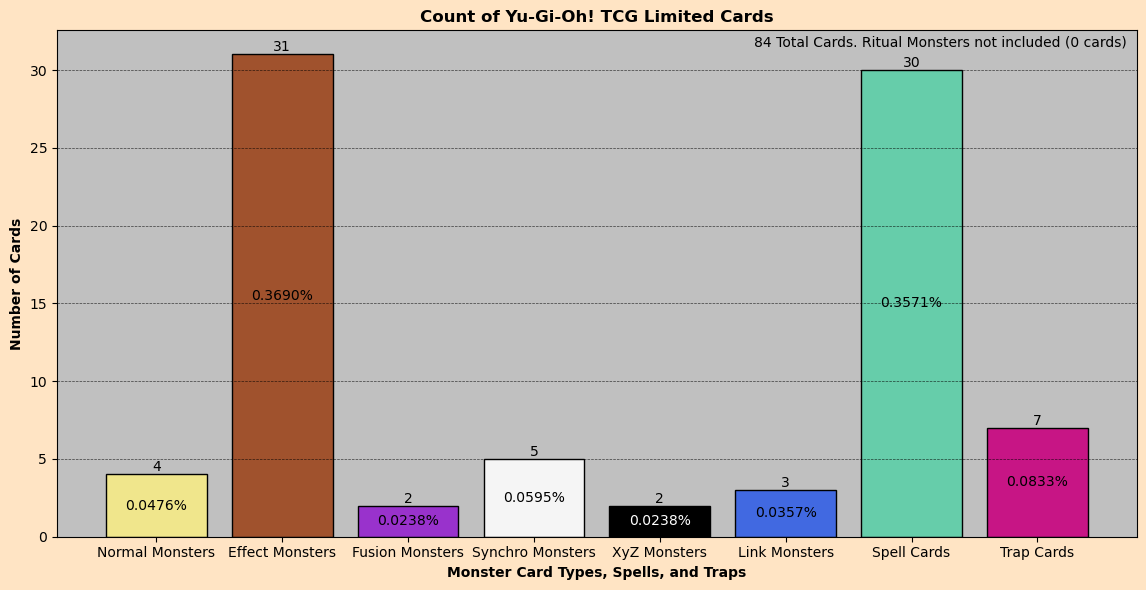

In [47]:
# Now that the monster card types are sorted we can display them on a graph.

fig, ax = plt.subplots(figsize = (12, 6))

limited_effect_to_count = 'Effect Monster'
effect_count = limited_tcg_ed_df['type'].value_counts()[limited_effect_to_count]

normal_to_count = 'Normal Monster'
normal_count = limited_tcg_ed_df['type'].value_counts()[normal_to_count]

xyz_to_count = 'XYZ Monster'
xyz_count = limited_tcg_ed_df['type'].value_counts()[xyz_to_count]

fusion_to_count = 'Fusion Monster'
fusion_count = limited_tcg_ed_df['type'].value_counts()[fusion_to_count]

synchro_to_count = 'Synchro Monster'
synchro_count = limited_tcg_ed_df['type'].value_counts()[synchro_to_count]

link_to_count = 'Link Monster'
link_count = limited_tcg_ed_df['type'].value_counts()[link_to_count]

limited_spells_to_count = 'Spell Card'
limited_spells_count = limited_tcg_df['type'].value_counts()[limited_spells_to_count]

limited_traps_to_count = 'Trap Card'
limited_traps_count = limited_tcg_df['type'].value_counts()[limited_traps_to_count]

monsters_categories = ['Normal Monsters', 'Effect Monsters', 'Fusion Monsters', 'Synchro Monsters', 'XyZ Monsters', 'Link Monsters', 'Spell Cards', 'Trap Cards']
monsters_values = [normal_count, effect_count, fusion_count, synchro_count, xyz_count, link_count, limited_spells_count, limited_traps_count]
monsters_colors = ['khaki', 'sienna', 'darkorchid', 'whitesmoke', 'black', 'royalblue', 'mediumaquamarine', 'mediumvioletred']

monsters_total = limited_tcg_ed_df['type'].count()
monsters_percentages = [normal_count / monsters_total, effect_count / monsters_total, fusion_count / monsters_total, synchro_count / monsters_total, xyz_count / monsters_total, link_count / monsters_total, 
                        limited_spells_count / monsters_total, limited_traps_count / monsters_total]

monsters_bar = plt.bar(monsters_categories, monsters_values, color = monsters_colors, edgecolor = 'black')

for num in monsters_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, monsters_percentages in enumerate(monsters_percentages):
    plt.text(monsters_categories[i], monsters_values[i] / 2, f'{monsters_percentages:.4f}%', ha='center', va='center', color='black')

plt.text(monsters_categories[4], monsters_values[4] / 2, f'{0.0238}%', ha='center', va='center', color='white')

ax.annotate(f"{monsters_total} Total Cards. Ritual Monsters not included (0 cards)", xy=(4.75, 31.5), xytext=(4.75, 31.5))

monsters_colors[0] = 'khaki'
monsters_colors[1] = 'sienna'
monsters_colors[2] = 'darkorchid'
monsters_colors[3] = 'whitesmoke'
monsters_colors[4] = 'black'
monsters_colors[5] = 'royalblue'
monsters_colors[6] = 'mediumaquamarine'
monsters_colors[7] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Card Types, Spells, and Traps', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! TCG Limited Cards', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [48]:
# Breakout of the different Limited Cards in the TCG by the different Monster Card Types and Spells and Traps. Spells and Effect Monsters make up the most
# Limited Cards.

In [49]:
limited_tcg_ed_df = limited_tcg_ed_df[limited_tcg_ed_df['race'] != continuous_spell_trap_remove]
limited_tcg_ed_df = limited_tcg_ed_df[limited_tcg_ed_df['race'] != normal_spell_trap_remove]
limited_tcg_ed_df = limited_tcg_ed_df[limited_tcg_ed_df['race'] != quickplay_remove]
limited_tcg_ed_df = limited_tcg_ed_df[limited_tcg_ed_df['race'] != field_spell_remove]
limited_tcg_ed_df = limited_tcg_ed_df[limited_tcg_ed_df['race'] != equip_spell_trap_remove]

limited_tcg_ed_df = limited_tcg_ed_df.reset_index()
limited_tcg_ed_df

index                               name             type     atk     def  \
0     388               Ancient Fairy Dragon  Synchro Monster  2100.0  3000.0   
1     602                 Archnemeses Protos   Effect Monster  2500.0  3000.0   
2     760                Astrograph Sorcerer   Effect Monster  2500.0  2000.0   
3    1017      Beatrice, Lady of the Eternal      XYZ Monster  2500.0  2800.0   
4    1117         Black Dragon Collapserpent   Effect Monster  1800.0  1700.0   
5    1238  Blaster, Dragon Ruler of Infernos   Effect Monster  2800.0  1800.0   
6    1567                  Bystial Magnamhut   Effect Monster  2500.0  2000.0   
7    2287                          Cyber Jar   Effect Monster   900.0   900.0   
8    2491                    Daigusto Emeral      XYZ Monster  1800.0   800.0   
9    2526                Danger!? Jackalope?   Effect Monster   500.0  2000.0   
10   2527               Danger!? Tsuchinoko?   Effect Monster  1300.0     0.0   
11   2598                       Dark Grepher   Effect Monster  1700.0  1600.0   
12   2806   Denglong, First of the Yang Zing  Synchro Monster     0.0  2800.0   
13   3885           Exodia the Forbidden One   Effect Monster  1000.0  1000.0   
14   4668          Gem-Knight Master Diamond   Fusion Monster  2900.0  2500.0   
15   5695     Ib the World Chalice Justiciar  Synchro Monster  1800.0  2100.0   
16   6217         Keldo the Sacred Protector   Effect Monster  1200.0  1600.0   
17   6469      Left Arm of the Forbidden One   Normal Monster   200.0   300.0   
18   6470      Left Leg of the Forbidden One   Normal Monster   200.0   300.0   
19   6729                    Lunalight Tiger   Effect Monster  1200.0   800.0   
20   6989        Majespecter Unicorn - Kirin   Effect Monster  2000.0  2000.0   
21   7550                 Miscellaneousaurus   Effect Monster  1800.0  1000.0   
22   7638                       Morphing Jar   Effect Monster   700.0   600.0   
23   7695            Mudora the Sword Oracle   Effect Monster  1500.0  1800.0   
24   8459                PSY-Framegear Gamma   Effect Monster  1000.0     0.0   
25   8461                PSY-Framelord Omega  Synchro Monster  2800.0  2200.0   
26   8657            Performapal Monkeyboard   Effect Monster  1000.0  2400.0   
27   8754                 Phantom Skyblaster   Effect Monster  1100.0   800.0   
28   9427                    Red Rose Dragon   Effect Monster  1000.0  1800.0   
29   9466    Redox, Dragon Ruler of Boulders   Effect Monster  1600.0  3000.0   
30   9540              Rescue-ACE Air Lifter   Effect Monster  1700.0  1700.0   
31   9611     Right Arm of the Forbidden One   Normal Monster   200.0   300.0   
32   9612     Right Leg of the Forbidden One   Normal Monster   200.0   300.0   
33  10951                     Striker Dragon     Link Monster  1000.0     NaN   
34  10969                         Substitoad   Effect Monster   100.0  2000.0   
35  11014                    Sunavalon Dryas     Link Monster     0.0     NaN   
36  11026                     Sunvine Healer     Link Monster   600.0     NaN   
37  11315               T.G. Hyper Librarian  Synchro Monster  2400.0  1800.0   
38  11379                 Tearlaments Havnis   Effect Monster  1600.0  1000.0   
39  11384                 Tearlaments Merrli   Effect Monster   800.0  2000.0   
40  11389               Tearlaments Scheiren   Effect Monster  1800.0  1300.0   
41  11405    Tempest, Dragon Ruler of Storms   Effect Monster  2400.0  2200.0   
42  11750            Thunder Dragon Colossus   Fusion Monster  2600.0  2400.0   
43  11778  Tidal, Dragon Ruler of Waterfalls   Effect Monster  2600.0  2000.0   
44  12274         Unchained Soul of Sharvara   Effect Monster  2000.0  1500.0   
45  12782          White Dragon Wyverburster   Effect Monster  1700.0  1800.0   
46  13267                    Zoodiac Ratpier   Effect Monster     0.0     0.0   

    level           race attribute  ban_tcg  
0     7.0         Dragon     LIGHT  Limited  
1    11.0           Wyr

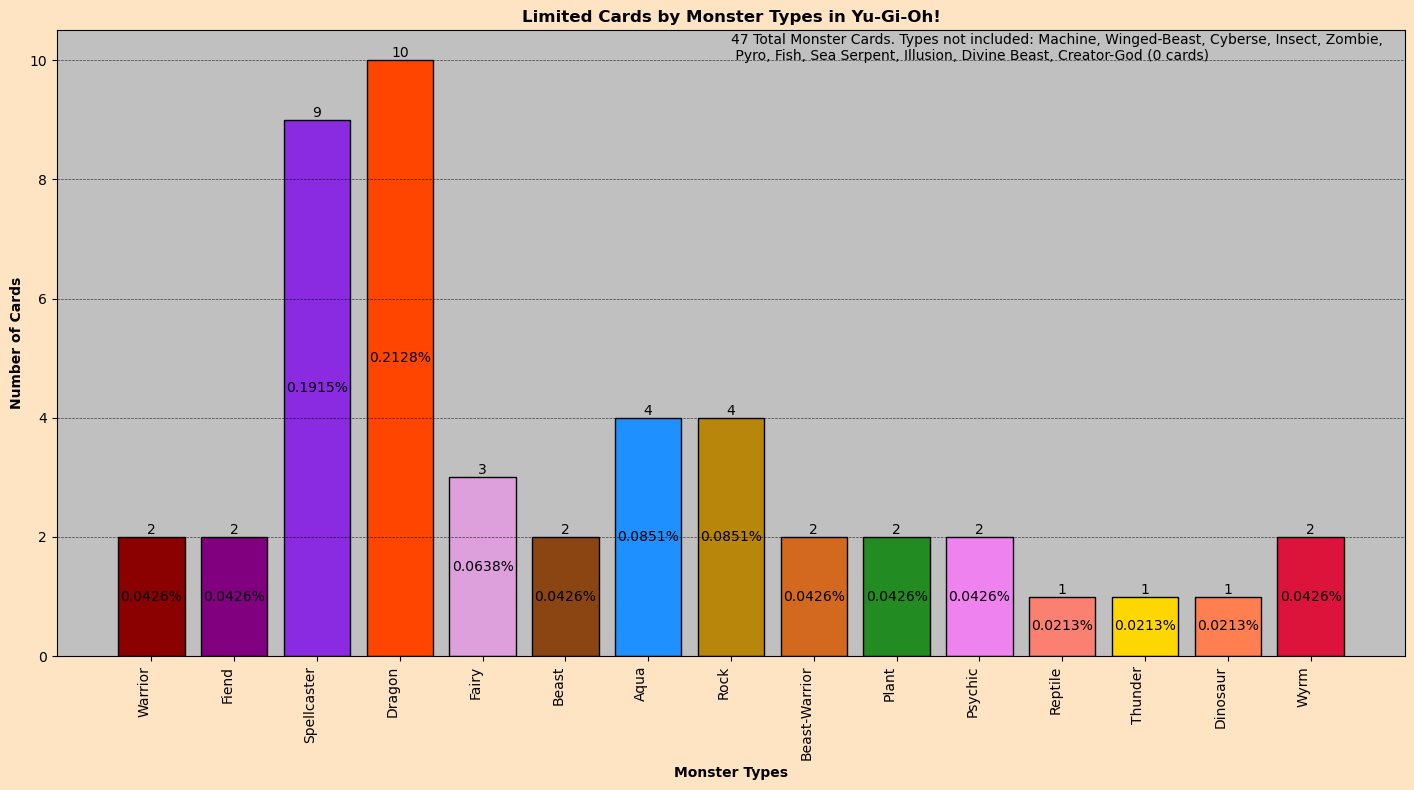

In [50]:
# Removed Machines, Winged Beast, Cyberse, Insect, Zombie, Pyro, Fish, Sea Serpent, Illusion, Divine Beast, Creator God

fig, ax = plt.subplots(figsize = (15, 8))

warrior_to_count = 'Warrior'
warrior_count = limited_tcg_ed_df['race'].value_counts()[warrior_to_count]

fiend_to_count = 'Fiend'
fiend_count = limited_tcg_ed_df['race'].value_counts()[fiend_to_count]

spellcaster_to_count = 'Spellcaster'
spellcaster_count = limited_tcg_ed_df['race'].value_counts()[spellcaster_to_count]

dragon_to_count = 'Dragon'
dragon_count = limited_tcg_ed_df['race'].value_counts()[dragon_to_count]

fairy_to_count = 'Fairy'
fairy_count = limited_tcg_ed_df['race'].value_counts()[fairy_to_count]

beast_to_count = 'Beast'
beast_count = limited_tcg_ed_df['race'].value_counts()[beast_to_count]

aqua_to_count = 'Aqua'
aqua_count = limited_tcg_ed_df['race'].value_counts()[aqua_to_count]

rock_to_count = 'Rock'
rock_count = limited_tcg_ed_df['race'].value_counts()[rock_to_count]

beastwarrior_to_count = 'Beast-Warrior'
beastwarrior_count = limited_tcg_ed_df['race'].value_counts()[beastwarrior_to_count]

plant_to_count = 'Plant'
plant_count = limited_tcg_ed_df['race'].value_counts()[plant_to_count]

psychic_to_count = 'Psychic'
psychic_count = limited_tcg_ed_df['race'].value_counts()[psychic_to_count]

reptile_to_count = 'Reptile'
reptile_count = limited_tcg_ed_df['race'].value_counts()[reptile_to_count]

thunder_to_count = 'Thunder'
thunder_count = limited_tcg_ed_df['race'].value_counts()[thunder_to_count]

dinosaur_to_count = 'Dinosaur'
dinosaur_count = limited_tcg_ed_df['race'].value_counts()[dinosaur_to_count]

wyrm_to_count = 'Wyrm'
wyrm_count = limited_tcg_ed_df['race'].value_counts()[wyrm_to_count]

monster_types_categories = ['Warrior', 'Fiend', 'Spellcaster', 'Dragon', 'Fairy', 'Beast', 'Aqua', 'Rock', 
                       'Beast-Warrior', 'Plant', 'Psychic', 'Reptile', 'Thunder', 'Dinosaur', 'Wyrm']

monster_types_values = [warrior_count, fiend_count, spellcaster_count, dragon_count, fairy_count, beast_count, aqua_count, rock_count, beastwarrior_count, plant_count, psychic_count, reptile_count, 
                        thunder_count, dinosaur_count, wyrm_count]

monster_types_colors = ['darkred', 'purple', 'blueviolet', 'orangered', 'plum', 'saddlebrown', 'dodgerblue', 
                        'darkgoldenrod', 'chocolate', 'forestgreen', 'violet', 'salmon', 'gold', 'coral', 
                        'crimson']

monsters_total = limited_tcg_ed_df['type'].count()
monster_types_percentages = [warrior_count / monsters_total, fiend_count / monsters_total, spellcaster_count / monsters_total, 
                             dragon_count / monsters_total, fairy_count / monsters_total, beast_count / monsters_total,
                             aqua_count / monsters_total, rock_count / monsters_total,
                             beastwarrior_count / monsters_total, plant_count / monsters_total, psychic_count / monsters_total,
                             reptile_count / monsters_total, thunder_count / monsters_total, 
                             dinosaur_count / monsters_total, wyrm_count / monsters_total]

monster_types_bar = plt.bar(monster_types_categories, monster_types_values, color = monster_types_colors, edgecolor = 'black')

for num in monster_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

end_forloop = 23

for i, monster_types_percentages in enumerate(monster_types_percentages):
    if i == end_forloop:
        break
    plt.text(monster_types_categories[i], monster_types_values[i] / 2, f'{monster_types_percentages:.4f}%', ha='center', va='center', color='black', rotation = 0)

ax.annotate(f"{monsters_total} Total Monster Cards. Types not included: Machine, Winged-Beast, Cyberse, Insect, Zombie, \n Pyro, Fish, Sea Serpent, Illusion, Divine Beast, Creator-God (0 cards)", xy=(7, 10), xytext=(7, 10))

monster_types_colors[0] = 'darkred'
monster_types_colors[1] = 'purple'
monster_types_colors[2] = 'blueviolet'
monster_types_colors[3] = 'orangered'
monster_types_colors[4] = 'plum'
monster_types_colors[5] = 'saddlebrown'
monster_types_colors[6] = 'dodgerblue'
monster_types_colors[7] = 'darkgoldenrod'
monster_types_colors[8] = 'chocolate'
monster_types_colors[9] = 'forestgreen'
monster_types_colors[10] = 'violet'
monster_types_colors[11] = 'salmon'
monster_types_colors[12] = 'gold'
monster_types_colors[13] = 'coral'
monster_types_colors[14] = 'crimson'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Types', weight = 'bold')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Limited Cards by Monster Types in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()


In [51]:
# Earlier I predicted that Warrior, Dragon, and Spellcasters would have the most number of cards because a lot of players consider those to be among the best
# types in the game. Looking at the status of the Limited Cards, Dragons and Spellcasters are the top 2.

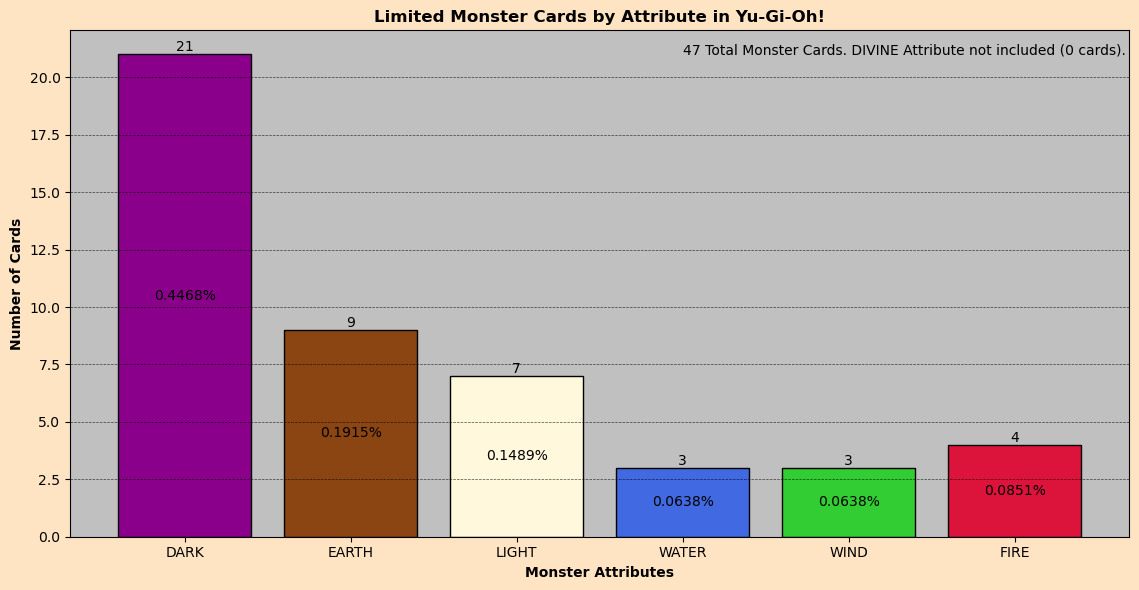

In [52]:
# Now I'm going to look at Limited Cards by Attribute.

fig, ax = plt.subplots(figsize = (12, 6))

dark_to_count = 'DARK'
dark_count = limited_tcg_ed_df['attribute'].value_counts()[dark_to_count]

earth_to_count = 'EARTH'
earth_count = limited_tcg_ed_df['attribute'].value_counts()[earth_to_count]

light_to_count = 'LIGHT'
light_count = limited_tcg_ed_df['attribute'].value_counts()[light_to_count]

water_to_count = 'WATER'
water_count = limited_tcg_ed_df['attribute'].value_counts()[water_to_count]

wind_to_count = 'WIND'
wind_count = limited_tcg_ed_df['attribute'].value_counts()[wind_to_count]

fire_to_count = 'FIRE'
fire_count = limited_tcg_ed_df['attribute'].value_counts()[fire_to_count]

monster_attribute_categories = ['DARK', 'EARTH', 'LIGHT', 'WATER', 'WIND', 'FIRE']

monster_attribute_values = [dark_count, earth_count, light_count, water_count, wind_count, fire_count]

monster_attribute_colors = ['darkmagenta', 'saddlebrown', 'cornsilk', 'royalblue', 'limegreen', 'crimson']

monster_attribute_percentages = [dark_count / monsters_total, earth_count / monsters_total, light_count / monsters_total, water_count / monsters_total, 
                             wind_count / monsters_total, fire_count / monsters_total]

monster_attributes_bar = plt.bar(monster_attribute_categories, monster_attribute_values, color = monster_attribute_colors, edgecolor = 'black')

for num in monster_attributes_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

end_forloop_one = 6

for i, monster_attribute_percentages in enumerate(monster_attribute_percentages):
        if i == end_forloop_one:
            break
        plt.text(monster_attribute_categories[i], monster_attribute_values[i] / 2, f'{monster_attribute_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{monsters_total} Total Monster Cards. DIVINE Attribute not included (0 cards).", xy=(3, 21), xytext=(3, 21))

monster_attribute_colors[0] = 'darkmagenta'
monster_attribute_colors[1] = 'saddlebrown'
monster_attribute_colors[2] = 'cornsilk'
monster_attribute_colors[3] = 'royalblue'
monster_attribute_colors[4] = 'limegreen'
monster_attribute_colors[5] = 'crimson'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Attributes', weight = 'bold')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Limited Monster Cards by Attribute in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [53]:
# Once again DARK shows that it is the best Attribute in the game with the most amount of limited cards.

In [54]:
# Moving on to the banned cards.

tcg_banned_check = 'Banned'
banned_tcg_df = banned_tcg_df[banned_tcg_df['ban_tcg'] == tcg_banned_check]

banned_tcg_df = banned_tcg_df.reset_index()

banned_tcg_df

index                                       name  \
0      170                 Agido the Ancient Sentinel   
1      521                 Appointer of the Red Lotus   
2      714                            Artifact Scythe   
3      893                           Baronne de Fleur   
4      906           Barrier Statue of the Stormwinds   
5     1190          Blackwing - Gofu the Vague Shadow   
6     1270                               Block Dragon   
7     1362                    Borreload Savage Dragon   
8     1393                          Branded Expulsion   
9     1428                           Brilliant Fusion   
10    1556                    Butterfly Dagger - Elma   
11    1631                        Card of Safe Return   
12    1759    Chaos Ruler, the Chaotic Magical Dragon   
13    1954                                  Cold Wave   
14    1990                               Confiscation   
15    2197                       Crystron Halqifibrax   
16    2228           Curious, the Lightsworn Dominion   
17    2314                                Cyber-Stein   
18    2513                                  Dandylion   
19    2794                             Delinquent Duo   
20    2973                           Dimension Fusion   
21    3092                  Djinn Releaser of Rituals   
22    3509                             Eclipse Wyvern   
23    3548                        Elder Entity Norden   
24    3767                                        Eva   
25    3987                          Fairy Tail - Snow   
26    4047                                  Fiber Jar   
27    4172                           Fishborg Blaster   
28    4838                              Giant Trunade   
29    4978                               Glow-Up Bulb   
30    5126                           Graceful Charity   
31    5255                              Grinder Golem   
32    5296                        Guardragon Agarpain   
33    5300                            Guardragon Elpy   
34    5452                                Heavy Storm   
35    5455                 Heavymetalfoes Electrumite   
36    5781                             Imperial Order   
37    5993     Isolde, Two Tales of the Noble Knights   
38    6144                           Kaiser Colosseum   
39    6197                       Kashtira Arise-Heart   
40    6215                Kelbek the Ancient Vanguard   
41    6263                          Knightmare Goblin   
42    6266                         Knightmare Mermaid   
43    6423                                  Last Turn   
44    6424                                  Last Will   
45    6454                             Lavalval Chain   
46    6519                                Level Eater   
47    6638                                   Linkross   
48    6640                                 Linkuriboh   
49    6758                          M-X-Saber Invoker   
50    6886                          Magical Scientist   
51    7144                                Mass Driver   
52    7154   Master Peace, the True Dracoslaying King   
53    7174                          Mathmech Circular   
54    7191                                   Maxx "C"   
55    7204              Mecha Phantom Beast Auroradon   
56    7404                              Metamorphosis   
57    7487                                Mind Master   
58    7534                        Mirage of Nightmare   
59    7735                                Mystic Mine   
60    8086                    Number 16: Shock Master   
61    8122                 Number 42: Galaxy Tomahawk   
62    8171  Number 86: Heroic Champion - Rhongomyniad   
63    8174       Number 89: Diablosis the Mind Hacker   
64    8181  Number 95: Galaxy-Eyes Dark Matter Dragon   
65    8220                    Number S0: Utopic ZEXAL   
66    8412                       Outer Entity Azathot   
67    8469                             Painful Choice   
68    8596                       Performage Plushfire   
69    8767     

In [55]:
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Synchro Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Effect Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Pendulum Effect Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('XYZ Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Flip Effect Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Fusion Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Tuner Monster', 'Monster Card')
banned_tcg_df['type'] = banned_tcg_df['type'].replace('Link Monster', 'Monster Card')

banned_tcg_df

index                                       name          type     atk  \
0      170                 Agido the Ancient Sentinel  Monster Card  1500.0   
1      521                 Appointer of the Red Lotus     Trap Card     NaN   
2      714                            Artifact Scythe  Monster Card  2200.0   
3      893                           Baronne de Fleur  Monster Card  3000.0   
4      906           Barrier Statue of the Stormwinds  Monster Card  1000.0   
5     1190          Blackwing - Gofu the Vague Shadow  Monster Card     0.0   
6     1270                               Block Dragon  Monster Card  2500.0   
7     1362                    Borreload Savage Dragon  Monster Card  3000.0   
8     1393                          Branded Expulsion     Trap Card     NaN   
9     1428                           Brilliant Fusion    Spell Card     NaN   
10    1556                    Butterfly Dagger - Elma    Spell Card     NaN   
11    1631                        Card of Safe Return    Spell Card     NaN   
12    1759    Chaos Ruler, the Chaotic Magical Dragon  Monster Card  3000.0   
13    1954                                  Cold Wave    Spell Card     NaN   
14    1990                               Confiscation    Spell Card     NaN   
15    2197                       Crystron Halqifibrax  Monster Card  1500.0   
16    2228           Curious, the Lightsworn Dominion  Monster Card  2400.0   
17    2314                                Cyber-Stein  Monster Card   700.0   
18    2513                                  Dandylion  Monster Card   300.0   
19    2794                             Delinquent Duo    Spell Card     NaN   
20    2973                           Dimension Fusion    Spell Card     NaN   
21    3092                  Djinn Releaser of Rituals  Monster Card  1200.0   
22    3509                             Eclipse Wyvern  Monster Card  1600.0   
23    3548                        Elder Entity Norden  Monster Card  2000.0   
24    3767                                        Eva  Monster Card   500.0   
25    3987                          Fairy Tail - Snow  Monster Card  1850.0   
26    4047                                  Fiber Jar  Monster Card   500.0   
27    4172                           Fishborg Blaster  Monster Card   100.0   
28    4838                              Giant Trunade    Spell Card     NaN   
29    4978                               Glow-Up Bulb  Monster Card   100.0   
30    5126                           Graceful Charity    Spell Card     NaN   
31    5255                              Grinder Golem  Monster Card  3000.0   
32    5296                        Guardragon Agarpain  Monster Card  1500.0   
33    5300                            Guardragon Elpy  Monster Card  1000.0   
34    5452                                Heavy Storm    Spell Card     NaN   
35    5455                 Heavymetalfoes Electrumite  Monster Card  1800.0   
36    5781                             Imperial Order     Trap Card     NaN   
37    5993     Isolde, Two Tales of the Noble Knights  Monster Card  1600.0   
38    6144                           Kaiser Colosseum    Spell Card     NaN   
39    6197                       Kashtira Arise-Heart  Monster Card  3000.0   
40    6215                Kelbek the Ancient Vanguard  Monster Card  1500.0   
41    6263                          Knightmare Goblin  Monster Card  1300.0   
42    6266                         Knightmare Mermaid  Monster Card  1000.0   
43    6423                                  Last Turn     Trap Card     NaN   
44    6424                                  Last Will    Spell Card     NaN   
45    6454                             Lavalval Chain  Monster Card  1800.0   
46    6519                                Level Eater  Monster Card   600.0   
47    6638                                   Linkross  Monster Card   900.0   
48    6640                                 Linkuriboh  Monster Card   300.0   
49    6758                          M-X-Saber Invoker  

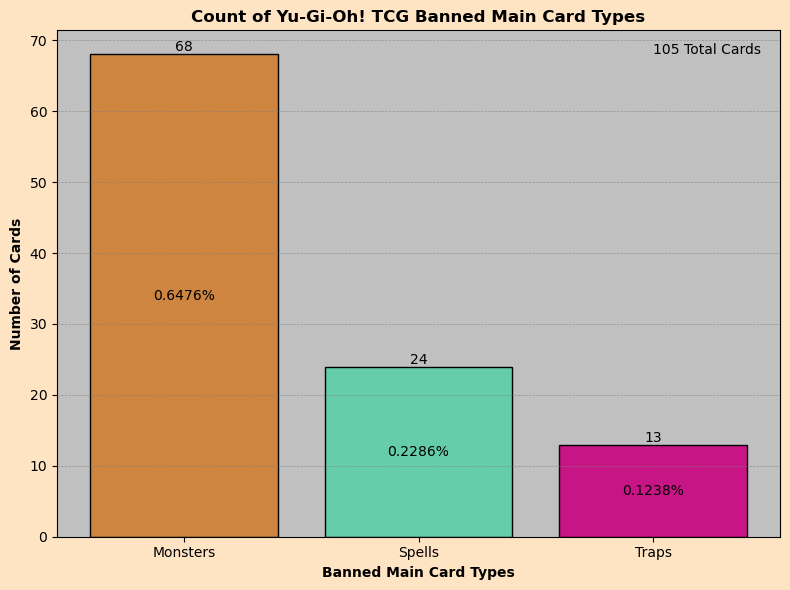

In [56]:
# Pluggingbanned Cards into a graph

fig, ax = plt.subplots(figsize = (8, 6))

banned_monsters_to_count = 'Monster Card'
banned_monsters_count = banned_tcg_df['type'].value_counts()[banned_monsters_to_count]

banned_spells_to_count = 'Spell Card'
banned_spells_count = banned_tcg_df['type'].value_counts()[banned_spells_to_count]

banned_traps_to_count = 'Trap Card'
banned_traps_count = banned_tcg_df['type'].value_counts()[banned_traps_to_count]

banned_main_types_categories = ['Monsters', 'Spells', 'Traps']
banned_main_types_values = [banned_monsters_count, banned_spells_count, banned_traps_count]
banned_main_types_colors = ['peru', 'mediumaquamarine', 'mediumvioletred']

banned_tcg_total = banned_tcg_df['type'].count()
banned_main_types_percentages = [banned_monsters_count / banned_tcg_total, banned_spells_count / banned_tcg_total, banned_traps_count / banned_tcg_total]

banned_main_types_bar = plt.bar(banned_main_types_categories, banned_main_types_values, color = banned_main_types_colors, edgecolor = 'black')

for num in banned_main_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, banned_main_types_percentages in enumerate(banned_main_types_percentages):
    plt.text(banned_main_types_categories[i], banned_main_types_values[i] / 2, f'{banned_main_types_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{banned_tcg_total} Total Cards", xy=(2, 68), xytext=(2, 68))

main_types_colors[0] = 'peru'
main_types_colors[1] = 'mediumaquamarine'
main_types_colors[2] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Banned Main Card Types', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! TCG Banned Main Card Types', weight = 'bold')
plt.grid(color='gray', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [57]:
# This graph appears very similar like to the other 2 Monster vs Spells vs Traps graphs. 

In [58]:
banned_tcg_ed_df = master_df[['name', 'type', 'atk', 'def', 'level', 'race', 'attribute', 'ban_tcg']]

banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['ban_tcg'] == tcg_banned_check]

banned_tcg_ed_df = banned_tcg_ed_df.reset_index()

banned_tcg_ed_df['type'] = banned_tcg_ed_df['type'].replace('Flip Effect Monster', 'Effect Monster')
banned_tcg_ed_df['type'] = banned_tcg_ed_df['type'].replace('Tuner Monster', 'Effect Monster')
banned_tcg_ed_df['type'] = banned_tcg_ed_df['type'].replace('Pendulum Effect Monster', 'Effect Monster')

banned_tcg_ed_df

index                                       name             type  \
0      170                 Agido the Ancient Sentinel   Effect Monster   
1      521                 Appointer of the Red Lotus        Trap Card   
2      714                            Artifact Scythe   Effect Monster   
3      893                           Baronne de Fleur  Synchro Monster   
4      906           Barrier Statue of the Stormwinds   Effect Monster   
5     1190          Blackwing - Gofu the Vague Shadow   Effect Monster   
6     1270                               Block Dragon   Effect Monster   
7     1362                    Borreload Savage Dragon  Synchro Monster   
8     1393                          Branded Expulsion        Trap Card   
9     1428                           Brilliant Fusion       Spell Card   
10    1556                    Butterfly Dagger - Elma       Spell Card   
11    1631                        Card of Safe Return       Spell Card   
12    1759    Chaos Ruler, the Chaotic Magical Dragon  Synchro Monster   
13    1954                                  Cold Wave       Spell Card   
14    1990                               Confiscation       Spell Card   
15    2197                       Crystron Halqifibrax     Link Monster   
16    2228           Curious, the Lightsworn Dominion     Link Monster   
17    2314                                Cyber-Stein   Effect Monster   
18    2513                                  Dandylion   Effect Monster   
19    2794                             Delinquent Duo       Spell Card   
20    2973                           Dimension Fusion       Spell Card   
21    3092                  Djinn Releaser of Rituals   Effect Monster   
22    3509                             Eclipse Wyvern   Effect Monster   
23    3548                        Elder Entity Norden   Fusion Monster   
24    3767                                        Eva   Effect Monster   
25    3987                          Fairy Tail - Snow   Effect Monster   
26    4047                                  Fiber Jar   Effect Monster   
27    4172                           Fishborg Blaster   Effect Monster   
28    4838                              Giant Trunade       Spell Card   
29    4978                               Glow-Up Bulb   Effect Monster   
30    5126                           Graceful Charity       Spell Card   
31    5255                              Grinder Golem   Effect Monster   
32    5296                        Guardragon Agarpain     Link Monster   
33    5300                            Guardragon Elpy     Link Monster   
34    5452                                Heavy Storm       Spell Card   
35    5455                 Heavymetalfoes Electrumite     Link Monster   
36    5781                             Imperial Order        Trap Card   
37    5993     Isolde, Two Tales of the Noble Knights     Link Monster   
38    6144                           Kaiser Colosseum       Spell Card   
39    6197                       Kashtira Arise-Heart      XYZ Monster   
40    6215                Kelbek the Ancient Vanguard   Effect Monster   
41    6263                          Knightmare Goblin     Link Monster   
42    6266                         Knightmare Mermaid     Link Monster   
43    6423                                  Last Turn        Trap Card   
44    6424                                  Last Will       Spell Card   
45    6454                             Lavalval Chain      XYZ Monster   
46    6519                                Level Eater   Effect Monster   
47    6638                                   Linkross     Link Monster   
48    6640                                 Linkuriboh     Link Monster   
49    6758                          M-X-Saber Invoker      XYZ Monster   
50    6886                          Magical Scientist   Effect Monster   
51    7144                                Mass Driver       Spell Card   
52    7154   Master Peace, the True Dracoslaying King   Effect Monster   
53    717

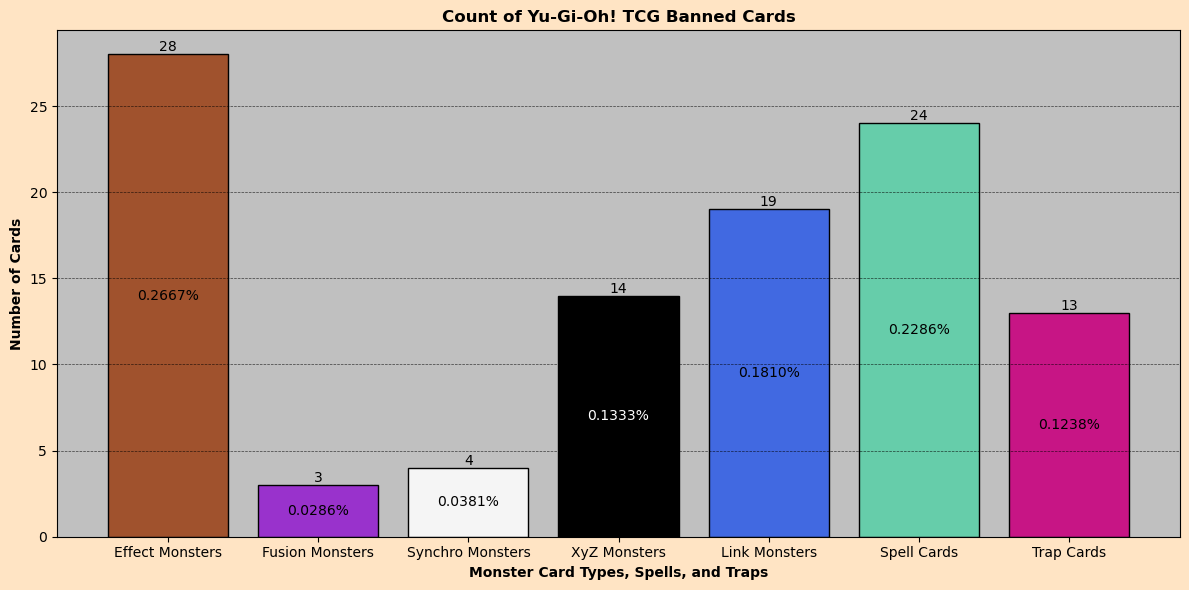

In [59]:
# Creating graph for Banned TCG cards.

fig, ax = plt.subplots(figsize = (12, 6))

effect_to_count = 'Effect Monster'
effect_count = banned_tcg_ed_df['type'].value_counts()[effect_to_count]

xyz_to_count = 'XYZ Monster'
xyz_count = banned_tcg_ed_df['type'].value_counts()[xyz_to_count]

fusion_to_count = 'Fusion Monster'
fusion_count = banned_tcg_ed_df['type'].value_counts()[fusion_to_count]

synchro_to_count = 'Synchro Monster'
synchro_count = banned_tcg_ed_df['type'].value_counts()[synchro_to_count]

link_to_count = 'Link Monster'
link_count = banned_tcg_ed_df['type'].value_counts()[link_to_count]

banned_spells_to_count = 'Spell Card'
banned_spells_count = banned_tcg_df['type'].value_counts()[banned_spells_to_count]

banned_traps_to_count = 'Trap Card'
banned_traps_count = banned_tcg_df['type'].value_counts()[banned_traps_to_count]

monsters_categories = ['Effect Monsters', 'Fusion Monsters', 'Synchro Monsters', 'XyZ Monsters', 'Link Monsters', 'Spell Cards', 'Trap Cards']
monsters_values = [effect_count, fusion_count, synchro_count, xyz_count, link_count, banned_spells_count, banned_traps_count]
monsters_colors = ['sienna', 'darkorchid', 'whitesmoke', 'black', 'royalblue', 'mediumaquamarine', 'mediumvioletred']

monsters_total = banned_tcg_ed_df['type'].count()
monsters_percentages = [effect_count / monsters_total, fusion_count / monsters_total, synchro_count / monsters_total, xyz_count / monsters_total, link_count / monsters_total, 
                        banned_spells_count / monsters_total, banned_traps_count / monsters_total]

monsters_bar = plt.bar(monsters_categories, monsters_values, color = monsters_colors, edgecolor = 'black')

for num in monsters_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, monsters_percentages in enumerate(monsters_percentages):
    plt.text(monsters_categories[i], monsters_values[i] / 2, f'{monsters_percentages:.4f}%', ha='center', va='center', color='black')

plt.text(monsters_categories[3], monsters_values[3] / 2, f'{0.1333}%', ha='center', va='center', color='white')

ax.annotate(f"{monsters_total} Total Cards. Ritual Monsters not included (0 cards)", xy=(1, 30.1), xytext=(1, 30.1))

monsters_colors[0] = 'sienna'
monsters_colors[1] = 'darkorchid'
monsters_colors[2] = 'whitesmoke'
monsters_colors[3] = 'black'
monsters_colors[4] = 'royalblue'
monsters_colors[5] = 'mediumaquamarine'
monsters_colors[6] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Card Types, Spells, and Traps', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! TCG Banned Cards', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [60]:
banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['race'] != continuous_spell_trap_remove]
banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['race'] != normal_spell_trap_remove]
banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['race'] != field_spell_remove]
banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['race'] != equip_spell_trap_remove]
banned_tcg_ed_df = banned_tcg_ed_df[banned_tcg_ed_df['race'] != counter_trap_remove]

banned_tcg_ed_df

index                                       name             type  \
0      170                 Agido the Ancient Sentinel   Effect Monster   
2      714                            Artifact Scythe   Effect Monster   
3      893                           Baronne de Fleur  Synchro Monster   
4      906           Barrier Statue of the Stormwinds   Effect Monster   
5     1190          Blackwing - Gofu the Vague Shadow   Effect Monster   
6     1270                               Block Dragon   Effect Monster   
7     1362                    Borreload Savage Dragon  Synchro Monster   
12    1759    Chaos Ruler, the Chaotic Magical Dragon  Synchro Monster   
15    2197                       Crystron Halqifibrax     Link Monster   
16    2228           Curious, the Lightsworn Dominion     Link Monster   
17    2314                                Cyber-Stein   Effect Monster   
18    2513                                  Dandylion   Effect Monster   
21    3092                  Djinn Releaser of Rituals   Effect Monster   
22    3509                             Eclipse Wyvern   Effect Monster   
23    3548                        Elder Entity Norden   Fusion Monster   
24    3767                                        Eva   Effect Monster   
25    3987                          Fairy Tail - Snow   Effect Monster   
26    4047                                  Fiber Jar   Effect Monster   
27    4172                           Fishborg Blaster   Effect Monster   
29    4978                               Glow-Up Bulb   Effect Monster   
31    5255                              Grinder Golem   Effect Monster   
32    5296                        Guardragon Agarpain     Link Monster   
33    5300                            Guardragon Elpy     Link Monster   
35    5455                 Heavymetalfoes Electrumite     Link Monster   
37    5993     Isolde, Two Tales of the Noble Knights     Link Monster   
39    6197                       Kashtira Arise-Heart      XYZ Monster   
40    6215                Kelbek the Ancient Vanguard   Effect Monster   
41    6263                          Knightmare Goblin     Link Monster   
42    6266                         Knightmare Mermaid     Link Monster   
45    6454                             Lavalval Chain      XYZ Monster   
46    6519                                Level Eater   Effect Monster   
47    6638                                   Linkross     Link Monster   
48    6640                                 Linkuriboh     Link Monster   
49    6758                          M-X-Saber Invoker      XYZ Monster   
50    6886                          Magical Scientist   Effect Monster   
52    7154   Master Peace, the True Dracoslaying King   Effect Monster   
53    7174                          Mathmech Circular   Effect Monster   
54    7191                                   Maxx "C"   Effect Monster   
55    7204              Mecha Phantom Beast Auroradon     Link Monster   
57    7487                                Mind Master   Effect Monster   
60    8086                    Number 16: Shock Master      XYZ Monster   
61    8122                 Number 42: Galaxy Tomahawk      XYZ Monster   
62    8171  Number 86: Heroic Champion - Rhongomyniad      XYZ Monster   
63    8174       Number 89: Diablosis the Mind Hacker      XYZ Monster   
64    8181  Number 95: Galaxy-Eyes Dark Matter Dragon      XYZ Monster   
65    8220                    Number S0: Utopic ZEXAL      XYZ Monster   
66    8412                       Outer Entity Azathot      XYZ Monster   
68    8596                       Performage Plushfire   Effect Monster   
69    8767               Phoenixian Cluster Amaryllis   Effect Monster   
71    8929                    Prank-Kids Meow-Meow-Mu     Link Monster   
72    8966                  Predaplant Verte Anaconda     Link Monster   
76    9717                                Ronintoadin   Effect Monster   
78    9825                         SPYRAL Master Plan   Effect Monster   
80   1035

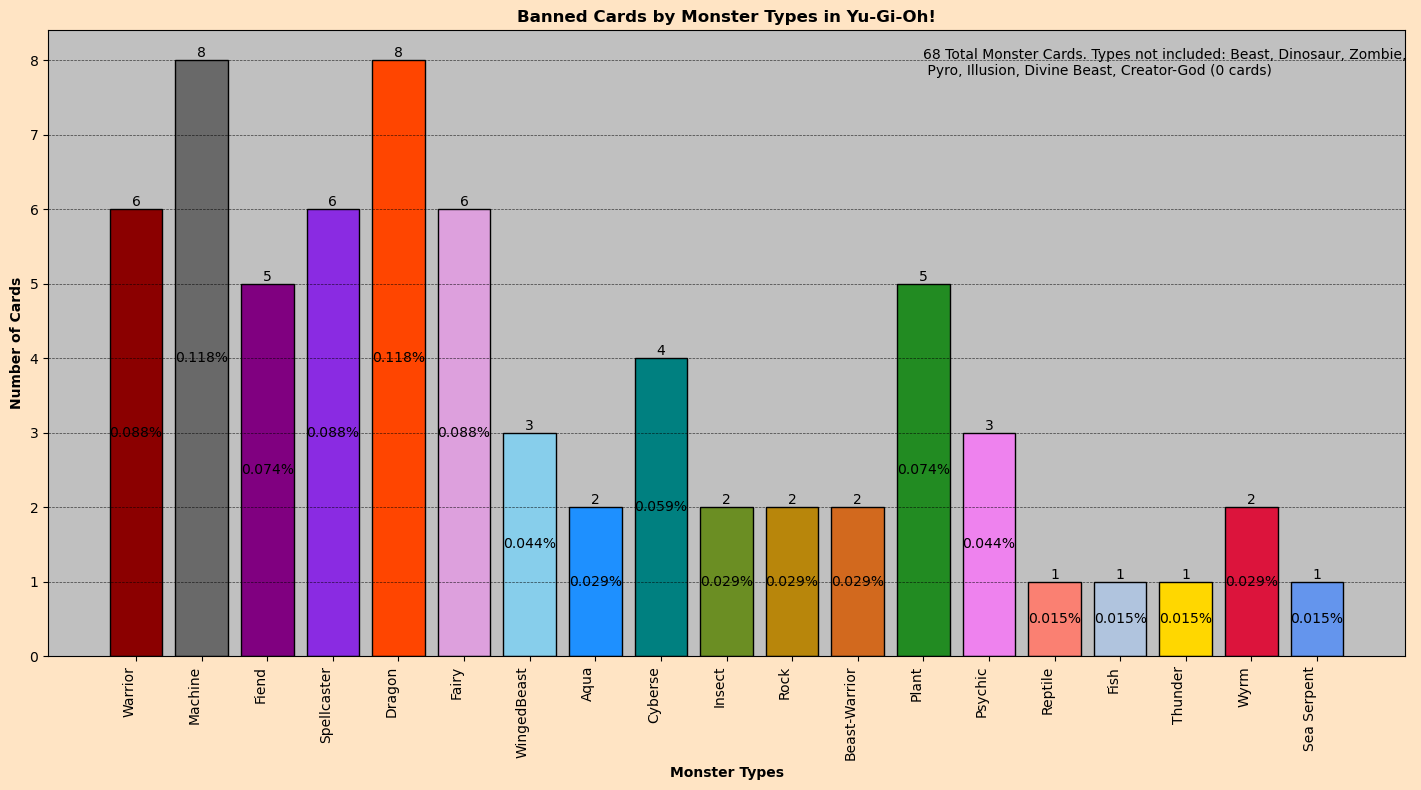

In [61]:
# Removed Beast, Dinosaur, Zombie, Pyro, Illusion, Divine Beast, Creator God
fig, ax = plt.subplots(figsize = (15, 8))

warrior_to_count = 'Warrior'
warrior_count = banned_tcg_ed_df['race'].value_counts()[warrior_to_count]

machine_to_count = 'Machine'
machine_count = banned_tcg_ed_df['race'].value_counts()[machine_to_count]

fiend_to_count = 'Fiend'
fiend_count = banned_tcg_ed_df['race'].value_counts()[fiend_to_count]

spellcaster_to_count = 'Spellcaster'
spellcaster_count = banned_tcg_ed_df['race'].value_counts()[spellcaster_to_count]

dragon_to_count = 'Dragon'
dragon_count = banned_tcg_ed_df['race'].value_counts()[dragon_to_count]

fairy_to_count = 'Fairy'
fairy_count = banned_tcg_ed_df['race'].value_counts()[fairy_to_count]

wingedbeast_to_count = 'Winged Beast'
wingedbeast_count = banned_tcg_ed_df['race'].value_counts()[wingedbeast_to_count]

aqua_to_count = 'Aqua'
aqua_count = banned_tcg_ed_df['race'].value_counts()[aqua_to_count]

cyberse_to_count = 'Cyberse'
cyberse_count = banned_tcg_ed_df['race'].value_counts()[cyberse_to_count]

insect_to_count = 'Insect'
insect_count = banned_tcg_ed_df['race'].value_counts()[insect_to_count]

rock_to_count = 'Rock'
rock_count = banned_tcg_ed_df['race'].value_counts()[rock_to_count]

beastwarrior_to_count = 'Beast-Warrior'
beastwarrior_count = banned_tcg_ed_df['race'].value_counts()[beastwarrior_to_count]

plant_to_count = 'Plant'
plant_count = banned_tcg_ed_df['race'].value_counts()[plant_to_count]

psychic_to_count = 'Psychic'
psychic_count = banned_tcg_ed_df['race'].value_counts()[psychic_to_count]

fish_to_count = 'Fish'
fish_count = banned_tcg_ed_df['race'].value_counts()[fish_to_count]

reptile_to_count = 'Reptile'
reptile_count = banned_tcg_ed_df['race'].value_counts()[reptile_to_count]

thunder_to_count = 'Thunder'
thunder_count = banned_tcg_ed_df['race'].value_counts()[thunder_to_count]

wyrm_to_count = 'Wyrm'
wyrm_count = banned_tcg_ed_df['race'].value_counts()[wyrm_to_count]

seaserpent_to_count = 'Sea Serpent'
seaserpent_count = banned_tcg_ed_df['race'].value_counts()[seaserpent_to_count]

monster_types_categories = ['Warrior', 'Machine', 'Fiend', 'Spellcaster', 'Dragon', 'Fairy', 'WingedBeast', 'Aqua', 'Cyberse', 'Insect', 'Rock',
                       'Beast-Warrior', 'Plant', 'Psychic', 'Reptile', 'Fish', 'Thunder', 'Wyrm', 'Sea Serpent']

monster_types_values = [warrior_count, machine_count, fiend_count, spellcaster_count, dragon_count, fairy_count, wingedbeast_count, aqua_count, 
                        cyberse_count, insect_count, rock_count, beastwarrior_count, plant_count, psychic_count, reptile_count, fish_count, thunder_count, 
                        wyrm_count, seaserpent_count]

monster_types_colors = ['darkred', 'dimgrey', 'purple', 'blueviolet', 'orangered', 'plum', 'skyblue', 'dodgerblue', 'teal', 'olivedrab',
                        'darkgoldenrod', 'chocolate', 'forestgreen', 'violet', 'salmon', 'lightsteelblue', 'gold', 'crimson', 'cornflowerblue']

monsters_total = banned_tcg_ed_df['race'].count()
monster_types_percentages = [warrior_count / monsters_total, machine_count / monsters_total, fiend_count / monsters_total, spellcaster_count / monsters_total, 
                             dragon_count / monsters_total, fairy_count / monsters_total, wingedbeast_count / monsters_total,
                             aqua_count / monsters_total, cyberse_count / monsters_total, insect_count / monsters_total, rock_count / monsters_total,
                             beastwarrior_count / monsters_total, plant_count / monsters_total, psychic_count / monsters_total,
                             reptile_count / monsters_total, fish_count / monsters_total, thunder_count / monsters_total, 
                             wyrm_count / monsters_total, seaserpent_count / monsters_total]

monster_types_bar = plt.bar(monster_types_categories, monster_types_values, color = monster_types_colors, edgecolor = 'black')

for num in monster_types_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

for i, monster_types_percentages in enumerate(monster_types_percentages):
    plt.text(monster_types_categories[i], monster_types_values[i] / 2, f'{monster_types_percentages:.3f}%', ha='center', va='center', color='black', rotation = 0)

ax.annotate(f"{monsters_total} Total Monster Cards. Types not included: Beast, Dinosaur, Zombie, \n Pyro, Illusion, Divine Beast, Creator-God (0 cards)", xy=(12, 7.8), xytext=(12, 7.8))

monster_types_colors[0] = 'darkred'
monster_types_colors[1] = 'dimgrey'
monster_types_colors[2] = 'purple'
monster_types_colors[3] = 'blueviolet'
monster_types_colors[4] = 'orangered'
monster_types_colors[5] = 'plum'
monster_types_colors[6] = 'skyblue'
monster_types_colors[7] = 'dodgerblue'
monster_types_colors[8] = 'teal'
monster_types_colors[9] = 'olivedrab'
monster_types_colors[10] = 'darkgoldenrod'
monster_types_colors[11] = 'chocolate'
monster_types_colors[12] = 'forestgreen'
monster_types_colors[13] = 'violet'
monster_types_colors[14] = 'salmon'
monster_types_colors[15] = 'lightsteelblue'
monster_types_colors[16] = 'gold'
monster_types_colors[17] = 'crimson'
monster_types_colors[18] = 'cornflowerblue'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Types', weight = 'bold')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Banned Cards by Monster Types in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

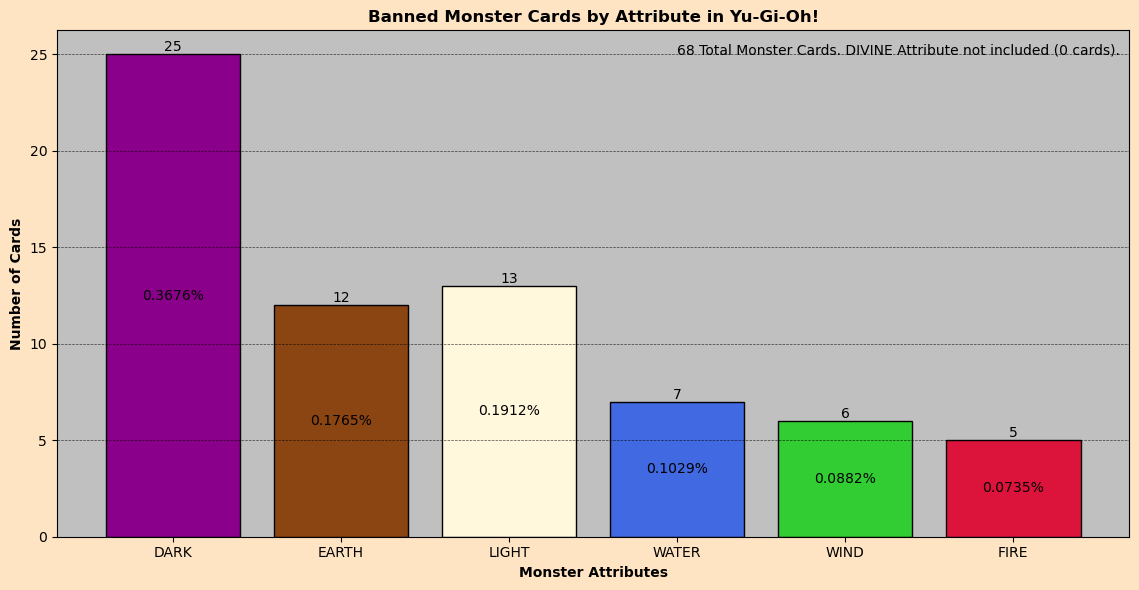

In [62]:
# Now I'm going to look at Banned Cards by Attribute.

fig, ax = plt.subplots(figsize = (12, 6))

dark_to_count = 'DARK'
dark_count = banned_tcg_ed_df['attribute'].value_counts()[dark_to_count]

earth_to_count = 'EARTH'
earth_count = banned_tcg_ed_df['attribute'].value_counts()[earth_to_count]

light_to_count = 'LIGHT'
light_count = banned_tcg_ed_df['attribute'].value_counts()[light_to_count]

water_to_count = 'WATER'
water_count = banned_tcg_ed_df['attribute'].value_counts()[water_to_count]

wind_to_count = 'WIND'
wind_count = banned_tcg_ed_df['attribute'].value_counts()[wind_to_count]

fire_to_count = 'FIRE'
fire_count = banned_tcg_ed_df['attribute'].value_counts()[fire_to_count]

monster_attribute_categories = ['DARK', 'EARTH', 'LIGHT', 'WATER', 'WIND', 'FIRE']

monster_attribute_values = [dark_count, earth_count, light_count, water_count, wind_count, fire_count]

monster_attribute_colors = ['darkmagenta', 'saddlebrown', 'cornsilk', 'royalblue', 'limegreen', 'crimson']

monster_attribute_percentages = [dark_count / monsters_total, earth_count / monsters_total, light_count / monsters_total, water_count / monsters_total, 
                             wind_count / monsters_total, fire_count / monsters_total]

monster_attributes_bar = plt.bar(monster_attribute_categories, monster_attribute_values, color = monster_attribute_colors, edgecolor = 'black')

for num in monster_attributes_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

end_forloop_one = 6

for i, monster_attribute_percentages in enumerate(monster_attribute_percentages):
        if i == end_forloop_one:
            break
        plt.text(monster_attribute_categories[i], monster_attribute_values[i] / 2, f'{monster_attribute_percentages:.4f}%', ha='center', va='center', color='black')

ax.annotate(f"{monsters_total} Total Monster Cards. DIVINE Attribute not included (0 cards).", xy=(3, 25), xytext=(3, 25))

monster_attribute_colors[0] = 'darkmagenta'
monster_attribute_colors[1] = 'saddlebrown'
monster_attribute_colors[2] = 'cornsilk'
monster_attribute_colors[3] = 'royalblue'
monster_attribute_colors[4] = 'limegreen'
monster_attribute_colors[5] = 'crimson'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Attributes', weight = 'bold')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Banned Monster Cards by Attribute in Yu-Gi-Oh!', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [63]:
# Creating a graph to show relationship between Attribute and Type.

type_attribute_groupby = master_df[['race', 'attribute']]
type_attribute_groupby = type_attribute_groupby.dropna()

type_attribute_groupby = type_attribute_groupby.reset_index()
type_attribute_groupby

index           race attribute
0         9          Beast     EARTH
1        10           Aqua     WATER
2        11         Insect      WIND
3        13           Fish     WATER
4        15         Insect      DARK
5        16          Beast      DARK
6        24    Spellcaster      DARK
7        29        Machine     LIGHT
8        30        Machine      FIRE
9        32        Machine     LIGHT
10       42        Warrior     LIGHT
11       43        Machine     LIGHT
12       45          Fiend      FIRE
13       46  Beast-Warrior     EARTH
14       48          Fiend      DARK
15       50        Warrior     EARTH
16       52       Dinosaur     EARTH
17       53          Fiend      DARK
18       56           Rock     EARTH
19       57          Fairy     LIGHT
20       58         Dragon      DARK
21       59          Fiend      DARK
22       60          Fiend      DARK
23       61          Fiend      DARK
24       62          Fiend      DARK
25       63          Fiend      DARK
26       64          Fiend      DARK
27       65          Fiend      DARK
28       66          Fiend      DARK
29       67          Fiend      DARK
30       68          Fiend      DARK
31       69          Fiend      DARK
32       70          Fiend      DARK
33       71          Fiend      DARK
34       72          Fiend      DARK
35       73          Fiend      DARK
36       77    Sea Serpent     WATER
37       78          Plant     EARTH
38       79           Fish     WATER
39       89           Fish     WATER
40       90           Aqua     WATER
41       92           Aqua     WATER
42      102           Fish     WATER
43      103           Aqua     WATER
44      104         Dragon      WIND
45      105        Machine      DARK
46      107        Cyberse      DARK
47      109        Warrior     LIGHT
48      110        Warrior      FIRE
49      111        Warrior      FIRE
50      112        Cyberse      FIRE
51      113         Insect     EARTH
52      117          Plant     EARTH
53      118        Machine     EARTH
54      119    Spellcaster      DARK
55      122          Fairy      DARK
56      123           Rock     EARTH
57      124           Rock     WATER
58      125           Rock      FIRE
59      126           Rock      WIND
60      130           Rock     EARTH
61      132           Rock     WATER
62      133           Rock      FIRE
63      134           Rock      WIND
64      135           Rock     EARTH
65      139        Machine      WIND
66      140          Fiend      DARK
67      141    Spellcaster     WATER
68      145          Beast     EARTH
69      146          Beast     EARTH
70      147   Winged Beast      WIND
71      148           Aqua     WATER
72      149          Fairy     LIGHT
73      150          Beast      WIND
74      151          Beast     EARTH
75      155        Machine     WATER
76      158          Fiend      WIND
77      160          Fairy      WIND
78      161         Dragon     LIGHT
79      162         Dragon      DARK
80      167           Wyrm     EARTH
81      169          Fairy     EARTH
82      170          Fairy     EARTH
83      171           Pyro      FIRE
84      172          Fiend      DARK
85      173        Machine      WIND
86      174        Warrior      WIND
87      176          Fiend      WIND
88      177          Fairy     LIGHT
89      178    Sea Serpent      WIND
90      179          Fairy      FIRE
91      180          Fiend      WIND
92      181         Dragon      FIRE
93      182    Spellcaster      DARK
94      183    Spellcaster      DARK
95      184           Aqua     WATER
96      185  Beast-Warrior     EARTH
97      186           Wyrm      WIND
98      187         Dragon      DARK
99      188         Dragon      DARK
100     189         Dragon      DARK
101     190         Dragon     LIGHT
102     191         Dragon      DARK
103     192    Spellcaster      DARK
104     193    Spellcaster      WIND
105     195   Winged Beast      WIND
106     196        Reptile      DARK
107     19

In [64]:
type_attribute_groupby = type_attribute_groupby.value_counts()

In [65]:
grouped_df = type_attribute_groupby.groupby(['race', 'attribute']).sum()
grouped_df

race           attribute
Aqua           DARK          10
               EARTH          7
               FIRE          11
               LIGHT          7
               WATER        231
               WIND           7
Beast          DARK          38
               EARTH        220
               FIRE          18
               LIGHT         74
               WATER         15
               WIND          27
Beast-Warrior  DARK          39
               EARTH         84
               FIRE          56
               LIGHT         34
               WATER         17
               WIND          16
Creator-God    DIVINE         1
Cyberse        DARK          75
               EARTH         36
               FIRE          52
               LIGHT         62
               WATER         29
               WIND          13
Dinosaur       DARK          13
               EARTH         65
               FIRE          36
               LIGHT          5
               WATER          9
               

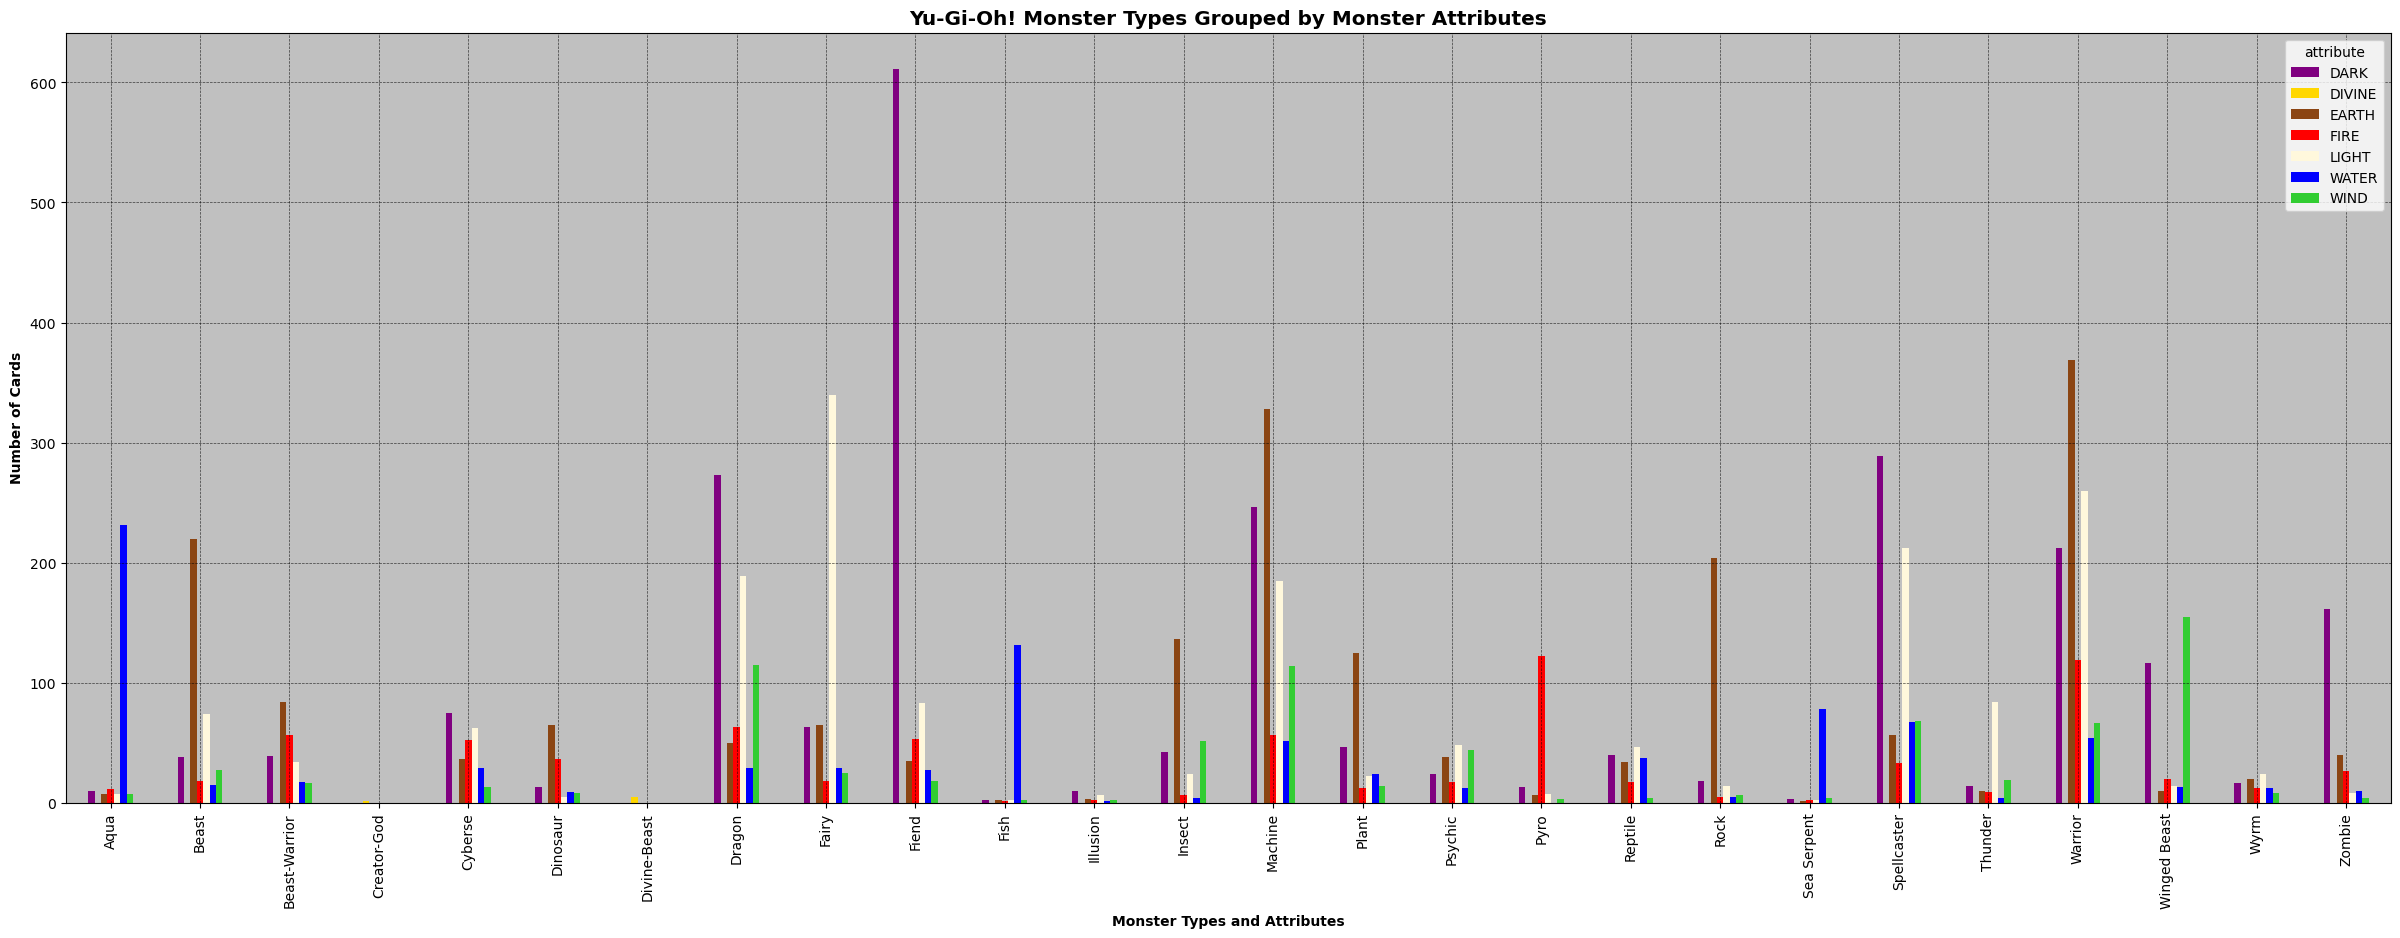

In [66]:
#fig, ax = plt.subplots(figsize = (30, 10))

#colors = {'WATER': 'blue', 'FIRE': 'red', 'DARK': 'purple', 'EARTH': 'saddlebrown', 'LIGHT': 'cornsilk', 'WIND': 'limegreen', 'DIVINE': 'gold'}
#colors = ['blue', 'red', 'purple', 'saddlebrown', 'cornsilk', 'limegreen', 'gold']
#grouped_df.plot(kind='bar', color = colors)

grouped = grouped_df.groupby(['race', 'attribute']).sum().unstack()

colors = {'WATER': 'blue', 'FIRE': 'red', 'DARK': 'purple', 'EARTH': 'saddlebrown', 'LIGHT': 'cornsilk', 'WIND': 'limegreen', 'DIVINE': 'gold'}

ax = grouped.plot(kind='bar', color=[colors[col] for col in grouped.columns], rot=0, figsize = (30, 10))
ax.set_facecolor('silver')
plt.rcParams.update({'font.size': 12})
plt.title('Yu-Gi-Oh! Monster Types Grouped by Monster Attributes', weight = 'bold')
plt.xlabel('Monster Types and Attributes', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.ylabel('Number of Cards', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=.5, axis='both', alpha=0.7)
plt.show()

In [67]:
# Looking at staples next. I want to see what kind of card is the most likely to be a staple.

staples_df = master_df[['name', 'atk', 'def', 'type', 'race', 'level', 'attribute', 'ban_tcg', 'views', 'viewsweek', 'upvotes', 'downvotes', 'staple']]

staple_check = 'Yes'

staples_df = staples_df[staples_df['staple'] == staple_check]

staples_df

name     atk     def            type  \
107                        Accesscode Talker  2300.0     NaN    Link Monster   
493                     Anti-Spell Fragrance     NaN     NaN       Trap Card   
501            Apollousa, Bow of the Goddess     0.0     NaN    Link Monster   
723              Ash Blossom & Joyous Spring     0.0  1800.0   Tuner Monster   
1359                        Borreload Dragon  3000.0     NaN    Link Monster   
1364                      Borrelsword Dragon  3000.0     NaN    Link Monster   
1600                     Called by the Grave     NaN     NaN      Spell Card   
2065                          Cosmic Cyclone     NaN     NaN      Spell Card   
2134                     Crossout Designator     NaN     NaN      Spell Card   
2197                    Crystron Halqifibrax  1500.0     NaN    Link Monster   
2601                               Dark Hole     NaN     NaN      Spell Card   
2649                      Dark Ruler No More     NaN     NaN      Spell Card   
2980                       Dimension Shifter  1200.0  2200.0  Effect Monster   
2987                     Dimensional Barrier     NaN     NaN       Trap Card   
3039                 Dinowrestler Pankratops  2600.0     0.0  Effect Monster   
3381                       Droll & Lock Bird     0.0     0.0  Effect Monster   
3525                           Effect Veiler     0.0     0.0   Tuner Monster   
3770                          Evenly Matched     NaN     NaN       Trap Card   
3812                Evilswarm Exciton Knight  1900.0     0.0     XYZ Monster   
4019           Fantastical Dragon Phantazmay  2400.0  1800.0  Effect Monster   
4306                          Foolish Burial     NaN     NaN      Spell Card   
4316                       Forbidden Droplet     NaN     NaN      Spell Card   
4576          Gameciel, the Sea Turtle Kaiju  2200.0  3000.0  Effect Monster   
4761           Ghost Belle & Haunted Mansion     0.0  1800.0   Tuner Monster   
4773                Ghost Ogre & Snow Rabbit     0.0  1800.0   Tuner Monster   
5203                      Gravity Controller  1000.0     NaN    Link Monster   
5403                 Harpie's Feather Duster     NaN     NaN      Spell Card   
5537                           Hey, Trunade!     NaN     NaN      Spell Card   
5694                          I:P Masquerena   800.0     NaN    Link Monster   
5781                          Imperial Order     NaN     NaN       Trap Card   
5876                   Infinite Impermanence     NaN     NaN       Trap Card   
5913                          Instant Fusion     NaN     NaN      Spell Card   
6261                     Knightmare Cerberus  1600.0     NaN    Link Monster   
6267                      Knightmare Phoenix  1900.0     NaN    Link Monster   
6268                      Knightmare Unicorn  2200.0     NaN    Link Monster   
6584                         Lightning Storm     NaN     NaN      Spell Card   
6919                        Magicians' Souls     0.0     0.0  Effect Monster   
7052                   Mana Dragon Zirnitron  2200.0  1200.0  Effect Monster   
7264            Mekk-Knight Crusadia Avramax  3000.0     NaN    Link Monster   
7483                            Mind Control     NaN     NaN      Spell Card   
7610                          Monster Reborn     NaN     NaN      Spell Card   
7735                             Mystic Mine     NaN     NaN      Spell Card   
7953                Nibiru, the Primal Being  3000.0   600.0  Effect Monster   
8459                     PSY-Framegear Gamma  1000.0     0.0   Tuner Monster   
8878                          Pot of Desires     NaN     NaN      Spell Card   
8881                     Pot of Extravagance     NaN     NaN      Spell Card   
8966               Predaplant Verte Anaconda   500.0     NaN    Link Monster   
9281                                 Raigeki     NaN     NaN      Spell Card   
9423                              Red Reboot     NaN     NaN       Trap Card   
9446                   Red-Eyes Dark Dra

In [68]:
staples_df['type'] = staples_df['type'].replace('Tuner Monster', 'Effect Monster')

staples_df

name     atk     def            type  \
107                        Accesscode Talker  2300.0     NaN    Link Monster   
493                     Anti-Spell Fragrance     NaN     NaN       Trap Card   
501            Apollousa, Bow of the Goddess     0.0     NaN    Link Monster   
723              Ash Blossom & Joyous Spring     0.0  1800.0  Effect Monster   
1359                        Borreload Dragon  3000.0     NaN    Link Monster   
1364                      Borrelsword Dragon  3000.0     NaN    Link Monster   
1600                     Called by the Grave     NaN     NaN      Spell Card   
2065                          Cosmic Cyclone     NaN     NaN      Spell Card   
2134                     Crossout Designator     NaN     NaN      Spell Card   
2197                    Crystron Halqifibrax  1500.0     NaN    Link Monster   
2601                               Dark Hole     NaN     NaN      Spell Card   
2649                      Dark Ruler No More     NaN     NaN      Spell Card   
2980                       Dimension Shifter  1200.0  2200.0  Effect Monster   
2987                     Dimensional Barrier     NaN     NaN       Trap Card   
3039                 Dinowrestler Pankratops  2600.0     0.0  Effect Monster   
3381                       Droll & Lock Bird     0.0     0.0  Effect Monster   
3525                           Effect Veiler     0.0     0.0  Effect Monster   
3770                          Evenly Matched     NaN     NaN       Trap Card   
3812                Evilswarm Exciton Knight  1900.0     0.0     XYZ Monster   
4019           Fantastical Dragon Phantazmay  2400.0  1800.0  Effect Monster   
4306                          Foolish Burial     NaN     NaN      Spell Card   
4316                       Forbidden Droplet     NaN     NaN      Spell Card   
4576          Gameciel, the Sea Turtle Kaiju  2200.0  3000.0  Effect Monster   
4761           Ghost Belle & Haunted Mansion     0.0  1800.0  Effect Monster   
4773                Ghost Ogre & Snow Rabbit     0.0  1800.0  Effect Monster   
5203                      Gravity Controller  1000.0     NaN    Link Monster   
5403                 Harpie's Feather Duster     NaN     NaN      Spell Card   
5537                           Hey, Trunade!     NaN     NaN      Spell Card   
5694                          I:P Masquerena   800.0     NaN    Link Monster   
5781                          Imperial Order     NaN     NaN       Trap Card   
5876                   Infinite Impermanence     NaN     NaN       Trap Card   
5913                          Instant Fusion     NaN     NaN      Spell Card   
6261                     Knightmare Cerberus  1600.0     NaN    Link Monster   
6267                      Knightmare Phoenix  1900.0     NaN    Link Monster   
6268                      Knightmare Unicorn  2200.0     NaN    Link Monster   
6584                         Lightning Storm     NaN     NaN      Spell Card   
6919                        Magicians' Souls     0.0     0.0  Effect Monster   
7052                   Mana Dragon Zirnitron  2200.0  1200.0  Effect Monster   
7264            Mekk-Knight Crusadia Avramax  3000.0     NaN    Link Monster   
7483                            Mind Control     NaN     NaN      Spell Card   
7610                          Monster Reborn     NaN     NaN      Spell Card   
7735                             Mystic Mine     NaN     NaN      Spell Card   
7953                Nibiru, the Primal Being  3000.0   600.0  Effect Monster   
8459                     PSY-Framegear Gamma  1000.0     0.0  Effect Monster   
8878                          Pot of Desires     NaN     NaN      Spell Card   
8881                     Pot of Extravagance     NaN     NaN      Spell Card   
8966               Predaplant Verte Anaconda   500.0     NaN    Link Monster   
9281                                 Raigeki     NaN     NaN      Spell Card   
9423                              Red Reboot     NaN     NaN       Trap Card   
9446                   Red-Eyes Dark Dra

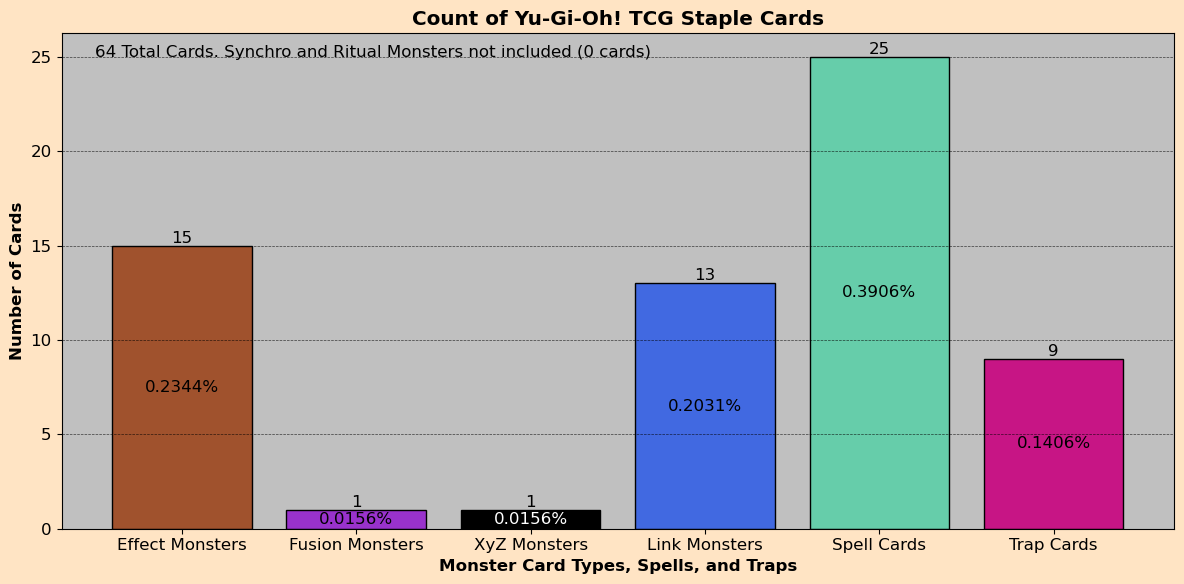

In [69]:
fig, ax = plt.subplots(figsize = (12, 6))

effect_to_count = 'Effect Monster'
effect_count = staples_df['type'].value_counts()[effect_to_count]

xyz_to_count = 'XYZ Monster'
xyz_count = staples_df['type'].value_counts()[xyz_to_count]

fusion_to_count = 'Fusion Monster'
fusion_count = staples_df['type'].value_counts()[fusion_to_count]

#synchro_to_count = 'Synchro Monster'
#synchro_count = staples_df['type'].value_counts()[synchro_to_count]

link_to_count = 'Link Monster'
link_count = staples_df['type'].value_counts()[link_to_count]

spells_to_count = 'Spell Card'
spells_count = staples_df['type'].value_counts()[spells_to_count]

traps_to_count = 'Trap Card'
traps_count = staples_df['type'].value_counts()[traps_to_count]

monsters_categories = ['Effect Monsters', 'Fusion Monsters', 'XyZ Monsters', 'Link Monsters', 'Spell Cards', 'Trap Cards']
monsters_values = [effect_count, fusion_count, xyz_count, link_count, spells_count, traps_count]
monsters_colors = ['sienna', 'darkorchid', 'black', 'royalblue', 'mediumaquamarine', 'mediumvioletred']

monsters_total = staples_df['type'].count()
monsters_percentages = [effect_count / monsters_total, fusion_count / monsters_total, xyz_count / monsters_total, link_count / monsters_total, 
                        spells_count / monsters_total, traps_count / monsters_total]

monsters_bar = plt.bar(monsters_categories, monsters_values, color = monsters_colors, edgecolor = 'black')

for num in monsters_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

#end_forloop_one = 5

for i, monsters_percentages in enumerate(monsters_percentages):
#    if i == end_forloop_one:
#        break
    plt.text(monsters_categories[i], monsters_values[i] / 2, f'{monsters_percentages:.4f}%', ha='center', va='center', color='black')

plt.text(monsters_categories[2], monsters_values[2] / 2, f'{0.0156}%', ha='center', va='center', color='white')
#plt.text(monsters_categories[5], monsters_values[5] / 2, f'{0.2857}%', ha='center', va='center', color='black')
#plt.text(monsters_categories[6], monsters_values[6] / 2, f'{0.0667}%', ha='center', va='center', color='black')

ax.annotate(f"{monsters_total} Total Cards. Synchro and Ritual Monsters not included (0 cards)", xy=(-0.5, 25), xytext=(-0.5, 25))

monsters_colors[0] = 'sienna'
monsters_colors[1] = 'darkorchid'
monsters_colors[2] = 'black'
monsters_colors[3] = 'royalblue'
monsters_colors[4] = 'mediumaquamarine'
monsters_colors[5] = 'mediumvioletred'
fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Monster Card Types, Spells, and Traps', weight = 'bold')
plt.ylabel('Number of Cards', weight = 'bold')
plt.title('Count of Yu-Gi-Oh! TCG Staple Cards', weight = 'bold')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [70]:
# Creating a new dataframe for card name, views, viewsweek, upvotes, downvotes

views_df = master_df[['name', 'views', 'viewsweek', 'upvotes', 'downvotes', 'ban_tcg', 'staple']]

views_df.head(10)

name   views  viewsweek  upvotes  downvotes  \
0        "A" Cell Breeding Device  300590          0      118        110   
1              "A" Cell Incubator  212234          0       25         20   
2   "A" Cell Recombination Device  221212          0       19         15   
3          "A" Cell Scatter Burst  168545         26       12          4   
4      "Infernoble Arms - Almace"   52664         26        0          0   
5    "Infernoble Arms - Durendal"  463408          0       10         12   
6  "Infernoble Arms - Hauteclere"   78530          0        3          4   
7     "Infernoble Arms - Joyeuse"  110962          0        3          5   
8               1st Movement Solo  286248         26       14          5   
9                  3-Hump Lacooda  184895          0       23         10   

  ban_tcg staple  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN  
5     NaN    NaN  
6     NaN    NaN  
7     NaN    NaN  
8     NaN    NaN  
9     NaN    NaN

In [71]:
top_10_views = views_df.sort_values(by='views', ascending=False)
top_10_views.head(10)


name     views  viewsweek  upvotes  downvotes  \
723    Ash Blossom & Joyous Spring  14246561        338      214         69   
5876         Infinite Impermanence  10051448        338       69         20   
1600           Called by the Grave   8344377        104       60         14   
3525                 Effect Veiler   5618325        208       47         13   
7610                Monster Reborn   4675444         52      254         41   
7953      Nibiru, the Primal Being   4524690        130       51         18   
11437                 Terraforming   4502945         26       49          9   
8878                Pot of Desires   4119041         26       55         24   
2622                 Dark Magician   3920482         26       16          4   
6267            Knightmare Phoenix   3840555         52       33          7   

       ban_tcg staple  
723        NaN    Yes  
5876       NaN    Yes  
1600   Limited    Yes  
3525       NaN    Yes  
7610   Limited    Yes  
7953       NaN    Yes  
11437  Limited    Yes  
8878       NaN    Yes  
2622       NaN    NaN  
6267       NaN    Yes

In [72]:
top_10_views = top_10_views.head(10)

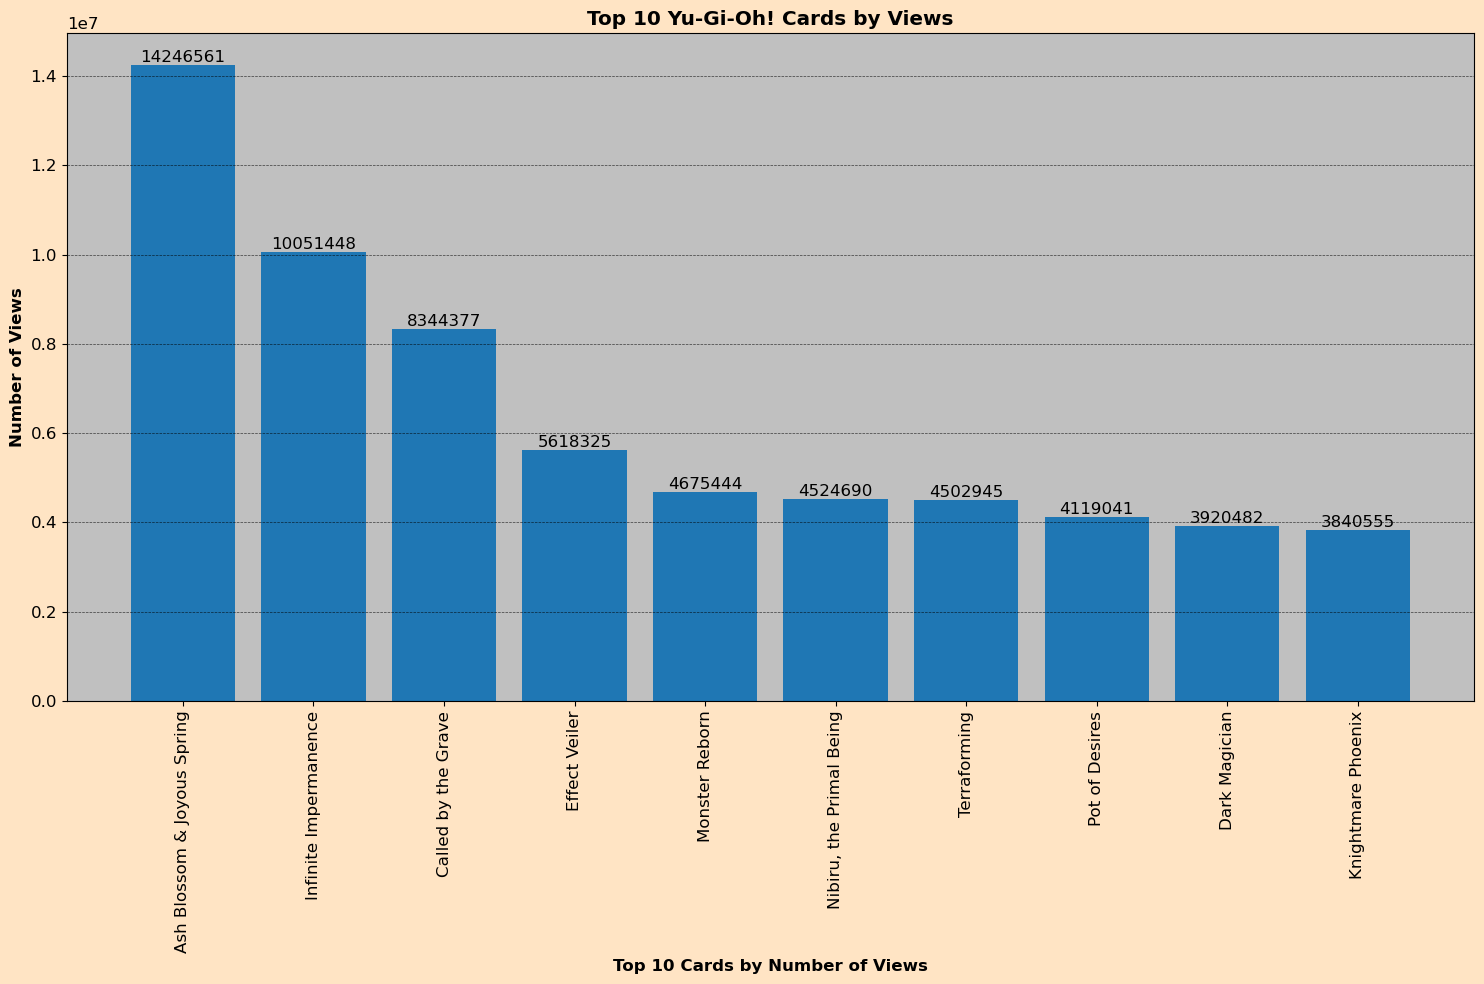

In [73]:
# Plotting the top 10 cards by views on a graph.

fig, ax = plt.subplots(figsize = (15, 10))

x = top_10_views['name']
y = top_10_views['views']


top_10_views_bar = plt.bar(x, y)

for num in top_10_views_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Top 10 Cards by Number of Views', weight = 'bold')
plt.ylabel('Number of Views', weight = 'bold')
plt.title('Top 10 Yu-Gi-Oh! Cards by Views', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [74]:
# Plotting Bottom 10 Cards by Views

bottom_10_views = views_df.sort_values(by='views', ascending=True)
bottom_10_views.head(10)

name  views  viewsweek  upvotes  \
10456       Slapdash Summer Schoolwork Success      0          0        0   
12556                            Virtue Stream      0          0        0   
2253                              Cutter Shark      0          0        0   
13078                      Xyz Poseidon Splash      0          0        0   
11948              Transient Titan of Tartarus     26          0        0   
11165                         Surface Aqua Jet     52          0        0   
11849                           Token Alliance     52          0        0   
9481                   Reincarnate Unveil Mail     78          0        0   
6531                           Levirtue Dragon    104          0        0   
9762   Rubisapphirus the Jewel of Maximum Mohs    104          0        0   

       downvotes ban_tcg staple  
10456          0     NaN    NaN  
12556          0     NaN    NaN  
2253           0     NaN    NaN  
13078          0     NaN    NaN  
11948          0     NaN    NaN  
11165          0     NaN    NaN  
11849          0     NaN    NaN  
9481           0     NaN    NaN  
6531           0     NaN    NaN  
9762           0     NaN    NaN

In [75]:
bottom_10_views = bottom_10_views.head(10)

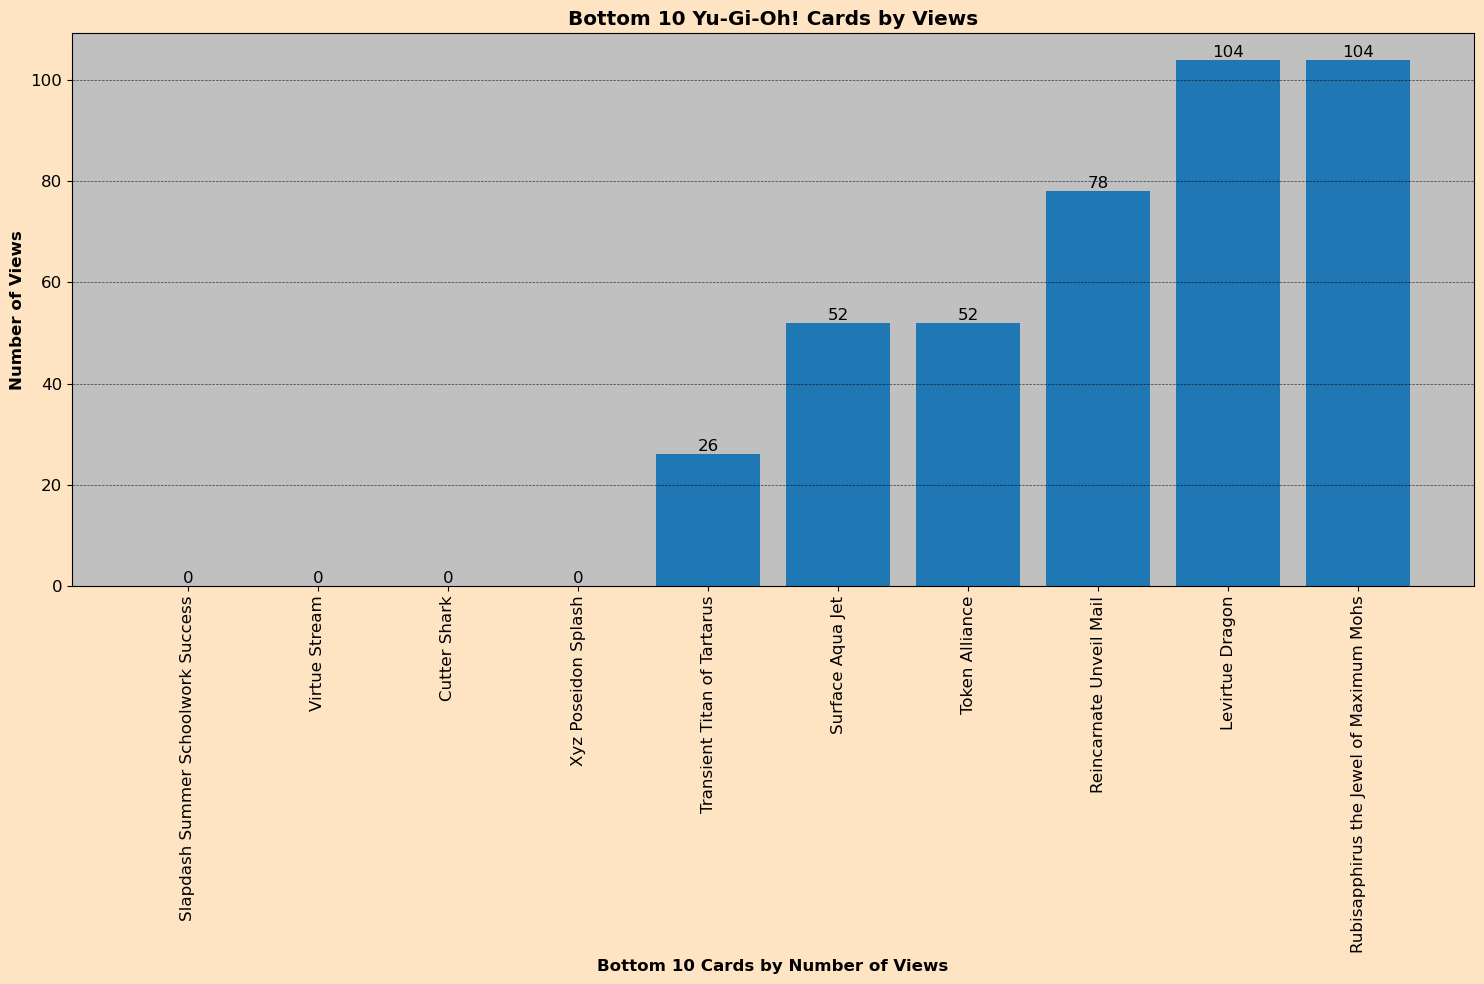

In [76]:

fig, ax = plt.subplots(figsize = (15, 10))

x = bottom_10_views['name']
y = bottom_10_views['views']


bottom_10_views_bar = plt.bar(x, y)

for num in bottom_10_views_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Bottom 10 Cards by Number of Views', weight = 'bold')
plt.ylabel('Number of Views', weight = 'bold')
plt.title('Bottom 10 Yu-Gi-Oh! Cards by Views', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [77]:
# All of these cards are actually new cards to the game coming out in the latter half of 2024. I think this shows that even if a card is "bad", people 
# still view that cards page. 

In [78]:
# Taking a look at the Top 30 Cards by Views per Week.

top_10_viewsweek = views_df.sort_values(by='viewsweek', ascending=False)
top_10_viewsweek.head(30)

name     views  viewsweek  upvotes  \
723              Ash Blossom & Joyous Spring  14246561        338      214   
5876                   Infinite Impermanence  10051448        338       69   
3525                           Effect Veiler   5618325        208       47   
11985           Traptrix Trap Hole Nightmare    264148        136        6   
12086                  Triple Tactics Talent   2954892        130       28   
3381                       Droll & Lock Bird   2842240        130       21   
7953                Nibiru, the Primal Being   4524690        130       51   
236                 Ally of Justice Catastor    224113        105       14   
9812                       S:P Little Knight   1020422        104        0   
4069                     Fiendsmith Engraver    163061        104        0   
6036                                   Jinzo    476321        104      123   
11047                   Super Polymerization   3469450        104       60   
4316                       Forbidden Droplet   3013238        104       19   
1600                     Called by the Grave   8344377        104       60   
10231                          Shining Angel    448492         79        9   
6838                             Magic Drain    234838         78        6   
2919      Diabell, Queen of the White Forest     66785         78        0   
3975                               Fairy Box    259061         78        1   
4773                Ghost Ogre & Snow Rabbit   2937998         78       34   
3770                          Evenly Matched   3086029         78       40   
5694                          I:P Masquerena   1964392         78       28   
12891              Witch of the Black Forest    748281         78       21   
7191                                Maxx "C"   2274869         78       40   
2980                       Dimension Shifter   1416468         78        8   
501            Apollousa, Bow of the Goddess   2644315         78       62   
11074  Super Starslayer TY-PHON - Sky Crisis    819562         78        0   
10387                            Skill Drain   1452398         78       73   
8884                       Pot of Prosperity   3254944         78       20   
5403                 Harpie's Feather Duster   2001616         78       51   
107                        Accesscode Talker   3243271         78       67   

       downvotes  ban_tcg staple  
723           69      NaN    Yes  
5876          20      NaN    Yes  
3525          13      NaN    Yes  
11985          1      NaN    NaN  
12086          5      NaN    Yes  
3381           3      NaN    Yes  
7953          18      NaN    Yes  
236            1      NaN    NaN  
9812           0      NaN    NaN  
4069           0      NaN    NaN  
6036          32      NaN    NaN  
11047         12      NaN    Yes  
4316           5      NaN    Yes  
1600          14  Limited    Yes  
10231          2      NaN    NaN  
6838           3      NaN    NaN  
2919           0      NaN    NaN  
3975           1      NaN    NaN  
4773          16      NaN    Yes  
3770          18      NaN    Yes  
5694           2      NaN    Yes  
12891          3      NaN    NaN  
7191          31   Banned    NaN  
2980           2      NaN    Yes  
501            7      NaN    Yes  
11074          0      NaN    NaN  
10387         26      NaN    NaN  
8884           4      NaN    NaN  
5403           9  Limited    Yes  
107            6      NaN    Yes

In [79]:
top_10_viewsweek = top_10_viewsweek.head(30)

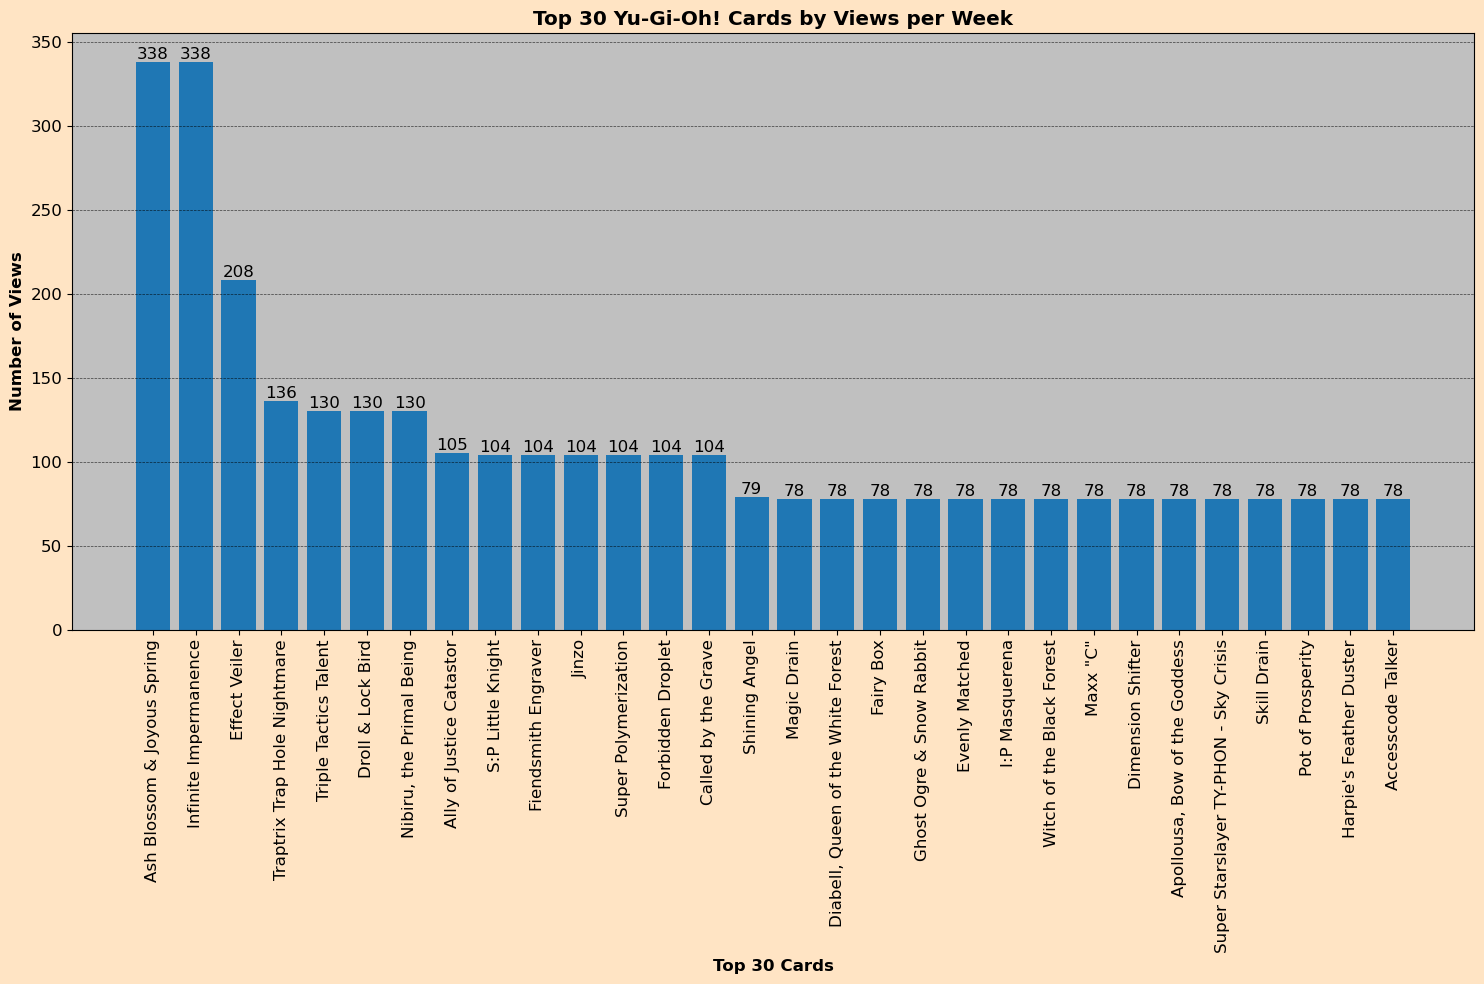

In [80]:
fig, ax = plt.subplots(figsize = (15, 10))

x = top_10_viewsweek['name']
y = top_10_viewsweek['viewsweek']


top_10_viewsweek_bar = plt.bar(x, y)

for num in top_10_viewsweek_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Top 30 Cards', weight = 'bold')
plt.ylabel('Number of Views', weight = 'bold')
plt.title('Top 30 Yu-Gi-Oh! Cards by Views per Week', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [81]:
# Looking at the Bottom 30 cards for viewsweek resulted in ~120000 cards all with 0 views. Once I adjusted by removing all 0 views and getting anything above
# 0 it still gave me hundreds of cards with 26 views per week, so I ended up scrapping this graph.

In [82]:
# Looking at Top 30 cards by Upvotes.

top_10_upvotes = views_df.sort_values(by='upvotes', ascending=False)
top_10_upvotes.head(20)

name    views  viewsweek  \
1128                                Black Luster Soldier   230535          0   
3248                                Dragon Master Knight   176747          0   
1129       Black Luster Soldier - Envoy of the Beginning  1022193         52   
1134                Black Luster Soldier - Super Soldier   324199          0   
1130   Black Luster Soldier - Envoy of the Evening Tw...   118470          0   
10461                              Slifer the Sky Dragon   529465          0   
9281                                             Raigeki  2141637         26   
10478                                        Smile World    21479          0   
1309                              Blue-Eyes White Dragon  2974079         52   
1745             Chaos Emperor Dragon - Envoy of the End   395858         52   
10320                                   Silent Swordsman   125950          0   
2637                                        Dark Paladin   554460          0   
3585                         Elemental HERO Burstinatrix   263734          0   
1299                          Blue-Eyes Chaos MAX Dragon   991129          0   
2039                                 Contrast HERO Chaos    97162          0   
9446                               Red-Eyes Dark Dragoon  2041305         52   
7610                                      Monster Reborn  4675444         52   
3627                          Elemental HERO Plasma Vice    90688          0   
11696                            The Winged Dragon of Ra   572239          0   
1301                            Blue-Eyes Shining Dragon   124013          0   

       upvotes  downvotes  ban_tcg staple  
1128      2608         11      NaN    NaN  
3248      1533          9      NaN    NaN  
1129      1507         16      NaN    NaN  
1134      1269          5      NaN    NaN  
1130      1129          7      NaN    NaN  
10461      682         64      NaN    NaN  
9281       558         10      NaN    Yes  
10478      468        125      NaN    NaN  
1309       423        154      NaN    NaN  
1745       362          8      NaN    NaN  
10320      333          7      NaN    NaN  
2637       308         11      NaN    NaN  
3585       279          3      NaN    NaN  
1299       279         30      NaN    NaN  
2039       266          2      NaN    NaN  
9446       263        103      NaN    Yes  
7610       254         41  Limited    Yes  
3627       251          1      NaN    NaN  
11696      236         35      NaN    NaN  
1301       217          7      NaN    NaN

In [83]:
top_10_upvotes = top_10_upvotes.head(30)

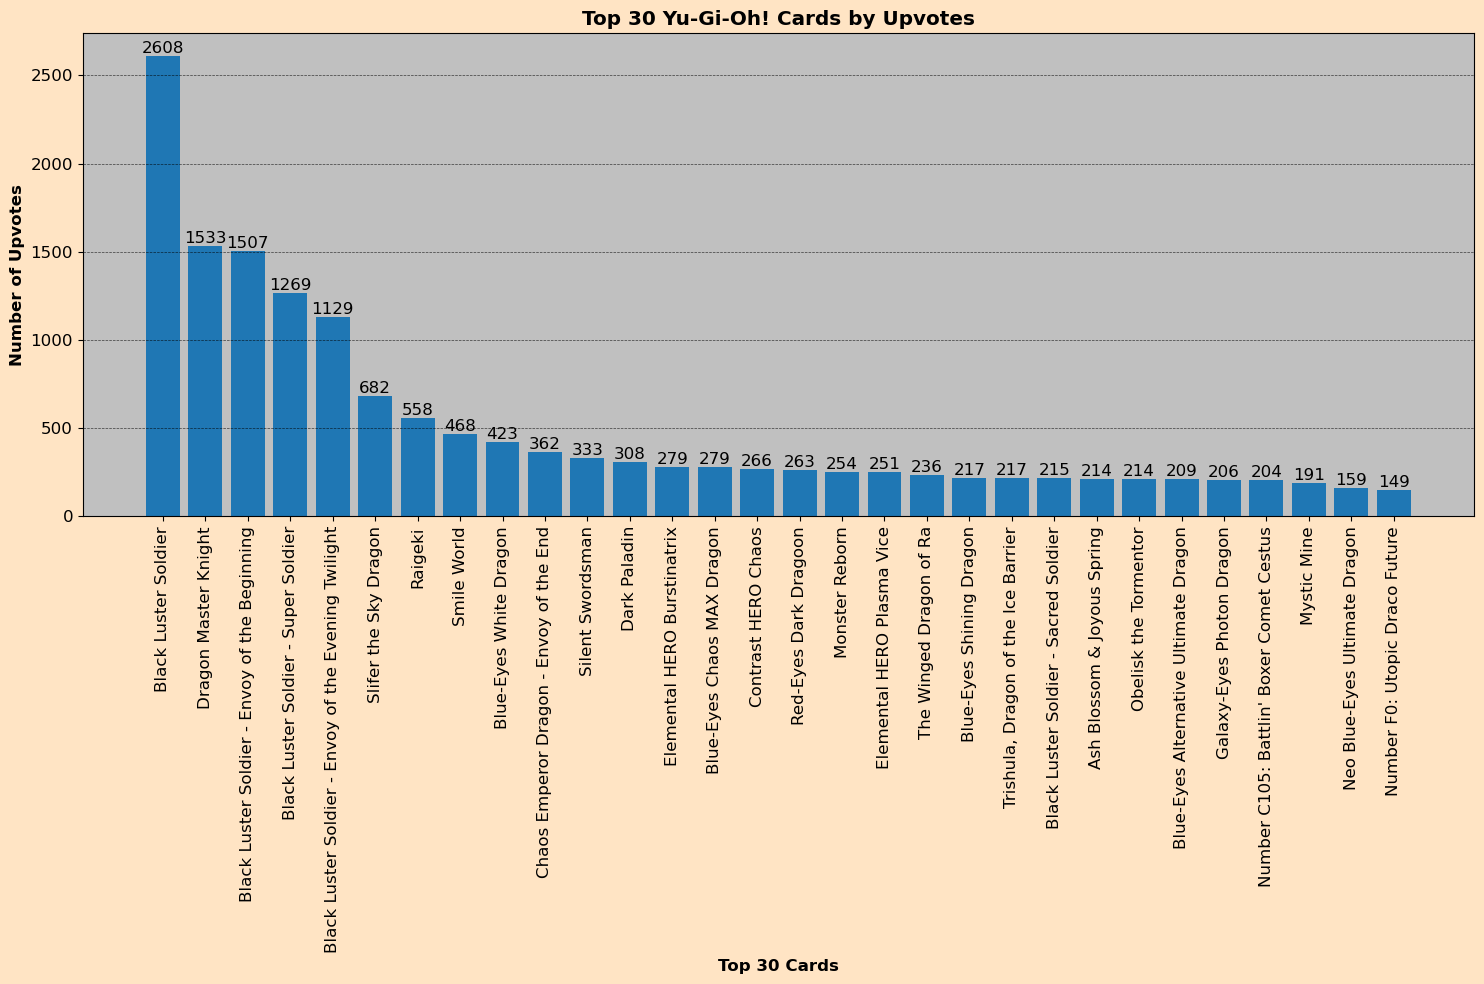

In [84]:
fig, ax = plt.subplots(figsize = (15, 10))

x = top_10_upvotes['name']
y = top_10_upvotes['upvotes']


top_10_upvotes_bar = plt.bar(x, y)

for num in top_10_upvotes_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Top 30 Cards', weight = 'bold')
plt.ylabel('Number of Upvotes', weight = 'bold')
plt.title('Top 30 Yu-Gi-Oh! Cards by Upvotes', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [85]:
# Looking at Top 30 Card for Downvotes now.

top_30_downvotes = views_df.sort_values(by='downvotes', ascending=False)
top_30_downvotes.head(30)

name     views  viewsweek  upvotes  \
5781                             Imperial Order    831477          0       45   
12107               True King of All Calamities    796723          0       39   
1309                     Blue-Eyes White Dragon   2974079         52      423   
1606                             Cannon Soldier    221905          0        8   
10478                               Smile World     21479          0      468   
6881                      Magical Musketeer Max     97532         26       29   
7735                                Mystic Mine   1748046          0      191   
0                      "A" Cell Breeding Device    300590          0      118   
2197                       Crystron Halqifibrax   2557468         26      139   
11815                               Time Wizard    244574         26      129   
7154   Master Peace, the True Dracoslaying King     90675         26       28   
9446                      Red-Eyes Dark Dragoon   2041305         52      263   
493                        Anti-Spell Fragrance    871383         26       40   
8220                    Number S0: Utopic ZEXAL    264929          0       45   
6668                               Loge's Flame     28839          0       11   
723                 Ash Blossom & Joyous Spring  14246561        338      214   
10461                     Slifer the Sky Dragon    529465          0      682   
13267                           Zoodiac Ratpier    176275          0       32   
7790                                        NEX     34236          0        7   
2987                        Dimensional Barrier   1138283         26       32   
2623                         Dark Magician Girl    859821         26      141   
7610                             Monster Reborn   4675444         52      254   
3885                   Exodia the Forbidden One    609258         26      134   
8249                      Obelisk the Tormentor    510005          0      214   
32                  A-to-Z-Dragon Buster Cannon    175196          0       57   
5602              Holactie the Creator of Light    251564         26       76   
11696                   The Winged Dragon of Ra    572239          0      236   
2266                               Cyber Dragon   1080549         26      102   
3064       Divine Arsenal AA-ZEUS - Sky Thunder   3413092         52       61   
6036                                      Jinzo    476321        104      123   

       downvotes  ban_tcg staple  
5781         533   Banned    Yes  
12107        196   Banned    NaN  
1309         154      NaN    NaN  
1606         144      NaN    NaN  
10478        125      NaN    NaN  
6881         111      NaN    NaN  
7735         111   Banned    Yes  
0            110      NaN    NaN  
2197         109   Banned    Yes  
11815        108      NaN    NaN  
7154         107   Banned    NaN  
9446         103      NaN    Yes  
493           92  Limited    Yes  
8220          86   Banned    NaN  
6668          71      NaN    NaN  
723           69      NaN    Yes  
10461         64      NaN    NaN  
13267         61  Limited    NaN  
7790          61      NaN    NaN  
2987          59      NaN    Yes  
2623          46      NaN    NaN  
7610          41  Limited    Yes  
3885          39  Limited    NaN  
8249          39      NaN    NaN  
32            36      NaN    NaN  
5602          35      NaN    NaN  
11696         35      NaN    NaN  
2266          34      NaN    NaN  
3064          32      NaN    NaN  
6036          32      NaN    NaN

In [86]:
top_30_downvotes = top_30_downvotes.head(30)

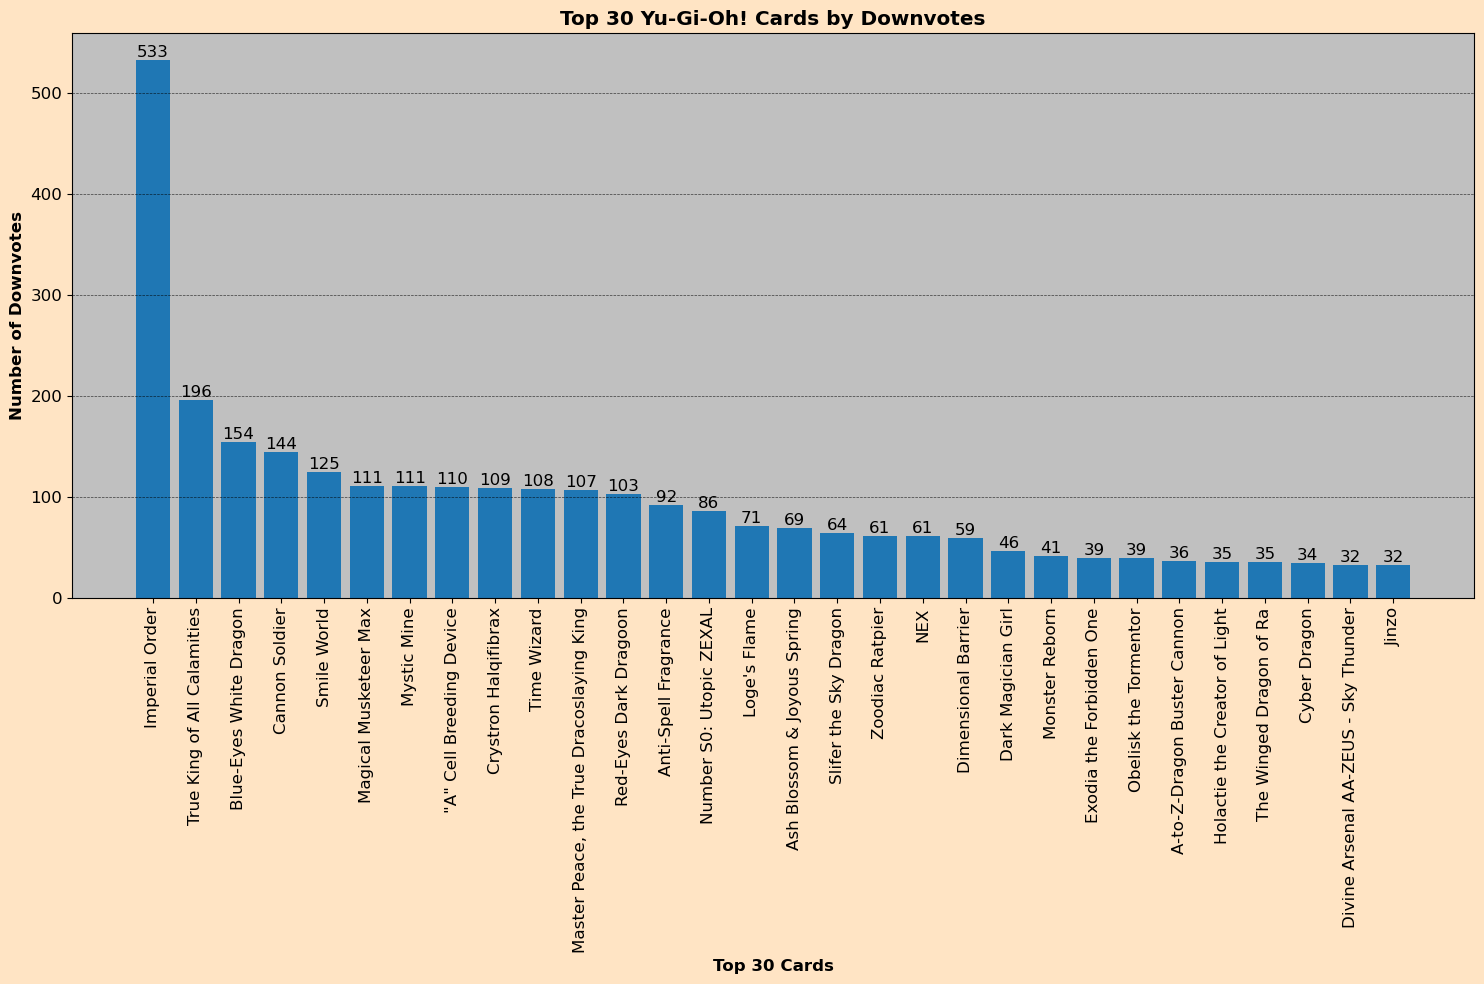

In [87]:
fig, ax = plt.subplots(figsize = (15, 10))

x = top_30_downvotes['name']
y = top_30_downvotes['downvotes']


top_30_upvotes_bar = plt.bar(x, y)

for num in top_30_upvotes_bar:
    height = num.get_height()
    plt.text(num.get_x() + num.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')

fig.set_facecolor('bisque')
ax.set_facecolor('silver') 
plt.xlabel('Top 30 Cards', weight = 'bold')
plt.ylabel('Number of Downvotes', weight = 'bold')
plt.title('Top 30 Yu-Gi-Oh! Cards by Downvotes', weight = 'bold')
plt.xticks(rotation=90, ha='center')
plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)
plt.tight_layout()

In [88]:
#Creating a heat map to see correlations

views_df['ban_tcg'] = views_df['ban_tcg'].fillna(3)
views_df['staple'] = views_df['staple'].fillna(0)
views_df['staple'] = views_df['staple'].replace('Yes', 1)
views_df['ban_tcg'] = views_df['ban_tcg'].replace('Semi-Limited', 2)
views_df['ban_tcg'] = views_df['ban_tcg'].replace('Limited', 1)
views_df['ban_tcg'] = views_df['ban_tcg'].replace('Banned', 0)

views_df.head(5)

C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\3600451514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views_df['ban_tcg'] = views_df['ban_tcg'].fillna(3)
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\3600451514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views_df['staple'] = views_df['staple'].fillna(0)
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\3600451514.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

name   views  viewsweek  upvotes  downvotes  \
0       "A" Cell Breeding Device  300590          0      118        110   
1             "A" Cell Incubator  212234          0       25         20   
2  "A" Cell Recombination Device  221212          0       19         15   
3         "A" Cell Scatter Burst  168545         26       12          4   
4     "Infernoble Arms - Almace"   52664         26        0          0   

   ban_tcg  staple  
0        3       0  
1        3       0  
2        3       0  
3        3       0  
4        3       0

<Axes: >

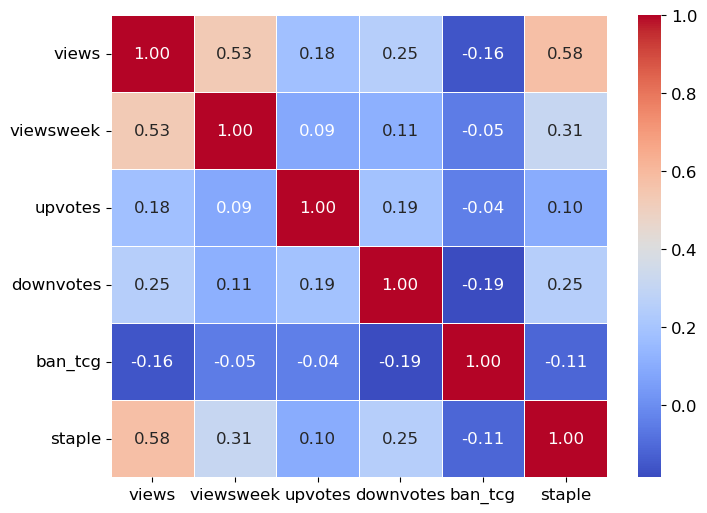

In [89]:
correlation_matrix = views_df[['views', 'viewsweek', 'upvotes', 'downvotes', 'ban_tcg', 'staple']].corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [90]:
master_df_copy = master_df[['race', 'atk', 'def', 'level', 'type', 'attribute', 'views', 'viewsweek', 'upvotes', 'downvotes', 'ban_tcg', 'staple']]

master_df_copy['ban_tcg'] = master_df_copy['ban_tcg'].fillna(3)
master_df_copy['staple'] = master_df_copy['staple'].fillna(0)
master_df_copy['staple'] = master_df_copy['staple'].replace('Yes', 1)
master_df_copy['ban_tcg'] = master_df_copy['ban_tcg'].replace('Semi-Limited', 2)
master_df_copy['ban_tcg'] = master_df_copy['ban_tcg'].replace('Limited', 1)
master_df_copy['ban_tcg'] = master_df_copy['ban_tcg'].replace('Banned', 0)
master_df_copy['atk'] = master_df_copy['atk'].fillna(1484.636774)
master_df_copy['def'] = master_df_copy['def'].fillna(1254.528968)
master_df_copy['level'] = master_df_copy['level'].fillna(4.596884)
master_df_copy['attribute'] = master_df_copy['attribute'].fillna(8)
master_df_copy['race'] = master_df_copy['race'].fillna("Warrior")
master_df_copy['race'] = master_df_copy['race'].replace('Warrior', 1)
master_df_copy['race'] = master_df_copy['race'].replace('Machine', 2)
master_df_copy['race'] = master_df_copy['race'].replace('Fiend', 3)
master_df_copy['race'] = master_df_copy['race'].replace('Spellcaster', 4)
master_df_copy['race'] = master_df_copy['race'].replace('Dragon', 5)
master_df_copy['race'] = master_df_copy['race'].replace('Fairy', 6)
master_df_copy['race'] = master_df_copy['race'].replace('Beast', 7)
master_df_copy['race'] = master_df_copy['race'].replace('Winged Beast', 8)
master_df_copy['race'] = master_df_copy['race'].replace('Aqua', 9)
master_df_copy['race'] = master_df_copy['race'].replace('Cyberse', 10)
master_df_copy['race'] = master_df_copy['race'].replace('Insect', 11)
master_df_copy['race'] = master_df_copy['race'].replace('Rock', 12)
master_df_copy['race'] = master_df_copy['race'].replace('Zombie', 13)
master_df_copy['race'] = master_df_copy['race'].replace('Beast-Warrior', 14)
master_df_copy['race'] = master_df_copy['race'].replace('Plant', 15)
master_df_copy['race'] = master_df_copy['race'].replace('Psychic', 16)
master_df_copy['race'] = master_df_copy['race'].replace('Reptile', 17)
master_df_copy['race'] = master_df_copy['race'].replace('Pyro', 18)
master_df_copy['race'] = master_df_copy['race'].replace('Fish', 19)
master_df_copy['race'] = master_df_copy['race'].replace('Thunder', 20)
master_df_copy['race'] = master_df_copy['race'].replace('Dinosaur', 21)
master_df_copy['race'] = master_df_copy['race'].replace('Wyrm', 22)
master_df_copy['race'] = master_df_copy['race'].replace('Sea Serpent', 23)
master_df_copy['race'] = master_df_copy['race'].replace('Illusion', 24)
master_df_copy['race'] = master_df_copy['race'].replace('Divine-Beast', 25)
master_df_copy['race'] = master_df_copy['race'].replace('Creator-God', 26)
master_df_copy['race'] = master_df_copy['race'].replace('Normal', 27)
master_df_copy['race'] = master_df_copy['race'].replace('Continuous', 28)
master_df_copy['race'] = master_df_copy['race'].replace('Quick-Play', 29)
master_df_copy['race'] = master_df_copy['race'].replace('Field', 30)
master_df_copy['race'] = master_df_copy['race'].replace('Equip', 31)
master_df_copy['race'] = master_df_copy['race'].replace('Counter', 32)
master_df_copy['race'] = master_df_copy['race'].replace('Ritual', 33)
master_df_copy['level'] = master_df_copy['level'].replace('0.0', 0)
master_df_copy['level'] = master_df_copy['level'].replace('1.0', 1)
master_df_copy['level'] = master_df_copy['level'].replace('2.0', 2)
master_df_copy['level'] = master_df_copy['level'].replace('3.0', 3)
master_df_copy['level'] = master_df_copy['level'].replace('4.0', 4)
master_df_copy['level'] = master_df_copy['level'].replace('5.0', 5)
master_df_copy['level'] = master_df_copy['level'].replace('6.0', 6)
master_df_copy['level'] = master_df_copy['level'].replace('7.0', 7)
master_df_copy['level'] = master_df_copy['level'].replace('8.0', 8)
master_df_copy['level'] = master_df_copy['level'].replace('9.0', 9)
master_df_copy['level'] = master_df_copy['level'].replace('10.0', 10)
master_df_copy['level'] = master_df_copy['level'].replace('11.0', 11)
master_df_copy['level'] = master_df_copy['level'].replace('12.0', 12)
master_df_copy['level'] = master_df_copy['level'].replace('13.0', 13)
master_df_copy['type'] = master_df_copy['type'].replace('Tuner Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Flip Effect Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Gemini Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Synchro Tuner Monster', 'Synchro Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Union Effect Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Effect Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Normal Monster', 'Normal Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Spirit Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Toon Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Ritual Effect Monster', 'Ritual Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Effect Fusion Monster', 'Fusion Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Normal Tuner Monster', 'Normal Monster')
master_df_copy['type'] = master_df_copy['type'].replace('XYZ Pendulum Effect Monster', 'XYZ Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Tuner Effect Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Synchro Pendulum Effect Monster', 'Synchro Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Effect Ritual Monster', 'Ritual Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Pendulum Flip Effect Monster', 'Effect Monster')
master_df_copy['type'] = master_df_copy['type'].replace('Effect Monster', 0)
master_df_copy['type'] = master_df_copy['type'].replace('Synchro Monster', 1)
master_df_copy['type'] = master_df_copy['type'].replace('Normal Monster', 2)
master_df_copy['type'] = master_df_copy['type'].replace('Ritual Monster', 3)
master_df_copy['type'] = master_df_copy['type'].replace('Fusion Monster', 4)
master_df_copy['type'] = master_df_copy['type'].replace('XYZ Monster', 5)
master_df_copy['type'] = master_df_copy['type'].replace('Spell Card', 6)
master_df_copy['type'] = master_df_copy['type'].replace('Trap Card', 7)
master_df_copy['type'] = master_df_copy['type'].replace('Link Monster', 8)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('DARK', 1)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('LIGHT', 2)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('EARTH', 3)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('FIRE', 4)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('WIND', 5)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('WATER', 6)
master_df_copy['attribute'] = master_df_copy['attribute'].replace('DIVINE', 7)

C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\2533234061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_copy['ban_tcg'] = master_df_copy['ban_tcg'].fillna(3)
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\2533234061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_copy['staple'] = master_df_copy['staple'].fillna(0)
C:\Users\TateC\AppData\Local\Temp\ipykernel_33136\2533234061.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

Text(0.5, 1.0, 'Yu-Gi-Oh! Data Set Correlations Heatmap')

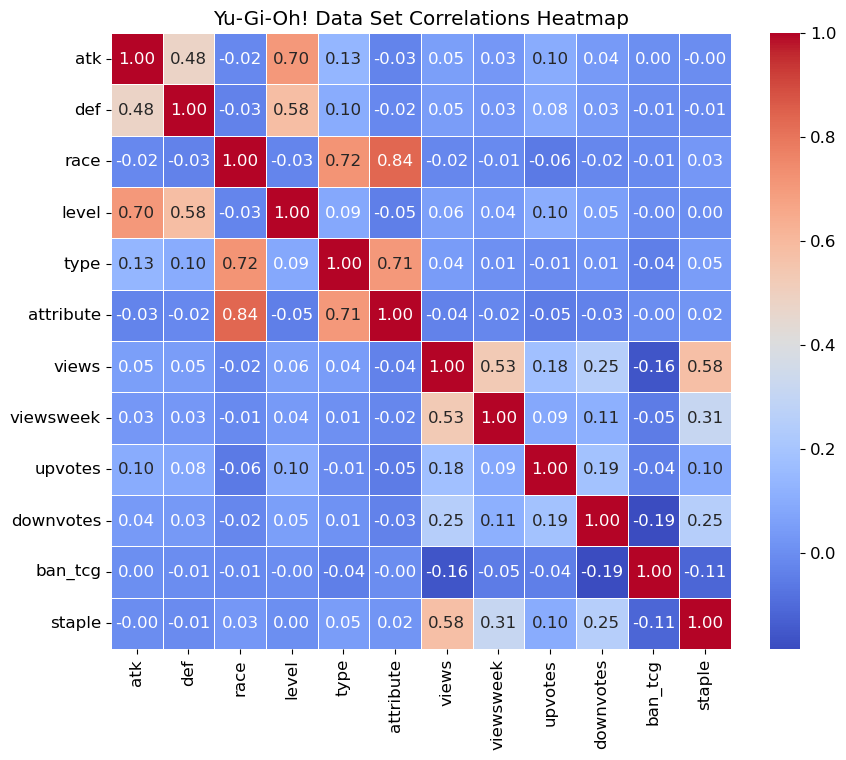

In [95]:
correlation_matrix = master_df_copy[['atk', 'def', 'race', 'level', 'type', 'attribute', 'views', 'viewsweek', 'upvotes', 'downvotes', 'ban_tcg', 'staple']].corr() 

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Yu-Gi-Oh! Data Set Correlations Heatmap')